In [2]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.io import loadmat
from sklearn.metrics import mean_squared_error
import pysindy as ps
import pandas as pd
from matplotlib import cm
import time
import pickle
import seaborn as sns
from statistics import mean 
from scipy.stats import ks_2samp
import matplotlib.gridspec as gridspec
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Methods and Graph variables

In [32]:
# graph varaible
sns.set_style('white') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('font', size=36)          # controls default text sizes

In [602]:
def combine_data():
 
    big=[]
    with open('Data_SINDy/LCA-DDM/dec_23/multiprocessing_lcaddm_kelvin_st_poly2_2000.pkl', 'rb') as file:
        data1 = pickle.load(file)
    with open('Data_SINDy/LCA-DDM/dec_23/multiprocessing_lcaddm_kelvin_st_poly2_4000.pkl', 'rb') as file:
        data2 = pickle.load(file)
    with open('Data_SINDy/LCA-DDM/dec_23/multiprocessing_lcaddm_kelvin_st_poly2_6000.pkl', 'rb') as file:
        data3 = pickle.load(file)
    with open('Data_SINDy/LCA-DDM/dec_23/multiprocessing_lcaddm_kelvin_st_poly2_8000.pkl', 'rb') as file:
        data4 = pickle.load(file)
    with open('Data_SINDy/LCA-DDM/dec_23/multiprocessing_lcaddm_kelvin_st_poly2_10000.pkl', 'rb') as file:
        data5 = pickle.load(file)
#     with open('Data_SINDy/NLB/poly/multiprocessing_nlb_kelvin_st_poly6_1000.pkl', 'rb') as file:
#         data1 = pickle.load(file)
#     with open('Data_SINDy/NLB/poly/multiprocessing_nlb_kelvin_st_poly6_2000.pkl', 'rb') as file:
#         data2 = pickle.load(file)
#     with open('Data_SINDy/NLB/poly/multiprocessing_nlb_kelvin_st_poly6_3000.pkl', 'rb') as file:
#         data3 = pickle.load(file)
#     with open('Data_SINDy/NLB/poly/multiprocessing_nlb_kelvin_st_poly6_4000.pkl', 'rb') as file:
#         data4 = pickle.load(file)
#     with open('Data_SINDy/NLB/poly/multiprocessing_nlb_kelvin_st_poly6_5000.pkl', 'rb') as file:
#         data5 = pickle.load(file)
#     with open('Data_SINDy/NLB/poly/multiprocessing_nlb_kelvin_st_poly6_6000.pkl', 'rb') as file:
#         data6 = pickle.load(file)
#     with open('Data_SINDy/NLB/poly/multiprocessing_nlb_kelvin_st_poly6_7000.pkl', 'rb') as file:
#         data7 = pickle.load(file)
#     with open('Data_SINDy/NLB/poly/multiprocessing_nlb_kelvin_st_poly6_8000.pkl', 'rb') as file:
#         data8 = pickle.load(file)
#     with open('Data_SINDy/NLB/poly/multiprocessing_nlb_kelvin_st_poly6_9000.pkl', 'rb') as file:
#         data9 = pickle.load(file)
#     with open('Data_SINDy/NLB/poly/multiprocessing_nlb_kelvin_st_poly6_10000.pkl', 'rb') as file:
#         data10 = pickle.load(file)
    for i in range(41):
        combined_lists = []
        for j in range(7):# Iterate over each sublist index
            combined_sublist = data1[i][j] + data2[i][j] + data3[i][j] + data4[i][j]+data5[i][j]#+data6[i][j]+data7[i][j]+data8[i][j]+data9[i][j]+data10[i][j]
            combined_lists.append(combined_sublist)
        big.append(combined_lists)
    return big

In [642]:

###lca ave###
file_name = "Data_SINDy/DDM/POLY/multiprocessing_ddm_kelvin_st_poly2.pkl"
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()
st_lca_poly=loaded_list

In [643]:
a=[]
[a.append((np.mean(st_lca_poly[i][0],axis=0).flatten())) for i in range(41)]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [645]:
#'np.squeeze(a)

In [605]:
# file_name = "Data_SINDy/LCA-DDM/dec_23/multiprocessing_lcaddm_kelvin_st_poly2.pkl"
# open_file = open(file_name, "wb")
# pickle.dump(st_poly2_lcaddm, open_file)
open_file.close()

In [10]:
def confidenceInterval(alist,ciColumn,trials,no_column=False):
    if no_column:
        mean_1=mean_of_list(alist,ciColumn,no_column=True)#mean for each point
        std_1=std_of_list(alist,ciColumn,no_column=True)#std
        sem_std=sem_ci(std_1,trials)#sem of std
        overall_mean=mean(mean_1)#overall mean
        overall_sem=np.sqrt((sum(sem_std)**2)/len(std_1))#sem_overall
        t_value=scipy.stats.t.ppf(q=.05,df=40)
        moe=t_value*overall_sem #margin of error
        confidence_low=[mean_1[i]+moe for i in range(len(mean_1))]
        confidence_high=[mean_1[i]-moe for i in range(len(mean_1))]
    else:
        mean_1=mean_of_list(alist,ciColumn)#mean for each point
        std_1=std_of_list(alist,ciColumn)#std
#         sem_std=sem_ci(std_1,trials)#sem of std
#         overall_mean=mean(mean_1)#overall mean
#         overall_sem=np.sqrt((sum(sem_std)**2)/len(std_1))#sem_overall
#         t_value=scipy.stats.t.ppf(q=.05,df=40)
#         moe=t_value*overall_sem #margin of error
#         confidence_low=[mean_1[i]+moe for i in range(len(mean_1))]
#         confidence_high=[mean_1[i]-moe for i in range(len(mean_1))]
        confidence_low,confidence_high=bootstrap_confidence_interval_column(alist,ciColumn)
    
    return confidence_low,confidence_high,mean_1,std_1

def bootstrap_confidence_interval_column(data, ciColumn, num_bootstrap_samples=1000, confidence_level=0.90):
    """
    Parameters:
    - data: List of datasets, where each dataset is a list or a numpy array.
    - ciColumn: The index of the column for which to calculate the confidence interval.
    - num_bootstrap_samples: The number of bootstrap samples to generate.
    - confidence_level: The confidence level for the interval.
    Returns:
    - lower_bounds: List of lower bounds of the confidence intervals for each dataset.
    - upper_bounds: List of upper bounds of the confidence intervals for each dataset.
    - sample_means: List of means for the specified column across each dataset.
    - sample_stds: List of standard deviations for the specified column across each dataset.
    """
    lower_bounds = []
    upper_bounds = []
    sample_means = []
    sample_stds = []
    
    for dataset in data:
        column_data = dataset[ciColumn] #if isinstance(dataset, np.ndarray) else [row[ciColumn] for row in dataset]
        bootstrap_means = np.empty(num_bootstrap_samples)
        
        # Generate bootstrap samples and compute the mean for each sample
        for i in range(num_bootstrap_samples):
            bootstrap_sample = np.random.choice(column_data, size=len(column_data), replace=True)
            bootstrap_means[i] = np.mean(bootstrap_sample)
        
        # Compute the confidence interval from the bootstrap distribution
        alpha = (1 - confidence_level) / 2
        lower_bounds.append(np.percentile(bootstrap_means, 100 * alpha))
        upper_bounds.append(np.percentile(bootstrap_means, 100 * (1 - alpha)))
        
        # Calculate and store the sample mean and standard deviation for the column
#         sample_means.append(np.mean(column_data))
#         sample_stds.append(np.std(column_data))
    
    return lower_bounds, upper_bounds#, sample_means, sample_stds

def replace_column(matrix, new_column,snr_index, column_index):
    """
    Replace a column in a matrix (represented as a list of lists) with a new column vector.
    
    Args:
        matrix (list of lists): The original matrix.
        new_column (list): The new column vector to replace the existing column.
        column_index (int): The index of the column to replace (0-based index).
    
    Returns:
        list of lists: The updated matrix with the specified column replaced.
    """
    if column_index < 0 or column_index >= len(matrix[0]):
        raise ValueError("Invalid column_index")
    
    if len(matrix[0][column_index]) != len(new_column):
        raise ValueError("New column length must match the matrix height")
    

    for i in range(len(matrix[snr_index][column_index])):
        matrix[snr_index][column_index][i] = new_column[i]
    
    return matrix

def flatten(data,column,column_sin):
    flattened_data = []

    # Iterate through each tuple in st_ddm
    for i in range(len(data)):
        # Extract the DataFrame and lists from the tuple
        

        # Now you can access individual elements from each list and DataFrame
        # Example: Access the first element of list1 and the value in column 'A' of the DataFrame
#         element = np.hstack((data[i][column],data[i][column_sin]))
        element = (data[i][column])

        #df_value = df['A'][0]

        # Append the extracted values to the flattened_data list or use them as needed
        flattened_data.append(element)
    flat_list = [point for sublist in flattened_data for point in sublist]
    return flat_list

def normalise_decision_time(data,column_dt,column_dt_sindy,lcaddm=False):
    
    model_dt_flat=flatten(data,column_dt,column_dt_sindy)
    max_dt=max(model_dt_flat)#np.percentile(model_dt_flat, 99)
    min_dt=min(model_dt_flat)#np.percentile(model_dt_flat, 1)
#     max_dt=np.percentile(model_dt_flat, 99)
#     min_dt=np.percentile(model_dt_flat, 1)
    #np.percentile(data, percentile1)
    #print("max= "+str(max_dt))
    #print("min= "+str(min_dt))
    for i in range(len(data)):
        normalised=[]
        normalised_sindy=[]
        for c in range(len(data[i][column_dt])):
            #dt_stack=np.hstack((data[i][column_dt],data[i][column_dt_sindy]))
            if i==4 and c==9999 and lcaddm==True:
                norm_model_times = (mean(data[i][column_dt])- min_dt) / (max_dt - min_dt)
                norm_model_times_sindy = (mean(data[i][column_dt_sindy]) - min_dt) / (max_dt - min_dt)
                normalised.append(norm_model_times)
                normalised_sindy.append(norm_model_times_sindy)
            else:
                norm_model_times = (data[i][column_dt][c] - min_dt) / (max_dt - min_dt)
                norm_model_times_sindy = (data[i][column_dt_sindy][c] - min_dt) / (max_dt - min_dt)
                normalised.append(norm_model_times)
                normalised_sindy.append(norm_model_times_sindy)
        #print(len(normalised))
        data=replace_column(data, normalised, i, column_dt)
        data=replace_column(data, normalised_sindy, i, column_dt_sindy)
    
    return data

from scipy.stats import wilcoxon
def statistical_analysis(data,column,column_sin,snr,no_column=False,data_sindy=None):
    if no_column:
        p=np.empty(len(data))
        c=np.empty(len(data))

        for i in range(len(data)):
            group1 = data[i]
            group2 = data_sindy[i]
            differences = [x - y for x, y in zip(group1, group2)]
            c[i],p[i] = wilcoxon(differences,zero_method="zsplit")
        significant_points=[snr[i] if p[i]<.05 else None for i in range(len(p))]
    else:
        p=np.empty(len(data))
        c=np.empty(len(data))

        for i in range(len(data)):
            group1 = data[i][column]
            group2 = data[i][column_sin]
            differences = [x - y for x, y in zip(group1, group2)]
            c[i],p[i] = wilcoxon(differences,zero_method="zsplit")
        significant_points=[snr[i] if p[i]<.05 else None for i in range(len(p))]
    return c,p,significant_points

def cliffs_delta(x, y):
    """
    Compute Cliff's Delta using a more efficient method.
    x, y: Arrays containing the data
    """
    # Combine the arrays and sort
    all_values = np.concatenate((x, y))
    ranks = np.argsort(all_values)
    
    # Get ranks for x and y separately
    rx = np.mean(ranks[:len(x)])
    ry = np.mean(ranks[len(x):])
    
    # Calculate Cliff's Delta
    delta = (rx - ry) / len(all_values)
    return delta
def ks_statistical_analysis(data, column, column_sin, snr, no_column=False, data_sindy=None):
    if no_column:
        p = np.empty(len(data))
        d_stat = np.empty(len(data))  # KS statistic
        effect_size = np.empty(len(data))  # cliff's d

        for i in range(len(data)):
            group1 = data[i]
            group2 = data_sindy[i]
            d_stat[i], p[i] = ks_2samp(group1, group2)
            effect_size[i] = cliffs_delta(group1, group2)
    else:
        p = np.empty(len(data))
        d_stat = np.empty(len(data))  # KS statistic
        effect_size = np.empty(len(data))  # cliff's d

        for i in range(len(data)):
            group1 = data[i][column]
            group2 = data[i][column_sin]
            d_stat[i], p[i] = ks_2samp(group1, group2)
            effect_size[i] = cliffs_delta(group1, group2)

    significant_points = [snr[i] if p[i] < .05 else None for i in range(len(p))]
    return d_stat, p, significant_points, effect_size

def mean_of_list(alist,column,no_column=False):
    if no_column:
        mean_list=[mean(alist[i]) for i in range(len(alist))]
    else:
        mean_list=[mean(alist[i][column]) for i in range(len(alist))]
    return mean_list

def std_of_list(alist,column,no_column=False):
    if no_column:
        mean_list=[np.std(alist[i]) for i in range(len(alist))]
    else:
        mean_list=[np.std(alist[i][column]) for i in range(len(alist))]
    return mean_list

def sem_ci(std_list,trials):
    sem=[std_list[i]/np.sqrt(trials) for i in range(len(std_list))]
    return sem

def mean_poly(data):
    if (len(data[0][0][0][0])<3):
        coef_0=[]
        coef_1=[]
        for i in range(len(data)):
            coef_0.append(data[i][0].T[0].mean())
            coef_1.append(data[i][0].T[1].mean())
        return coef_0,coef_1
    elif (len(data[0][0][0][0])>2):
        coef_0=[]
        coef_1=[]
        coef_2=[]
        for i in range(len(data)):
            coef_0.append(data[i][0].T[0].mean())
            coef_1.append(data[i][0].T[1].mean())
            coef_2.append(data[i][0].T[2].mean())
        return coef_0,coef_1,coef_2

def lca_mean_order2(data):
    mean_a=[]
    mean_b=[]
    for i in range(len(data)):
        a=[]
        b=[]
        for u in range(len(data[i][0])):
            a.append(data[i][0][u][0])
            b.append(data[i][0][u][1])  
        mean_a.append(np.mean(a, axis=0))
        mean_b.append(np.mean(b, axis=0))
    return np.hstack((mean_a,mean_b))

def lca_mean(data):
    if len(data[0][0][0])<3:
        c0=[]
        c1=[]
        for i in range(len(data)):
            c=np.squeeze(data[i][0])
            c0.append(c.T[0].mean())
            c1.append(c.T[1].mean())
        return c0,c1
    elif len(data[0][0][0][0])>3:
        c0=[]
        c1=[]
        c2=[]
        c3=[]
        c4=[]
        c5=[]
        c6=[]
        c7=[]
        c8=[]
        c9=[]
        c10=[]
        c11=[]   

def average_ddm(trial_data):
    average_m=[]
    average_s=[]
    for i in range(len(trial_data)):

        # Step 1: Identify the maximum length
        max_length_model = max(len(trial) for trial in trial_data[i][5])
        max_length_sindy = max(len(trial) for trial in trial_data[i][6])

        # Step 2: Initialize an array for sums and counts
        sums_model = np.zeros(max_length_model)
        count_model = np.zeros(max_length_model)
        sums = np.zeros(max_length_sindy)
        counts = np.zeros(max_length_sindy)

        # Step 3 & 4: Sum and count contributions for each time point
        for trial in trial_data[i][5]:
            length = len(trial)
            sums_model[:length] += trial  # Add trial data to sums
            count_model[:length] += 1    # Increment counts for each contributed time point
            
        # Step 3 & 4: Sum and count contributions for each time point
        for trial in trial_data[i][6]:
            length = len(trial)
            sums[:length] += trial  # Add trial data to sums
            counts[:length] += 1    # Increment counts for each contributed time point

        # Step 5: Calculate the average
        average_trial = sums_model / count_model
        average_trial_sindy = sums / counts
        average_m.append(average_trial)
        average_s.append(average_trial_sindy)
    return average_m,average_s

def average_activity_multidimensional(data, trial_threshold=100):
    # Determine the number of populations and the maximum time length
    num_populations = len(data[0])
    max_length = max(max(len(population) for population in sample) for sample in data)
    
    # Initialize an empty list to store padded data
    padded_data = []
    
    # Pad each sample's population data to the maximum length using numpy
    for sample in data:
        padded_sample = [np.pad(population, (0, max_length - len(population)), 'constant', constant_values=np.nan) for population in sample]
        padded_data.append(padded_sample)
    
    # Convert the list of padded data to a numpy array
    padded_data_np = np.array(padded_data)
    
    # Calculate the mean across samples for each population, ignoring NaNs
    average_activity = np.nanmean(padded_data_np, axis=0)
    
    # Count the number of non-NaN values at each time point for each population
    valid_counts = np.sum(~np.isnan(padded_data_np), axis=0)
    
    # Determine the last valid time point based on the trial threshold
    last_valid_indices = np.max(np.where(valid_counts >= trial_threshold, np.arange(valid_counts.shape[1]), 0), axis=1)
    min_last_valid_index = np.min(last_valid_indices)
    
    # Truncate the averages to the minimum last valid index across populations
    truncated_averages = average_activity[:, :min_last_valid_index + 1]
    
    return truncated_averages.tolist()

def average_activity(data,trial_threshold=100):
    data = data
    # Find the maximum length for padding
    max_length = max(len(item) for item in data)

    # Pad the data, using np.nan for padding
    padded_data = np.array([np.pad(item, (0, max_length - len(item)), 'constant', constant_values=np.nan) for item in data])

    # Calculate the mean, ignoring NaNs
    average_activity = np.nanmean(padded_data, axis=0)

    # Count the number of non-NaN values at each time point
    valid_counts = np.sum(~np.isnan(padded_data), axis=0)

    # Set your threshold for the minimum number of valid data points
    threshold = trial_threshold  # For example, require at least 100 trials to contribute to the mean

    # Find the last valid time point based on the threshold
    last_valid_index = np.max(np.where(valid_counts >= threshold)[0])

    # Truncate the average_activity array at the last valid index
    truncated_average_activity = average_activity[:last_valid_index + 1]
    
    return truncated_average_activity

def sort_correct_error_1d(data,trajectory_column,threshold):
    correct=[]
    error=[]
    for i in range(len(data)):
        correct_temp=[]
        error_temp=[]
        for u in range(len(data[i][trajectory_column])):
            if data[i][1][u][-1]>threshold:
                #row=[data[i][0][u],data[i][1][u],data[i][2][u],data[i][3][u],data[i][4][u],data[i][5][u],data[i][6][u]]
                correct_temp.append(data[i][1][u])
            elif data[i][1][u][-1]<-threshold:
                #row=[data[i][0][u],data[i][1][u],data[i][2][u],data[i][3][u],data[i][4][u],data[i][5][u],data[i][6][u]]
                error_temp.append(data[i][1][u])
                
        correct.append(correct_temp)
        error.append(error_temp)
        
    return correct,error

def get_trajectory(data,trajectory_column,nlb=False):
    trajectory=[]
    for i in range(len(data)):
        traj_temp=[]
        for u in range(len(data[i][trajectory_column])):
            traj_temp.append(data[i][trajectory_column][u])
                
        trajectory.append(traj_temp)
        
    return trajectory

def timecourse_average(trajectories, times):
    ###calculate average timecourse for a given range
    range_act=times#array for each coh
    #range_act=times#number
    coh_timecourse=[]
    for coh in range(len(trajectories)):
        timecourse=[]
        for c in range(range_act[coh]):
            total=len(trajectories[coh])
            a=0
            for i in range(len(trajectories[coh])):###calculates total at timepoint
                try:
                    a+=trajectories[coh][i].T[0][c]
                except:
                    total-=1
            timecourse.append(a/total)        
        coh_timecourse.append(timecourse)
    return coh_timecourse

def timecourse_average_1d(trajectories, times):
    ###calculate average timecourse for a given range
    range_act=times#array for each coh
    #range_act=times#number
    coh_timecourse=[]
    for coh in range(len(trajectories)):
        timecourse=[]
        for c in range(range_act[coh]):
            total=len(trajectories[coh])
            a=0
            for i in range(len(trajectories[coh])):###calculates total at timepoint
                try:
                    a+=trajectories[coh][i].T[c]
                except:
                    total-=1
            timecourse.append(a/total)        
        coh_timecourse.append(timecourse)
    return coh_timecourse

def sort_correct_error(data,trajectory_column):
    correct=[]
    error=[]
    for i in range(len(data)):
        correct_temp=[]
        error_temp=[]
        for u in range(len(data[i][trajectory_column])):
            if data[i][1][u][:,0][-1]>1:
                #row=[data[i][0][u],data[i][1][u],data[i][2][u],data[i][3][u],data[i][4][u],data[i][5][u],data[i][6][u]]
                correct_temp.append(data[i][1][u])
            elif data[i][1][u][:,1][-1]>1:
                #row=[data[i][0][u],data[i][1][u],data[i][2][u],data[i][3][u],data[i][4][u],data[i][5][u],data[i][6][u]]
                error_temp.append(data[i][1][u])
                
        correct.append(correct_temp)
        error.append(error_temp)
        
    return correct,error

def get_length_average(traj):
    b=[]
    for i in range(41):
        a=0
        for q in range(len(traj[i])):
            a+=len(traj[i][q])

        b.append(round(a/len(traj[i])))
        
    return b

def get_length_average_1d(traj):
    b=[]
    for i in range(41):
        a=0
        for q in range(len(traj[i])):
            a+=len(traj[i][q])
        
        c=round(a/len(traj[i]))
        b.append(c)#+(c))
        
    return b

# NLB

In [319]:
#nlb st
file_name = "Data_SINDy/NLB/latest_24/multiprocessing_nlb_kelvin_st_march.pkl"
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()
st_nlb=loaded_list
st_nlb=normalise_decision_time(st_nlb,3,4)

In [29]:
#nlb st nt
file_name = "Data_SINDy/NLB/latest_24/multiprocessing_nlb_kelvin_st_nt_march.pkl"
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()
st_nt_nlb=loaded_list
st_nt_nlb=normalise_decision_time(st_nt_nlb,3,4)

In [343]:
###nlb ave###
file_name = "Data_SINDy/NLB/latest_24/multiprocessing_nlb_kelvin_ave_march.pkl"
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()
ave_nlb=loaded_list
ave_nlb=normalise_decision_time(ave_nlb,3,4)

In [27]:
###nlb ave nt###
file_name = "Data_SINDy/NLB/latest_24/multiprocessing_nlb_kelvin_ave_nt_mar.pkl"
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()
ave_nt_nlb=loaded_list
ave_nt_nlb=normalise_decision_time(ave_nt_nlb,3,4)

In [ ]:
#a_list_avg=[]
#[a_list_avg.append(np.mean(st_nt_nlb[i][0],axis=0)) for i in range(41)]
#np.squeeze(a_list_avg)

In [322]:
#nlb SNR
nlb_signal=[0.0000,0.0002,0.0004,0.0006,0.0008,0.0010,0.0012,0.0014,0.0016,0.0018,0.0020,0.0022,0.0024,0.0026,0.0028,0.0030,0.0032,0.0034,0.0036,0.0038,0.0040,0.0042,0.0044,0.0046,0.0048,0.0050,0.0052,0.0054,0.0056,0.0058,0.0060,0.0062,0.0064,0.0066,0.0068,0.0070,0.0072,0.0074,0.0076,0.0078,0.0080]
#nlb_signal=[0.0000,0.0003,0.0006,0.0009,0.0012,0.0015,0.0018,0.0021,0.0024,0.0027,0.0030,0.0033,0.0036,0.0039,0.0042,0.0045,0.0048,0.0051,0.0054,0.0057,0.0060,]
c_nlb=.01
SnR_nlb=[]

for i in range(len(st_nlb)):
    
    SnR_nlb.append(((nlb_signal[i])/(c_nlb**2)))

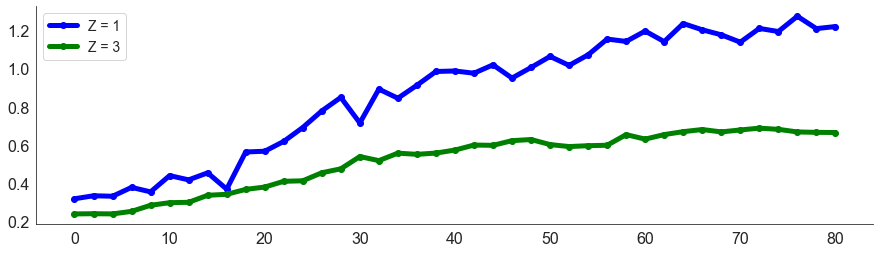

In [30]:
#nlb rmse
nlb_signal=[0.0000,0.0002,0.0004,0.0006,0.0008,0.0010,0.0012,0.0014,0.0016,0.0018,0.0020,0.0022,0.0024,0.0026,0.0028,0.0030,0.0032,0.0034,0.0036,0.0038,0.0040,0.0042,0.0044,0.0046,0.0048,0.0050,0.0052,0.0054,0.0056,0.0058,0.0060,0.0062,0.0064,0.0066,0.0068,0.0070,0.0072,0.0074,0.0076,0.0078,0.0080]
#nlb_signal=[0.0000,0.0003,0.0006,0.0009,0.0012,0.0015,0.0018,0.0021,0.0024,0.0027,0.0030,0.0033,0.0036,0.0039,0.0042,0.0045,0.0048,0.0051,0.0054,0.0057,0.0060,]
c_nlb=.01
n_nlb=6
x5_SPB=-1
x3_SPB=1
epsilon=0.05
SnR_nlb=[]
rms_SnR_nlb=[]
rms_SnR_nt_nlb=[]
nlb_coefs_ave=[np.mean(np.array(st_nlb[i][0]),axis=0)  for i in range(41)]
nt_nlb_coefs_ave=[np.mean(np.array(st_nt_nlb[i][0]),axis=0) for i in range(41)]


for i in range(len(st_nlb)):
    
    SnR_nlb.append(((nlb_signal[i])/(c_nlb**2)))
    squared_SnR_nlb=abs(((nlb_signal[i])**2)-(float(nlb_coefs_ave[i][0])**2))+abs((epsilon**2)-(float(nlb_coefs_ave[i][1])**2))+abs((0**2)-(float(nlb_coefs_ave[i][2])**2))+abs(((x3_SPB)**2)-(float(nlb_coefs_ave[i][3])**2))+abs((0**2)-(float(nlb_coefs_ave[i][4])**2))+abs((x5_SPB**2)-(float(nlb_coefs_ave[i][5])**2))
    rms_SnR_nlb.append(np.sqrt(squared_SnR_nlb/n_nlb))
    
    squared_SnR_nt_nlb=abs(((nlb_signal[i])**2)-(float(nt_nlb_coefs_ave[i][0])**2))+abs((epsilon**2)-(float(nt_nlb_coefs_ave[i][1])**2))+abs((0**2)-(float(nt_nlb_coefs_ave[i][2])**2))+abs(((x3_SPB)**2)-(float(nt_nlb_coefs_ave[i][3])**2))+abs((0**2)-(float(nt_nlb_coefs_ave[i][4])**2))+abs((x5_SPB**2)-(float(nt_nlb_coefs_ave[i][5])**2))    
    rms_SnR_nt_nlb.append(np.sqrt(squared_SnR_nt_nlb/n_nlb))
    
fig=plt.figure()
fig.set_figwidth(20)
fig.set_figwidth(15)

plt.plot(SnR_nlb,rms_SnR_nlb,'o-',color='blue',label='Z = 1',linewidth="5")
plt.plot(SnR_nlb,rms_SnR_nt_nlb,'o-',color='green',label='Z = 3',linewidth="5")

plt.legend(loc="best")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# DDM

In [27]:
#ddm st
file_name = "Data_SINDy/DDM/dec/multiprocessing_ddm_kelvin_st_dec.pkl"
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()
st_ddm=loaded_list
st_ddm=normalise_decision_time(st_ddm,3,4)

In [32]:
#ddm st nt
file_name = "Data_SINDy/DDM/dec/multiprocessing_ddm_kelvin_st_nt_dec.pkl"
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()
st_nt_ddm=loaded_list
st_nt_ddm=normalise_decision_time(st_nt_ddm,3,4)

In [33]:
#ddm ave nt
file_name = "Data_SINDy/DDM/dec/multiprocessing_ddm_kelvin_ave_nt_dec.pkl"
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()
ave_ddm_nt=loaded_list
ave_ddm_nt=normalise_decision_time(ave_ddm_nt,3,4)

In [347]:
#ddm ave
file_name = "Data_SINDy/DDM/dec/multiprocessing_ddm_kelvin_ave_dec.pkl"
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()
ave_ddm=loaded_list
ave_ddm=normalise_decision_time(ave_ddm,3,4)

In [ ]:
# ###st-ave###
#average_st_ddm_m,average_st_ddm_s=average_ddm(st_ddm)
fig=plt.figure()
fig.set_figwidth(20)
fig.set_figwidth(15)
# for i in range(1):
i=32
plt.plot(average_st_ddm_m[i],color=sns.color_palette()[0],linewidth=5,label="Model")#,alpha=0.025*i)
plt.plot(average_st_ddm_s[i],color=sns.color_palette()[1],label="SINDy",linewidth=5,linestyle="dashed")#,alpha=0.025*i)

plt.legend(loc="best")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [ ]:
# ###st###
fig=plt.figure()
fig.set_figwidth(20)
fig.set_figwidth(15)

# plt.plot(sig_points_acc_ddm, np.full(len(sig_points_acc_ddm),40), '*',color='black')
plt.plot(st_ddm[40][5][125],color='blue',label='Model',linewidth=5)
plt.plot(st_ddm[40][6][125],color='orange',label='SINDy',linewidth=5)

plt.axhline(y=1,linestyle='dashed',linewidth=5, color='black',label='Threshold')
plt.xlim(0)
sns.despine(fig= None, ax=None, top=True, right=True,left=None,offset=None, trim=False)
#plt.gca().set_yticklabels([])  # Turn off y-axis labels

ax = plt.gca()
ax.spines['left'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)

#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# plt.legend('', frameon=False)
plt.legend(loc='best')
#plt.savefig('choice_acc_ddm_15_01_st.svg', dpi=300, bbox_inches='tight')

In [ ]:
##test plot
# Create a figure with custom dimensions
fig = plt.figure(figsize=(35, 20))

# Set up a grid layout: 1 row, 3 columns with the first column twice as wide
gs = gridspec.GridSpec(1, 3, width_ratios=[2, 1, 1])

# The first plot taking up the first column, twice the size of the others
ax0 = plt.subplot(gs[0])
ax0.plot(st_ddm[40][5][125], color='blue', label='Model', linewidth=5)
ax0.plot(st_ddm[40][6][125], color='orange', label='SINDy', linewidth=5)
ax0.axhline(y=1, linestyle='dashed', linewidth=5, color='black', label='Threshold')
ax0.axhline(y=-1, linestyle='dashed', linewidth=5, color='black', label='')
ax0.set_xlim(0)
sns.despine(fig=None, ax=ax0, top=True, right=True, left=None, offset=None, trim=False)
ax0.spines['left'].set_linewidth(5)
ax0.spines['bottom'].set_linewidth(5)
ax0.legend(loc='best')

# Second plot
ax1 = plt.subplot(gs[1])
ax1.plot(sig_points_acc_ddm, np.full(len(sig_points_acc_ddm), 40), '*', color='black')
ax1.plot(x_ddm, ddm_acc[2], 'o-', color='blue', label="Model")
ax1.plot(x_ddm, ddm_acc[0], color='cyan')
ax1.plot(x_ddm, ddm_acc[1], color='cyan')
ax1.fill_between(x_ddm, ddm_acc[0], ddm_acc[1], facecolor='cyan', interpolate=True, alpha=0.25)

ax1.plot(x_ddm, ddm_accsin[2], 'o-', color='orange', label="SINDy")
ax1.plot(x_ddm, ddm_accsin[0], color='gold')
ax1.plot(x_ddm, ddm_accsin[1], color='gold')
ax1.fill_between(x_ddm, ddm_accsin[0], ddm_accsin[1], facecolor='gold', interpolate=True, alpha=0.25)

# Annotate Cohen's d for significant differences in the first subplot
for i, (x, d_value) in enumerate(zip(x_ddm, effect_st_ddm)):
    if sig_points_acc_ddm[i] is not None:
        ax1.text(x, 41, f'={d_value:.2f}', fontsize=10, ha='center', va='bottom', color='red')

# ax1.legend(loc="best")
ax1.legend('', frameon=False)
ax1.spines['left'].set_linewidth(5)
ax1.spines['bottom'].set_linewidth(5)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Third plot
ax2 = plt.subplot(gs[2])
ax2.plot(sig_points_time_ddm, np.full(len(sig_points_time_ddm), 0), '*', color='black')
ax2.plot(x_ddm, ddm_time[2], 'o-', color='blue', label="Model")
ax2.plot(x_ddm, ddm_time[0], color='cyan')
ax2.plot(x_ddm, ddm_time[1], color='cyan')
ax2.fill_between(x_ddm, ddm_time[0], ddm_time[1], facecolor='cyan', interpolate=True, alpha=0.25)

ax2.plot(x_ddm, ddm_timesin[2], 'o-', color='orange', label="SINDy")
ax2.plot(x_ddm, ddm_timesin[0], color='gold')
ax2.plot(x_ddm, ddm_timesin[1], color='gold')
ax2.fill_between(x_ddm, ddm_timesin[0], ddm_timesin[1], facecolor='gold', interpolate=True, alpha=0.25)

# Annotate Cohen's d for significant differences in the second subplot
for i, (x, d_value) in enumerate(zip(x_ddm, effect_st_ddm_t)):
    if sig_points_time_ddm[i] is not None:
        ax2.text(x, .5, f'={d_value:.2f}', fontsize=10, ha='center', va='bottom', color='red')

#ax2.legend(loc="best")
ax2.legend('', frameon=False)
ax2.spines['left'].set_linewidth(5)
ax2.spines['bottom'].set_linewidth(5)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()

In [ ]:
#ddm accuracy
x_ddm=SnR_ddm
ddm_acc=confidenceInterval(st_ddm,1,10000)
ddm_acc=[np.array(ddm_acc[i])*100 for i in range(len(ddm_acc))]
ddm_accsin=confidenceInterval(st_ddm,2,10000)
ddm_accsin=[np.array(ddm_accsin[i])*100 for i in range(len(ddm_accsin))]
c_ddm_acc,p_ddm_acc,sig_points_acc_ddm=statistical_analysis(st_ddm,1,2,x_ddm)

ddm_nt_acc=confidenceInterval(st_nt_ddm,1,10000)
ddm_nt_acc=[np.array(ddm_nt_acc[i])*100 for i in range(len(ddm_nt_acc))]
ddm_nt_accsin=confidenceInterval(st_nt_ddm,2,10000)
ddm_nt_accsin=[np.array(ddm_nt_accsin[i])*100 for i in range(len(ddm_nt_accsin))]
c_ddm_nt_acc,p_ddm_nt_acc,sig_points_acc_ddm_nt=statistical_analysis(st_nt_ddm,1,2,x_ddm)

#x_ddm=SnR_ddm
ddm_aceave=confidenceInterval(ave_ddm,1,10000)
ddm_aceave=[np.array(ddm_aceave[i])*100 for i in range(len(ddm_aceave))]
ddm_aceavesin=confidenceInterval(ave_ddm,2,10000)
ddm_aceavesin=[np.array(ddm_aceavesin[i])*100 for i in range(len(ddm_aceavesin))]
c_ddm_aceave,p_ddm_aceave,sig_points_aceave_ddm=statistical_analysis(ave_ddm,1,2,x_ddm)

ddm_nt_aceave=confidenceInterval(ave_ddm_nt,1,10000)
ddm_nt_aceave=[np.array(ddm_nt_aceave[i])*100 for i in range(len(ddm_nt_aceave))]
ddm_nt_aceavesin=confidenceInterval(ave_ddm_nt,2,10000)
ddm_nt_aceavesin=[np.array(ddm_nt_aceavesin[i])*100 for i in range(len(ddm_nt_aceavesin))]
c_ddm_nt_aceave,p_ddm_nt_aceave,sig_points_aceave_ddm_nt=statistical_analysis(ave_ddm_nt,1,2,x_ddm)

# ###st###
fig=plt.figure()
fig.set_figwidth(20)
fig.set_figwidth(15)

plt.plot(sig_points_acc_ddm, np.full(len(sig_points_acc_ddm),40), '*',color='black')
plt.plot(x_ddm,ddm_acc[2],'o-',color='blue',label="Model")
plt.plot(x_ddm,ddm_acc[0],color='cyan')
plt.plot(x_ddm,ddm_acc[1],color='cyan')
plt.fill_between(x_ddm, ddm_acc[0], ddm_acc[1],  facecolor='cyan', interpolate=True,alpha=0.25)

plt.plot(x_ddm,ddm_accsin[2],'o-',color='orange',label="SINDy")
plt.plot(x_ddm,ddm_accsin[0],color='gold')
plt.plot(x_ddm,ddm_accsin[1],color='gold')
plt.fill_between(x_ddm, ddm_accsin[0], ddm_accsin[1],  facecolor='gold', interpolate=True,alpha=0.25)

plt.legend(loc="best")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
#plt.savefig('choice_acc_ddm_15_01_st.svg', dpi=300, bbox_inches='tight')

###ave###
fig=plt.figure()
fig.set_figwidth(20)
fig.set_figwidth(15)

plt.plot(sig_points_aceave_ddm, np.full(len(sig_points_aceave_ddm),40), '*',color='black')
plt.plot(x_ddm,ddm_aceave[2],'o-',color='blue',label="Model")
plt.plot(x_ddm,ddm_aceave[0],color='cyan')
plt.plot(x_ddm,ddm_aceave[1],color='cyan')
plt.fill_between(x_ddm, ddm_aceave[0], ddm_aceave[1],  facecolor='cyan', interpolate=True,alpha=0.25)

plt.plot(x_ddm,ddm_aceavesin[2],'o-',color='orange',label="SINDy")
plt.plot(x_ddm,ddm_aceavesin[0],color='gold')
plt.plot(x_ddm,ddm_aceavesin[1],color='gold')
plt.fill_between(x_ddm, ddm_aceavesin[0], ddm_aceavesin[1],  facecolor='gold', interpolate=True,alpha=0.25)

#plt.legend(loc="best")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
# plt.savefig('choice_acc_ddm_15_01_ave.svg', dpi=300, bbox_inches='tight')

###st_nt###
# fig=plt.figure()
# fig.set_figwidth(20)
# fig.set_figwidth(15)

# plt.plot(sig_points_acc_ddm_nt, np.full(len(sig_points_acc_ddm_nt),40), '*',color='black')
# plt.plot(x_ddm,ddm_nt_acc[2],'o-',color='green',label="Model")
# plt.plot(x_ddm,ddm_nt_acc[0],color='cyan')
# plt.plot(x_ddm,ddm_nt_acc[1],color='cyan')
# plt.fill_between(x_ddm, ddm_nt_acc[0], ddm_nt_acc[1],  facecolor='cyan', interpolate=True,alpha=0.25)

# plt.plot(x_ddm,ddm_nt_accsin[2],'o-',color='pink',label="SINDy")
# plt.plot(x_ddm,ddm_nt_accsin[0],color='gold')
# plt.plot(x_ddm,ddm_nt_accsin[1],color='gold')
# plt.fill_between(x_ddm, ddm_nt_accsin[0], ddm_nt_accsin[1],  facecolor='gold', interpolate=True,alpha=0.25)

# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)
# plt.legend(loc="upper left", prop={'size': 16})
# # plt.savefig('choice_acc_ddm_15_01_st_nt.svg', dpi=300, bbox_inches='tight')

# ###ave_nt###
# fig=plt.figure()
# fig.set_figwidth(20)
# fig.set_figwidth(15)

# plt.plot(sig_points_aceave_ddm_nt, np.full(len(sig_points_aceave_ddm_nt),40), '*',color='black')
# plt.plot(x_ddm,ddm_nt_aceave[2],'o-',color='green',label="Model")
# plt.plot(x_ddm,ddm_nt_aceave[0],color='cyan')
# plt.plot(x_ddm,ddm_nt_aceave[1],color='cyan')
# plt.fill_between(x_ddm, ddm_nt_aceave[0], ddm_nt_aceave[1],  facecolor='cyan', interpolate=True,alpha=0.25)

# plt.plot(x_ddm,ddm_nt_aceavesin[2],'o-',color='pink',label="SINDy")
# plt.plot(x_ddm,ddm_nt_aceavesin[0],color='gold')
# plt.plot(x_ddm,ddm_nt_aceavesin[1],color='gold')
# plt.fill_between(x_ddm, ddm_nt_aceavesin[0], ddm_nt_aceavesin[1],  facecolor='gold', interpolate=True,alpha=0.25)

# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)
# plt.savefig('choice_acc_ddm_15_01_ave_nt.svg', dpi=300, bbox_inches='tight')


In [ ]:
##ddm rts
x_ddm=SnR_ddm
ddm_time=confidenceInterval(st_ddm,3,10000)
ddm_time=[np.array(ddm_time[i])*100 for i in range(len(ddm_time))]
ddm_timesin=confidenceInterval(st_ddm,4,10000)
ddm_timesin=[np.array(ddm_timesin[i])*100 for i in range(len(ddm_timesin))]
c_ddm_time,p_ddm_time,sig_points_time_ddm=ks_statistical_analysis(st_ddm,3,4,x_ddm)

ddm_nt_time=confidenceInterval(st_nt_ddm,3,10000)
ddm_nt_time=[np.array(ddm_nt_time[i])*100 for i in range(len(ddm_nt_time))]
ddm_nt_timesin=confidenceInterval(st_nt_ddm,4,10000)
ddm_nt_timesin=[np.array(ddm_nt_timesin[i])*100 for i in range(len(ddm_nt_timesin))]
c_ddm_nt_time,p_ddm_nt_time,sig_points_time_ddm_nt=ks_statistical_analysis(st_nt_ddm,3,4,x_ddm)

#x_ddm=SnR_ddm
ddm_timeave=confidenceInterval(ave_ddm,3,10000)
ddm_timeave=[np.array(ddm_timeave[i])*100 for i in range(len(ddm_timeave))]
ddm_timeavesin=confidenceInterval(ave_ddm,4,10000)
ddm_timeavesin=[np.array(ddm_timeavesin[i])*100 for i in range(len(ddm_timeavesin))]
c_ddm_timeave,p_ddm_timeave,sig_points_timeave_ddm=ks_statistical_analysis(ave_ddm,3,4,x_ddm)

ddm_nt_timeave=confidenceInterval(ave_ddm_nt,3,10000)
ddm_nt_timeave=[np.array(ddm_nt_timeave[i])*100 for i in range(len(ddm_nt_timeave))]
ddm_nt_timeavesin=confidenceInterval(ave_ddm_nt,4,10000)
ddm_nt_timeavesin=[np.array(ddm_nt_timeavesin[i])*100 for i in range(len(ddm_nt_timeavesin))]
c_ddm_nt_timeave,p_ddm_nt_timeave,sig_points_timeave_ddm_nt=ks_statistical_analysis(ave_ddm_nt,3,4,x_ddm)

In [ ]:
# ##st###
fig=plt.figure()
fig.set_figwidth(20)
fig.set_figwidth(15)

plt.plot(sig_points_time_ddm, np.full(len(sig_points_time_ddm),0), '*',color='black')
plt.plot(x_ddm,ddm_time[2],'o-',color='blue',label="Model")
plt.plot(x_ddm,ddm_time[0],color='cyan')
plt.plot(x_ddm,ddm_time[1],color='cyan')
plt.fill_between(x_ddm, ddm_time[0], ddm_time[1],  facecolor='cyan', interpolate=True,alpha=0.25)

plt.plot(x_ddm,ddm_timesin[2],'o-',color='orange',label="SINDy")
plt.plot(x_ddm,ddm_timesin[0],color='gold')
plt.plot(x_ddm,ddm_timesin[1],color='gold')
plt.fill_between(x_ddm, ddm_timesin[0], ddm_timesin[1],  facecolor='gold', interpolate=True,alpha=0.25)

plt.legend(loc="best")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
# plt.savefig('choice_time_ddm_15_01.svg', dpi=300, bbox_inches='tight')

# ##ave###
fig=plt.figure()
fig.set_figwidth(20)
fig.set_figwidth(15)

plt.plot(sig_points_timeave_ddm, np.full(len(sig_points_timeave_ddm),0), '*',color='black')
plt.plot(x_ddm,ddm_timeave[2],'o-',color='blue',label="Model")
plt.plot(x_ddm,ddm_timeave[0],color='cyan')
plt.plot(x_ddm,ddm_timeave[1],color='cyan')
plt.fill_between(x_ddm, ddm_timeave[0], ddm_timeave[1],  facecolor='cyan', interpolate=True,alpha=0.25)

plt.plot(x_ddm,ddm_timeavesin[2],'o-',color='orange',label="SINDy")
plt.plot(x_ddm,ddm_timeavesin[0],color='gold')
plt.plot(x_ddm,ddm_timeavesin[1],color='gold')
plt.fill_between(x_ddm, ddm_timeavesin[0], ddm_timeavesin[1],  facecolor='gold', interpolate=True,alpha=0.25)

#plt.legend(loc="best")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
# plt.savefig('choice_time_ddm_15_01_ave.svg', dpi=300, bbox_inches='tight')

###st_nt###
fig=plt.figure()
fig.set_figwidth(20)
fig.set_figwidth(15)

plt.plot(sig_points_time_ddm_nt, np.full(len(sig_points_time_ddm_nt),0), '*',color='black')
plt.plot(x_ddm,ddm_nt_time[2],'o-',color='green',label="Model")
plt.plot(x_ddm,ddm_nt_time[0],color='cyan')
plt.plot(x_ddm,ddm_nt_time[1],color='cyan')
plt.fill_between(x_ddm, ddm_nt_time[0], ddm_nt_time[1],  facecolor='cyan', interpolate=True,alpha=0.25)

plt.plot(x_ddm,ddm_nt_timesin[2],'o-',color='pink',label="SINDy")
plt.plot(x_ddm,ddm_nt_timesin[0],color='gold')
plt.plot(x_ddm,ddm_nt_timesin[1],color='gold')
plt.fill_between(x_ddm, ddm_nt_timesin[0], ddm_nt_timesin[1],  facecolor='gold', interpolate=True,alpha=0.25)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.legend(loc="upper right", prop={'size': 16})
#plt.savefig('choice_time_ddm_15_01_st_nt.svg', dpi=300, bbox_inches='tight')

###ave_nt###
fig=plt.figure()
fig.set_figwidth(20)
fig.set_figwidth(15)

plt.plot(sig_points_timeave_ddm_nt, np.full(len(sig_points_timeave_ddm_nt),0), '*',color='black')
plt.plot(x_ddm,ddm_nt_timeave[2],'o-',color='green',label="Model")
plt.plot(x_ddm,ddm_nt_timeave[0],color='cyan')
plt.plot(x_ddm,ddm_nt_timeave[1],color='cyan')
plt.fill_between(x_ddm, ddm_nt_timeave[0], ddm_nt_timeave[1],  facecolor='cyan', interpolate=True,alpha=0.25)

plt.plot(x_ddm,ddm_nt_timeavesin[2],'o-',color='pink',label="SINDy")
plt.plot(x_ddm,ddm_nt_timeavesin[0],color='gold')
plt.plot(x_ddm,ddm_nt_timeavesin[1],color='gold')
plt.fill_between(x_ddm, ddm_nt_timeavesin[0], ddm_nt_timeavesin[1],  facecolor='gold', interpolate=True,alpha=0.25)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
#plt.savefig('choice_time_ddm_15_01_ave_nt.svg', dpi=300, bbox_inches='tight')

In [147]:
###ddm SNR###
ddm_signal=[0.0000,0.0010,0.0020,0.0030,0.0040,0.0050,0.0060,0.0070,0.0080,0.0090,0.0100,0.0110,0.0120,0.0130,0.0140,0.0150,0.0160,0.0170,0.0180,0.0190,0.0200,0.0210,0.0220,0.0230,0.0240,0.0250,0.0260,0.0270,0.0280,0.0290,0.0300,0.0310,0.0320,0.0330,0.0340,0.0350,0.0360,0.0370,0.0380,0.0390,0.0400]
c_ddm=.11
n_ddm=1
SnR_ddm=[]

for i in range(len(st_ddm)):
    
    SnR_ddm.append(((ddm_signal[i])/(c_ddm**2)))

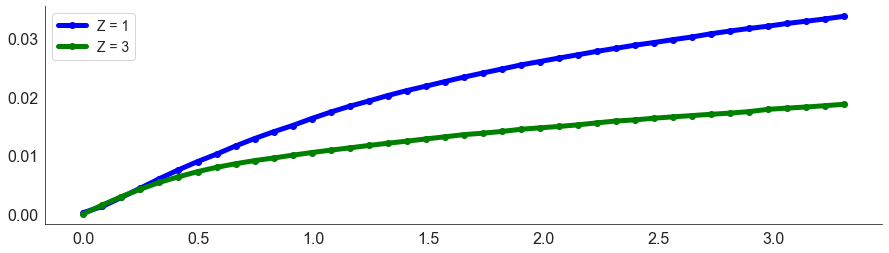

In [35]:
###ddm rmse###
ddm_signal=[0.0000,0.0010,0.0020,0.0030,0.0040,0.0050,0.0060,0.0070,0.0080,0.0090,0.0100,0.0110,0.0120,0.0130,0.0140,0.0150,0.0160,0.0170,0.0180,0.0190,0.0200,0.0210,0.0220,0.0230,0.0240,0.0250,0.0260,0.0270,0.0280,0.0290,0.0300,0.0310,0.0320,0.0330,0.0340,0.0350,0.0360,0.0370,0.0380,0.0390,0.0400]
#[0.00015112294044326673,0.002048698485281036,0.0039045211753699406,0.005731923724883113,0.007494477023806472,0.009253454003874763,0.010996398100134402,0.012809074798718324,0.014452637048423119,0.01602528476626601,0.017559236944736985,0.019110692245399935,0.02055035987776168,0.021932029648980177,0.023281466530970546,0.024634107242968623,0.0258979489173772,0.02719445709100988,0.028497353149184296,0.029702520755709314,0.03099856891349731,]
c_ddm=.11
n_ddm=1

SnR_ddm=[]
rms_SnR_ddm=[]
rms_SnR_ddm_nt=[]

for i in range(len(st_ddm)):
    
    SnR_ddm.append(((ddm_signal[i])/(c_ddm**2)))
    squared_SnR_ddm=abs(((ddm_signal[i])**2)-(mean(st_ddm[i][0])**2))
    rms_SnR_ddm.append(np.sqrt(squared_SnR_ddm))
    
    squared_SnR_ddm_nt=abs(((ddm_signal[i])**2)-(mean(st_nt_ddm[i][0])**2))
    rms_SnR_ddm_nt.append(np.sqrt(squared_SnR_ddm_nt))
    
fig=plt.figure()
fig.set_figwidth(20)
fig.set_figwidth(15)

plt.plot(SnR_ddm,rms_SnR_ddm,'o-',color='blue',label='Z = 1',linewidth="5")
plt.plot(SnR_ddm,rms_SnR_ddm_nt,'o-',color='green',label='Z = 3',linewidth="5")

plt.legend(loc="best")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# LCA-DDM

In [150]:
###lca-ddm st###
file_name = "Data_SINDy/LCA-DDM/dec_23/multiprocessing_lcaddm_kelvin_st_dec.pkl"
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()
st_lcaddm=loaded_list
st_lcaddm=normalise_decision_time(st_lcaddm,3,4)

In [553]:
###lcaddm poly winner st###
file_name = "Data_SINDy/LCA-DDM/dec_23/multiprocessing_lcaddm_kelvin_st_poly0_full.pkl"
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()
st_lcaddm_poly=loaded_list
st_lcaddm_poly=normalise_decision_time(st_lcaddm_poly,3,4,lcaddm=True)

In [552]:
###lcaddm poly winner ave###
file_name = "Data_SINDy/LCA-DDM/dec_23/multiprocessing_lcaddm_kelvin_ave_poly0.pkl"
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()
ave_lcaddm_poly=loaded_list
ave_lcaddm=normalise_decision_time(ave_lcaddm_poly,3,4,lcaddm=True)

In [513]:
###lca-ddm ave###
file_name = "Data_SINDy/LCA-DDM/dec_23/multiprocessing_lcaddm_kelvin_ave_dec.pkl"
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()
ave_lcaddm=loaded_list
ave_lcaddm=normalise_decision_time(ave_lcaddm,3,4)

In [ ]:
###lca-ddm st nt###
file_name = "Data_SINDy/LCA-DDM/dec_23/multiprocessing_lcaddm_kelvin_st_nt_dec.pkl"
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()
st_lcaddm_nt=loaded_list
st_lcaddm_nt=normalise_decision_time(st_lcaddm_nt,3,4)

In [ ]:
###lca-ddm ave nt###
file_name = "Data_SINDy/LCA-DDM/dec_23/multiprocessing_lcaddm_kelvin_ave_nt_dec.pkl"
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()
ave_lcaddm_nt=loaded_list
ave_lcaddm_nt=normalise_decision_time(ave_lcaddm_nt,3,4)

In [ ]:
###average coefs st lca#
average_array=[]
[average_array.append(np.mean(st_lcaddm_nt[i][0],axis=0)) for i in range(41)]
# Assuming 'your_list' is your original list with shape (41, 3, 2) or (41,2,3)
your_array = np.array(average_array)
# Reshape the array to have shape (41, 6)
reshaped_array = your_array.reshape(41, 6)
# If you need the result back as a list
reshaped_list = reshaped_array.tolist()
# print(np.array(reshaped_list).shape)

In [151]:
#lca-ddm SNR
lcaddm_signal=[0.0000,0.0010,0.0020,0.0030,0.0040,0.0050,0.0060,0.0070,0.0080,0.0090,0.0100,0.0110,0.0120,0.0130,0.0140,0.0150,0.0160,0.0170,0.0180,0.0190,0.0200,0.0210,0.0220,0.0230,0.0240,0.0250,0.0260,0.0270,0.0280,0.0290,0.0300,0.0310,0.0320,0.0330,0.0340,0.0350,0.0360,0.0370,0.0380,0.0390,0.0400]
S2_lcaddm=3#3#Stimulus input amplitude to y2 
b_lcaddm=10 #Mutual inhibitory coupling strength between the y's 
k_lcaddm=10 # Rate of decay of the y's 3
n_lcaddm=6
c_lcaddm=.11
SnR_lcaddm=[]

for i in range(len(st_lcaddm)):
    
    SnR_lcaddm.append(((lcaddm_signal[i])/(c_lcaddm**2)))

In [ ]:
# lcaddm rmse
lcaddm_signal=[0.0000,0.0010,0.0020,0.0030,0.0040,0.0050,0.0060,0.0070,0.0080,0.0090,0.0100,0.0110,0.0120,0.0130,0.0140,0.0150,0.0160,0.0170,0.0180,0.0190,0.0200,0.0210,0.0220,0.0230,0.0240,0.0250,0.0260,0.0270,0.0280,0.0290,0.0300,0.0310,0.0320,0.0330,0.0340,0.0350,0.0360,0.0370,0.0380,0.0390,0.0400]
S2_lcaddm=3#3#Stimulus input amplitude to y2 
b_lcaddm=10 #Mutual inhibitory coupling strength between the y's 
k_lcaddm=10 # Rate of decay of the y's 3
n_lcaddm=6
c_lcaddm=.11

SnR_lcaddm=[]
rms_SnR_lcaddm=[]
rms_SnR_lcaddm_nt=[]

###average coefs st lcaddm#
average_array=[]
[average_array.append(np.mean(st_lcaddm[i][0],axis=0)) for i in range(41)]
# Assuming 'your_list' is your original list with shape (41, 3, 2) or (41,2,3)
your_array = np.array(average_array)
# Reshape the array to have shape (41, 6)
reshaped_array = your_array.reshape(41, 6)
# If you need the result back as a list
reshaped_list = reshaped_array.tolist()
# print(np.array(reshaped_list).shape)

average_array=[]
[average_array.append(np.mean(st_lcaddm_nt[i][0],axis=0)) for i in range(41)]
# Assuming 'your_list' is your original list with shape (41, 3, 2) or (41,2,3)
your_array = np.array(average_array)
# Reshape the array to have shape (41, 6)
reshaped_array = your_array.reshape(41, 6)
# If you need the result back as a list
reshaped_list_nt = reshaped_array.tolist()

for i in range(len(st_lcaddm)):
    
    SnR_lcaddm.append(((lcaddm_signal[i])/(c_lcaddm**2)))
    squared_SnR_lcaddm=abs(((3+lcaddm_signal[i])**2)-(reshaped_list[i][0]**2))+abs((k_lcaddm**2)-(reshaped_list[i][1]**2))+abs((b_lcaddm**2)-(reshaped_list[i][2]**2))+abs(((S2_lcaddm)**2)-(reshaped_list[i][3]**2))+abs((k_lcaddm**2)-(reshaped_list[i][5]**2))+abs((b_lcaddm**2)-(reshaped_list[i][4]**2))
    rms_SnR_lcaddm.append(np.sqrt(squared_SnR_lcaddm/n_lcaddm))
    
    squared_SnR_lcaddm_nt=abs(((3+lcaddm_signal[i])**2)-(reshaped_list_nt[i][0]**2))+abs((k_lcaddm**2)-(reshaped_list_nt[i][1]**2))+abs((b_lcaddm**2)-(reshaped_list_nt[i][2]**2))+abs(((S2_lcaddm)**2)-(reshaped_list_nt[i][3]**2))+abs((k_lcaddm**2)-(reshaped_list_nt[i][5]**2))+abs((b_lcaddm**2)-(reshaped_list_nt[i][4]**2))
    rms_SnR_lcaddm_nt.append(np.sqrt(squared_SnR_lcaddm_nt/n_lcaddm))
    
fig=plt.figure()
fig.set_figwidth(20)
fig.set_figwidth(15)

plt.plot(SnR_lcaddm,rms_SnR_lcaddm,'o-',color='blue',label='Z = 1',linewidth="5")
plt.plot(SnR_lcaddm,rms_SnR_lcaddm_nt,'o-',color='green',label='Z = 2.5',linewidth="5")

plt.legend(loc="best")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# LCA

In [ ]:
###average coefs st lca#
average_array=[]
#[average_array.append(np.mean(st_lca_nt[i][0],axis=0)) for i in range(41)]
# Assuming 'your_list' is your original list with shape (41, 3, 2) or (41,2,3)
your_array = np.array(average_array)
# Reshape the array to have shape (41, 6)
reshaped_array = your_array.reshape(41, 6)
# If you need the result back as a list
reshaped_list = reshaped_array.tolist()
# print(np.array(reshaped_list).shape)

In [298]:
###lca st###
file_name = "Data_SINDy/LCA/dec_23/multiprocessing_lca_kelvin_st_dec.pkl"
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()
st_lca=loaded_list
st_lca=normalise_decision_time(st_lca,3,4)

In [ ]:
###lca st nt###
file_name = "Data_SINDy/LCA/dec_23/multiprocessing_lca_kelvin_st_nt_dec.pkl"
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()
st_nt_lca=loaded_list
st_nt_lca=normalise_decision_time(st_nt_lca,3,4)

In [344]:
###lca ave###
file_name = "Data_SINDy/LCA/dec_23/multiprocessing_lca_kelvin_ave_dec.pkl"
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()
ave_lca=loaded_list
ave_lca=normalise_decision_time(ave_lca,3,4)

In [ ]:
###lca ave nt###
file_name = "Data_SINDy/LCA/dec_23/multiprocessing_lca_kelvin_ave_nt_dec.pkl"
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()
ave_lca_nt=loaded_list
ave_lca_nt=normalise_decision_time(ave_lca_nt,3,4)

In [ ]:
#lca accuracy
x_lca=SnR_lca
lca_acc=confidenceInterval(st_lca,1,10000)
lca_acc=[np.array(lca_acc[i])*100 for i in range(len(lca_acc))]
lca_accsin=confidenceInterval(st_lca,2,10000)
lca_accsin=[np.array(lca_accsin[i])*100 for i in range(len(lca_accsin))]
c_lca_acc,p_lca_acc,sig_points_acc_lca=statistical_analysis(st_lca,1,2,x_lca)

lca_nt_acc=confidenceInterval(st_nt_lca,1,10000)
lca_nt_acc=[np.array(lca_nt_acc[i])*100 for i in range(len(lca_nt_acc))]
lca_nt_accsin=confidenceInterval(st_nt_lca,2,10000)
lca_nt_accsin=[np.array(lca_nt_accsin[i])*100 for i in range(len(lca_nt_accsin))]
c_lca_nt_acc,p_lca_nt_acc,sig_points_acc_lca_nt=statistical_analysis(st_nt_lca,1,2,x_lca)

#x_lca=SnR_lca
lca_aceave=confidenceInterval(ave_lca,1,10000)
lca_aceave=[np.array(lca_aceave[i])*100 for i in range(len(lca_aceave))]
lca_aceavesin=confidenceInterval(ave_lca,2,10000)
lca_aceavesin=[np.array(lca_aceavesin[i])*100 for i in range(len(lca_aceavesin))]
c_lca_aceave,p_lca_aceave,sig_points_aceave_lca=statistical_analysis(ave_lca,1,2,x_lca)

lca_nt_aceave=confidenceInterval(ave_lca_nt,1,10000)
lca_nt_aceave=[np.array(lca_nt_aceave[i])*100 for i in range(len(lca_nt_aceave))]
lca_nt_aceavesin=confidenceInterval(ave_lca_nt,2,10000)
lca_nt_aceavesin=[np.array(lca_nt_aceavesin[i])*100 for i in range(len(lca_nt_aceavesin))]
c_lca_nt_aceave,p_lca_nt_aceave,sig_points_aceave_lca_nt=statistical_analysis(ave_lca_nt,1,2,x_lca)

# ###st###
fig=plt.figure()
fig.set_figwidth(20)
fig.set_figwidth(15)

plt.plot(sig_points_acc_lca, np.full(len(sig_points_acc_lca),40), '*',color='black')
plt.plot(x_lca,lca_acc[2],'o-',color='blue',label="Model")
plt.plot(x_lca,lca_acc[0],color='cyan')
plt.plot(x_lca,lca_acc[1],color='cyan')
plt.fill_between(x_lca, lca_acc[0], lca_acc[1],  facecolor='cyan', interpolate=True,alpha=0.25)

plt.plot(x_lca,lca_accsin[2],'o-',color='orange',label="SINDy")
plt.plot(x_lca,lca_accsin[0],color='gold')
plt.plot(x_lca,lca_accsin[1],color='gold')
plt.fill_between(x_lca, lca_accsin[0], lca_accsin[1],  facecolor='gold', interpolate=True,alpha=0.25)

plt.legend(loc="best")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
#plt.savefig('choice_acc_lca_15_01_st.svg', dpi=300, bbox_inches='tight')

###ave###
fig=plt.figure()
fig.set_figwidth(20)
fig.set_figwidth(15)

plt.plot(sig_points_aceave_lca, np.full(len(sig_points_aceave_lca),40), '*',color='black')
plt.plot(x_lca,lca_aceave[2],'o-',color='blue',label="Model")
plt.plot(x_lca,lca_aceave[0],color='cyan')
plt.plot(x_lca,lca_aceave[1],color='cyan')
plt.fill_between(x_lca, lca_aceave[0], lca_aceave[1],  facecolor='cyan', interpolate=True,alpha=0.25)

plt.plot(x_lca,lca_aceavesin[2],'o-',color='orange',label="SINDy")
plt.plot(x_lca,lca_aceavesin[0],color='gold')
plt.plot(x_lca,lca_aceavesin[1],color='gold')
plt.fill_between(x_lca, lca_aceavesin[0], lca_aceavesin[1],  facecolor='gold', interpolate=True,alpha=0.25)

#plt.legend(loc="best")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
#plt.savefig('choice_acc_lca_15_01_ave.svg', dpi=300, bbox_inches='tight')

# ###st_nt###
fig=plt.figure()
fig.set_figwidth(20)
fig.set_figwidth(15)

plt.plot(sig_points_acc_lca_nt, np.full(len(sig_points_acc_lca_nt),40), '*',color='black')
plt.plot(x_lca,lca_nt_acc[2],'o-',color='green',label="Model")
plt.plot(x_lca,lca_nt_acc[0],color='cyan')
plt.plot(x_lca,lca_nt_acc[1],color='cyan')
plt.fill_between(x_lca, lca_nt_acc[0], lca_nt_acc[1],  facecolor='cyan', interpolate=True,alpha=0.25)

plt.plot(x_lca,lca_nt_accsin[2],'o-',color='pink',label="SINDy")
plt.plot(x_lca,lca_nt_accsin[0],color='gold')
plt.plot(x_lca,lca_nt_accsin[1],color='gold')
plt.fill_between(x_lca, lca_nt_accsin[0], lca_nt_accsin[1],  facecolor='gold', interpolate=True,alpha=0.25)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.legend(loc="upper left", prop={'size': 16})
#plt.savefig('choice_acc_lca_15_01_st_nt.svg', dpi=300, bbox_inches='tight')

###ave_nt###
fig=plt.figure()
fig.set_figwidth(20)
fig.set_figwidth(15)

plt.plot(sig_points_aceave_lca_nt, np.full(len(sig_points_aceave_lca_nt),40), '*',color='black')
plt.plot(x_lca,lca_nt_aceave[2],'o-',color='green',label="Model")
plt.plot(x_lca,lca_nt_aceave[0],color='cyan')
plt.plot(x_lca,lca_nt_aceave[1],color='cyan')
plt.fill_between(x_lca, lca_nt_aceave[0], lca_nt_aceave[1],  facecolor='cyan', interpolate=True,alpha=0.25)

plt.plot(x_lca,lca_nt_aceavesin[2],'o-',color='pink',label="SINDy")
plt.plot(x_lca,lca_nt_aceavesin[0],color='gold')
plt.plot(x_lca,lca_nt_aceavesin[1],color='gold')
plt.fill_between(x_lca, lca_nt_aceavesin[0], lca_nt_aceavesin[1],  facecolor='gold', interpolate=True,alpha=0.25)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
#plt.savefig('choice_acc_lca_15_01_ave_nt.svg', dpi=300, bbox_inches='tight')


In [ ]:
##lca rts
x_lca=SnR_lca
lca_time=confidenceInterval(st_lca,3,10000)
lca_time=[np.array(lca_time[i])*100 for i in range(len(lca_time))]
lca_timesin=confidenceInterval(st_lca,4,10000)
lca_timesin=[np.array(lca_timesin[i])*100 for i in range(len(lca_timesin))]
c_lca_time,p_lca_time,sig_points_time_lca=ks_statistical_analysis(st_lca,3,4,x_lca)

lca_nt_time=confidenceInterval(st_nt_lca,3,10000)
lca_nt_time=[np.array(lca_nt_time[i])*100 for i in range(len(lca_nt_time))]
lca_nt_timesin=confidenceInterval(st_nt_lca,4,10000)
lca_nt_timesin=[np.array(lca_nt_timesin[i])*100 for i in range(len(lca_nt_timesin))]
c_lca_nt_time,p_lca_nt_time,sig_points_time_lca_nt=ks_statistical_analysis(st_nt_lca,3,4,x_lca)

#x_lca=SnR_lca
lca_timeave=confidenceInterval(ave_lca,3,10000)
lca_timeave=[np.array(lca_timeave[i])*100 for i in range(len(lca_timeave))]
lca_timeavesin=confidenceInterval(ave_lca,4,10000)
lca_timeavesin=[np.array(lca_timeavesin[i])*100 for i in range(len(lca_timeavesin))]
c_lca_timeave,p_lca_timeave,sig_points_timeave_lca=statistical_analysis(ave_lca,3,4,x_lca)

lca_nt_timeave=confidenceInterval(ave_lca_nt,3,10000)
lca_nt_timeave=[np.array(lca_nt_timeave[i])*100 for i in range(len(lca_nt_timeave))]
lca_nt_timeavesin=confidenceInterval(ave_lca_nt,4,10000)
lca_nt_timeavesin=[np.array(lca_nt_timeavesin[i])*100 for i in range(len(lca_nt_timeavesin))]
c_lca_nt_timeave,p_lca_nt_timeave,sig_points_timeave_lca_nt=ks_statistical_analysis(ave_lca_nt,3,4,x_lca)

# ##st###
fig=plt.figure()
fig.set_figwidth(20)
fig.set_figwidth(15)

plt.plot(sig_points_time_lca, np.full(len(sig_points_time_lca),0), '*',color='black')
plt.plot(x_lca,lca_time[2],'o-',color='blue',label="Model")
plt.plot(x_lca,lca_time[0],color='cyan')
plt.plot(x_lca,lca_time[1],color='cyan')
plt.fill_between(x_lca, lca_time[0], lca_time[1],  facecolor='cyan', interpolate=True,alpha=0.25)

plt.plot(x_lca,lca_timesin[2],'o-',color='orange',label="SINDy")
plt.plot(x_lca,lca_timesin[0],color='gold')
plt.plot(x_lca,lca_timesin[1],color='gold')
plt.fill_between(x_lca, lca_timesin[0], lca_timesin[1],  facecolor='gold', interpolate=True,alpha=0.25)

plt.legend(loc="best")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
# plt.savefig('choice_time_lca_24_01.svg', dpi=300, bbox_inches='tight')

# ##ave###
fig=plt.figure()
fig.set_figwidth(20)
fig.set_figwidth(15)

plt.plot(sig_points_timeave_lca, np.full(len(sig_points_timeave_lca),0), '*',color='black')
plt.plot(x_lca,lca_timeave[2],'o-',color='blue',label="Model")
plt.plot(x_lca,lca_timeave[0],color='cyan')
plt.plot(x_lca,lca_timeave[1],color='cyan')
plt.fill_between(x_lca, lca_timeave[0], lca_timeave[1],  facecolor='cyan', interpolate=True,alpha=0.25)

plt.plot(x_lca,lca_timeavesin[2],'o-',color='orange',label="SINDy")
plt.plot(x_lca,lca_timeavesin[0],color='gold')
plt.plot(x_lca,lca_timeavesin[1],color='gold')
plt.fill_between(x_lca, lca_timeavesin[0], lca_timeavesin[1],  facecolor='gold', interpolate=True,alpha=0.25)

#plt.legend(loc="best")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
# plt.savefig('choice_time_lca_24_01_ave.svg', dpi=300, bbox_inches='tight')

###st_nt###
fig=plt.figure()
fig.set_figwidth(20)
fig.set_figwidth(15)

plt.plot(sig_points_time_lca_nt, np.full(len(sig_points_time_lca_nt),0), '*',color='black')
plt.plot(x_lca,lca_nt_time[2],'o-',color='green',label="Model")
plt.plot(x_lca,lca_nt_time[0],color='cyan')
plt.plot(x_lca,lca_nt_time[1],color='cyan')
plt.fill_between(x_lca, lca_nt_time[0], lca_nt_time[1],  facecolor='cyan', interpolate=True,alpha=0.25)

plt.plot(x_lca,lca_nt_timesin[2],'o-',color='pink',label="SINDy")
plt.plot(x_lca,lca_nt_timesin[0],color='gold')
plt.plot(x_lca,lca_nt_timesin[1],color='gold')
plt.fill_between(x_lca, lca_nt_timesin[0], lca_nt_timesin[1],  facecolor='gold', interpolate=True,alpha=0.25)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.legend(loc="upper right", prop={'size': 16})
# plt.savefig('choice_time_lca_24_01_st_nt.svg', dpi=300, bbox_inches='tight')

###ave_nt###
fig=plt.figure()
fig.set_figwidth(20)
fig.set_figwidth(15)

plt.plot(sig_points_timeave_lca_nt, np.full(len(sig_points_timeave_lca_nt),0), '*',color='black')
plt.plot(x_lca,lca_nt_timeave[2],'o-',color='green',label="Model")
plt.plot(x_lca,lca_nt_timeave[0],color='cyan')
plt.plot(x_lca,lca_nt_timeave[1],color='cyan')
plt.fill_between(x_lca, lca_nt_timeave[0], lca_nt_timeave[1],  facecolor='cyan', interpolate=True,alpha=0.25)

plt.plot(x_lca,lca_nt_timeavesin[2],'o-',color='pink',label="SINDy")
plt.plot(x_lca,lca_nt_timeavesin[0],color='gold')
plt.plot(x_lca,lca_nt_timeavesin[1],color='gold')
plt.fill_between(x_lca, lca_nt_timeavesin[0], lca_nt_timeavesin[1],  facecolor='gold', interpolate=True,alpha=0.25)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
# plt.savefig('choice_time_lca_24_01_ave_nt.svg', dpi=300, bbox_inches='tight')

In [ ]:
#rmse lca
lca_signal=[0.0000,0.0300,0.0600,0.0900,0.1200,0.1500,0.1800,0.2100,0.2400,0.2700,0.3000,0.3300,0.3600,0.3900,0.4200,0.4500,0.4800,0.5100,0.5400,0.5700,0.6000,0.6300,0.6600,0.6900,0.7200,0.7500,0.7800,0.8100,0.8400,0.8700,0.9000,0.9300,0.9600,0.9900,1.0200,1.0500,1.0800,1.1100,1.1400,1.1700,1.2000,]
S2_lca=1.85#Stimulus input amplitude to y2 1.85
b_lca=4 #Mutual inhibitory coupling strength between the y's 4
k_lca=3 # Rate of decay of the y's 3
n_lca=6
c_lca=.11
SnR_lca=[]
rms_SnR_lca=[]
rms_SnR_lca_nt=[]

###average coefs st lca#
average_array=[]
[average_array.append(np.mean(st_lca[i][0],axis=0)) for i in range(41)]
# Assuming 'your_list' is your original list with shape (41, 3, 2) or (41,2,3)
your_array = np.array(average_array)
# Reshape the array to have shape (41, 6)
reshaped_array = your_array.reshape(41, 6)
# If you need the result back as a list
reshaped_list = reshaped_array.tolist()
# print(np.array(reshaped_list).shape)

# average_array=[]
# [average_array.append(np.mean(st_nt_lca[i][0],axis=0)) for i in range(41)]
# # Assuming 'your_list' is your original list with shape (41, 3, 2) or (41,2,3)
# your_array = np.array(average_array)
# # Reshape the array to have shape (41, 6)
# reshaped_array = your_array.reshape(41, 6)
# # If you need the result back as a list
# reshaped_list_nt = reshaped_array.tolist()

for i in range(len(st_lca)):
    
    SnR_lca.append(((lca_signal[i])/(c_lca**2)))
    squared_SnR_lca=abs(((1.85+lca_signal[i])**2)-(reshaped_list[i][0]**2))+abs((k_lca**2)-(reshaped_list[i][1]**2))+abs((b_lca**2)-(reshaped_list[i][2]**2))+abs(((S2_lca)**2)-(reshaped_list[i][3]**2))+abs((k_lca**2)-(reshaped_list[i][5]**2))+abs((b_lca**2)-(reshaped_list[i][4]**2))
    rms_SnR_lca.append(np.sqrt(squared_SnR_lca))
    
#     squared_SnR_lca_nt=abs(((1.85+lca_signal[i])**2)-(reshaped_list_nt[i][0]**2))+abs((k_lca**2)-(reshaped_list_nt[i][1]**2))+abs((b_lca**2)-(reshaped_list_nt[i][2]**2))+abs(((S2_lca)**2)-(reshaped_list_nt[i][3]**2))+abs((k_lca**2)-(reshaped_list_nt[i][5]**2))+abs((b_lca**2)-(reshaped_list_nt[i][4]**2))
#     rms_SnR_lca_nt.append(np.sqrt(squared_SnR_lca_nt))
    
# fig=plt.figure()
# fig.set_figwidth(20)
# fig.set_figwidth(15)

# plt.plot(SnR_lca,rms_SnR_lca,'o-',color='blue',label='Z = 1',linewidth="5")
# plt.plot(SnR_lca,rms_SnR_lca_nt,'o-',color='green',label='Z = 3',linewidth="5")

# plt.legend(loc="best")
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)
#plt.savefig('rmse_lca_15_01.svg', dpi=300, bbox_inches='tight')

In [ ]:
##lca rts
x_lca=SnR_lca
lca_time=confidenceInterval(st_lca,3,10000)
lca_time=[np.array(lca_time[i])*100 for i in range(len(lca_time))]
lca_timesin=confidenceInterval(st_lca,4,10000)
lca_timesin=[np.array(lca_timesin[i])*100 for i in range(len(lca_timesin))]
c_lca_time,p_lca_time,sig_points_time_lca=statistical_analysis(st_lca,3,4,x_lca)

lca_nt_time=confidenceInterval(st_nt_lca,3,10000)
lca_nt_time=[np.array(lca_nt_time[i])*100 for i in range(len(lca_nt_time))]
lca_nt_timesin=confidenceInterval(st_nt_lca,4,10000)
lca_nt_timesin=[np.array(lca_nt_timesin[i])*100 for i in range(len(lca_nt_timesin))]
c_lca_nt_time,p_lca_nt_time,sig_points_time_lca_nt=statistical_analysis(st_nt_lca,3,4,x_lca)

#x_lca=SnR_lca
lca_timeave=confidenceInterval(ave_lca,3,10000)
lca_timeave=[np.array(lca_timeave[i])*100 for i in range(len(lca_timeave))]
lca_timeavesin=confidenceInterval(ave_lca,4,10000)
lca_timeavesin=[np.array(lca_timeavesin[i])*100 for i in range(len(lca_timeavesin))]
c_lca_timeave,p_lca_timeave,sig_points_timeave_lca=statistical_analysis(ave_lca,3,4,x_lca)

lca_nt_timeave=confidenceInterval(ave_lca_nt,3,10000)
lca_nt_timeave=[np.array(lca_nt_timeave[i])*100 for i in range(len(lca_nt_timeave))]
lca_nt_timeavesin=confidenceInterval(ave_lca_nt,4,10000)
lca_nt_timeavesin=[np.array(lca_nt_timeavesin[i])*100 for i in range(len(lca_nt_timeavesin))]
c_lca_nt_timeave,p_lca_nt_timeave,sig_points_timeave_lca_nt=statistical_analysis(ave_lca_nt,3,4,x_lca)

# ##st###
fig=plt.figure()
fig.set_figwidth(20)
fig.set_figwidth(15)

plt.plot(sig_points_time_lca, np.full(len(sig_points_time_lca),0), '*',color='black')
plt.plot(x_lca,lca_time[2],'o-',color='blue',label="Model")
plt.plot(x_lca,lca_time[0],color='cyan')
plt.plot(x_lca,lca_time[1],color='cyan')
plt.fill_between(x_lca, lca_time[0], lca_time[1],  facecolor='cyan', interpolate=True,alpha=0.25)

plt.plot(x_lca,lca_timesin[2],'o-',color='orange',label="SINDy")
plt.plot(x_lca,lca_timesin[0],color='gold')
plt.plot(x_lca,lca_timesin[1],color='gold')
plt.fill_between(x_lca, lca_timesin[0], lca_timesin[1],  facecolor='gold', interpolate=True,alpha=0.25)

plt.legend(loc="best")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
#plt.savefig('choice_time_lca_15_01.svg', dpi=300, bbox_inches='tight')

# ##ave###
fig=plt.figure()
fig.set_figwidth(20)
fig.set_figwidth(15)

plt.plot(sig_points_timeave_lca, np.full(len(sig_points_timeave_lca),0), '*',color='black')
plt.plot(x_lca,lca_timeave[2],'o-',color='blue',label="Model")
plt.plot(x_lca,lca_timeave[0],color='cyan')
plt.plot(x_lca,lca_timeave[1],color='cyan')
plt.fill_between(x_lca, lca_timeave[0], lca_timeave[1],  facecolor='cyan', interpolate=True,alpha=0.25)

plt.plot(x_lca,lca_timeavesin[2],'o-',color='orange',label="SINDy")
plt.plot(x_lca,lca_timeavesin[0],color='gold')
plt.plot(x_lca,lca_timeavesin[1],color='gold')
plt.fill_between(x_lca, lca_timeavesin[0], lca_timeavesin[1],  facecolor='gold', interpolate=True,alpha=0.25)

#plt.legend(loc="best")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
#plt.savefig('choice_time_lca_15_01_ave.svg', dpi=300, bbox_inches='tight')

###st_nt###
fig=plt.figure()
fig.set_figwidth(20)
fig.set_figwidth(15)

plt.plot(sig_points_time_lca_nt, np.full(len(sig_points_time_lca_nt),0), '*',color='black')
plt.plot(x_lca,lca_nt_time[2],'o-',color='green',label="Model")
plt.plot(x_lca,lca_nt_time[0],color='cyan')
plt.plot(x_lca,lca_nt_time[1],color='cyan')
plt.fill_between(x_lca, lca_nt_time[0], lca_nt_time[1],  facecolor='cyan', interpolate=True,alpha=0.25)

plt.plot(x_lca,lca_nt_timesin[2],'o-',color='pink',label="SINDy")
plt.plot(x_lca,lca_nt_timesin[0],color='gold')
plt.plot(x_lca,lca_nt_timesin[1],color='gold')
plt.fill_between(x_lca, lca_nt_timesin[0], lca_nt_timesin[1],  facecolor='gold', interpolate=True,alpha=0.25)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.legend(loc="upper right", prop={'size': 16})
#plt.savefig('choice_time_lca_15_01_st_nt.svg', dpi=300, bbox_inches='tight')

###ave_nt###
fig=plt.figure()
fig.set_figwidth(20)
fig.set_figwidth(15)

plt.plot(sig_points_timeave_lca_nt, np.full(len(sig_points_timeave_lca_nt),0), '*',color='black')
plt.plot(x_lca,lca_nt_timeave[2],'o-',color='green',label="Model")
plt.plot(x_lca,lca_nt_timeave[0],color='cyan')
plt.plot(x_lca,lca_nt_timeave[1],color='cyan')
plt.fill_between(x_lca, lca_nt_timeave[0], lca_nt_timeave[1],  facecolor='cyan', interpolate=True,alpha=0.25)

plt.plot(x_lca,lca_nt_timeavesin[2],'o-',color='pink',label="SINDy")
plt.plot(x_lca,lca_nt_timeavesin[0],color='gold')
plt.plot(x_lca,lca_nt_timeavesin[1],color='gold')
plt.fill_between(x_lca, lca_nt_timeavesin[0], lca_nt_timeavesin[1],  facecolor='gold', interpolate=True,alpha=0.25)

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
#plt.savefig('choice_time_lca_15_01_ave_nt.svg', dpi=300, bbox_inches='tight')

In [318]:
# lca SnR
lca_signal=[0.0000,0.0300,0.0600,0.0900,0.1200,0.1500,0.1800,0.2100,0.2400,0.2700,0.3000,0.3300,0.3600,0.3900,0.4200,0.4500,0.4800,0.5100,0.5400,0.5700,0.6000,0.6300,0.6600,0.6900,0.7200,0.7500,0.7800,0.8100,0.8400,0.8700,0.9000,0.9300,0.9600,0.9900,1.0200,1.0500,1.0800,1.1100,1.1400,1.1700,1.2000,]
c_lca=.11
SnR_lca=[]
for i in range(len(st_lca)):
    
    SnR_lca.append(((lca_signal[i])/(c_lca**2)))

In [ ]:
# lca rmse
lca_signal=[0.0000,0.0300,0.0600,0.0900,0.1200,0.1500,0.1800,0.2100,0.2400,0.2700,0.3000,0.3300,0.3600,0.3900,0.4200,0.4500,0.4800,0.5100,0.5400,0.5700,0.6000,0.6300,0.6600,0.6900,0.7200,0.7500,0.7800,0.8100,0.8400,0.8700,0.9000,0.9300,0.9600,0.9900,1.0200,1.0500,1.0800,1.1100,1.1400,1.1700,1.2000,]
S2_lca=1.85#Stimulus input amplitude to y2 1.85
b_lca=4 #Mutual inhibitory coupling strength between the y's 4
k_lca=3 # Rate of decay of the y's 3
n_lca=6
c_lca=.11
SnR_lca=[]
rms_SnR_lca=[]
rms_SnR_lca_nt=[]

###average coefs st lca#
average_array=[]
[average_array.append(np.mean(st_lca[i][0],axis=0)) for i in range(41)]
# Assuming 'your_list' is your original list with shape (41, 3, 2) or (41,2,3)
your_array = np.array(average_array)
# Reshape the array to have shape (41, 6)
reshaped_array = your_array.reshape(41, 6)
# If you need the result back as a list
reshaped_list = reshaped_array.tolist()
# print(np.array(reshaped_list).shape)

average_array=[]
[average_array.append(np.mean(st_nt_lca[i][0],axis=0)) for i in range(41)]
# Assuming 'your_list' is your original list with shape (41, 3, 2) or (41,2,3)
your_array = np.array(average_array)
# Reshape the array to have shape (41, 6)
reshaped_array = your_array.reshape(41, 6)
# If you need the result back as a list
reshaped_list_nt = reshaped_array.tolist()

for i in range(len(st_lca)):
    
    SnR_lca.append(((lca_signal[i])/(c_lca**2)))
    squared_SnR_lca=abs(((1.85+lca_signal[i])**2)-(reshaped_list[i][0]**2))+abs((k_lca**2)-(reshaped_list[i][1]**2))+abs((b_lca**2)-(reshaped_list[i][2]**2))+abs(((S2_lca)**2)-(reshaped_list[i][3]**2))+abs((k_lca**2)-(reshaped_list[i][5]**2))+abs((b_lca**2)-(reshaped_list[i][4]**2))
    rms_SnR_lca.append(np.sqrt(squared_SnR_lca/n_lca))
    
    squared_SnR_lca_nt=abs(((1.85+lca_signal[i])**2)-(reshaped_list_nt[i][0]**2))+abs((k_lca**2)-(reshaped_list_nt[i][1]**2))+abs((b_lca**2)-(reshaped_list_nt[i][2]**2))+abs(((S2_lca)**2)-(reshaped_list_nt[i][3]**2))+abs((k_lca**2)-(reshaped_list_nt[i][5]**2))+abs((b_lca**2)-(reshaped_list_nt[i][4]**2))
    rms_SnR_lca_nt.append(np.sqrt(squared_SnR_lca_nt/n_lca))
    
fig=plt.figure()
fig.set_figwidth(20)
fig.set_figwidth(15)

plt.plot(SnR_lca,rms_SnR_lca,'o-',color='blue',label='Z = 1',linewidth="5")
plt.plot(SnR_lca,rms_SnR_lca_nt,'o-',color='green',label='Z = 3',linewidth="5")

plt.legend(loc="best")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
#plt.savefig('rmse_lca_15_01.svg', dpi=300, bbox_inches='tight')

# Single trial

In [554]:
#fig2. setup
x_ddm=SnR_ddm
ddm_acc=confidenceInterval(st_ddm,1,10000)
ddm_acc=[np.array(ddm_acc[i])*100 for i in range(len(ddm_acc))]
ddm_accsin=confidenceInterval(st_ddm,2,10000)
ddm_accsin=[np.array(ddm_accsin[i])*100 for i in range(len(ddm_accsin))]
c_ddm_acc,p_ddm_acc,sig_points_acc_ddm,effect_st_ddm=ks_statistical_analysis(st_ddm,1,2,x_ddm)

ddm_time=confidenceInterval(st_ddm,3,10000)
ddm_time=[np.array(ddm_time[i]) for i in range(len(ddm_time))]
ddm_timesin=confidenceInterval(st_ddm,4,10000)
ddm_timesin=[np.array(ddm_timesin[i]) for i in range(len(ddm_timesin))]
c_ddm_time,p_ddm_time,sig_points_time_ddm,effect_st_ddm_t=ks_statistical_analysis(st_ddm,3,4,x_ddm)

x_lcaddm=SnR_lcaddm
lcaddm_acc=confidenceInterval(st_lcaddm,1,10000)
lcaddm_acc=[np.array(lcaddm_acc[i])*100 for i in range(len(lcaddm_acc))]
lcaddm_accsin=confidenceInterval(st_lcaddm,2,10000)
lcaddm_accsin=[np.array(lcaddm_accsin[i])*100 for i in range(len(lcaddm_accsin))]
c_lcaddm_acc,p_lcaddm_acc,sig_points_acc_lcaddm,effect_st_lcaddm=ks_statistical_analysis(st_lcaddm,1,2,x_lcaddm)

lcaddm_time=confidenceInterval(st_lcaddm,3,10000)
lcaddm_time=[np.array(lcaddm_time[i]) for i in range(len(lcaddm_time))]
lcaddm_timesin=confidenceInterval(st_lcaddm,4,10000)
lcaddm_timesin=[np.array(lcaddm_timesin[i]) for i in range(len(lcaddm_timesin))]
c_lcaddm_time,p_lcaddm_time,sig_points_time_lcaddm,effect_st_lcaddm_t=ks_statistical_analysis(st_lcaddm,3,4,x_lcaddm)

lcaddm_poly_acc=confidenceInterval(st_lcaddm_poly,1,10000)
lcaddm_poly_acc=[np.array(lcaddm_poly_acc[i])*100 for i in range(len(lcaddm_poly_acc))]
lcaddm_poly_accsin=confidenceInterval(st_lcaddm_poly,2,10000)
lcaddm_poly_accsin=[np.array(lcaddm_poly_accsin[i])*100 for i in range(len(lcaddm_poly_accsin))]
c_lcaddm_poly_acc,p_lcaddm_poly_acc,sig_points_acc_lcaddm_poly,effect_st_lcaddm_poly=ks_statistical_analysis(st_lcaddm_poly,1,2,x_lcaddm)

lcaddm_poly_time=confidenceInterval(st_lcaddm_poly,3,10000)
lcaddm_poly_time=[np.array(lcaddm_poly_time[i]) for i in range(len(lcaddm_poly_time))]
lcaddm_poly_timesin=confidenceInterval(st_lcaddm_poly,4,10000)
lcaddm_poly_timesin=[np.array(lcaddm_poly_timesin[i]) for i in range(len(lcaddm_poly_timesin))]
c_lcaddm_poly_time,p_lcaddm_poly_time,sig_points_time_lcaddm_poly,effect_st_lcaddm_poly_t=ks_statistical_analysis(st_lcaddm_poly,3,4,x_lcaddm)

x_lca=SnR_lca
lca_acc=confidenceInterval(st_lca,1,10000)
lca_acc=[np.array(lca_acc[i])*100 for i in range(len(lca_acc))]
lca_accsin=confidenceInterval(st_lca,2,10000)
lca_accsin=[np.array(lca_accsin[i])*100 for i in range(len(lca_accsin))]
c_lca_acc,p_lca_acc,sig_points_acc_lca,effect_st_lca=ks_statistical_analysis(st_lca,1,2,x_lca)

lca_time=confidenceInterval(st_lca,3,10000)
lca_time=[np.array(lca_time[i]) for i in range(len(lca_time))]
lca_timesin=confidenceInterval(st_lca,4,10000)
lca_timesin=[np.array(lca_timesin[i]) for i in range(len(lca_timesin))]
c_lca_time,p_lca_time,sig_points_time_lca,effect_st_lca_t=ks_statistical_analysis(st_lca,3,4,x_lca)

x_nlb=SnR_nlb
nlb_acc=confidenceInterval(st_nlb,1,10000)
nlb_acc=[np.array(nlb_acc[i])*100 for i in range(len(nlb_acc))]
nlb_accsin=confidenceInterval(st_nlb,2,10000)
nlb_accsin=[np.array(nlb_accsin[i])*100 for i in range(len(nlb_accsin))]
c_nlb_acc,p_nlb_acc,sig_points_acc_nlb,effect_st_nlb=ks_statistical_analysis(st_nlb,1,2,x_nlb)

nlb_time=confidenceInterval(st_nlb,3,10000)
nlb_time=[np.array(nlb_time[i]) for i in range(len(nlb_time))]
nlb_timesin=confidenceInterval(st_nlb,4,10000)
nlb_timesin=[np.array(nlb_timesin[i]) for i in range(len(nlb_timesin))]
c_nlb_time,p_nlb_time,sig_points_time_nlb,effect_st_nlb_t=ks_statistical_analysis(st_nlb,3,4,x_nlb)

In [624]:
# graph varaible
sns.set(font_scale=4)
sns.set_style('white') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=36)     # fontsize of the axes title
plt.rc('axes', labelsize=48)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=48)    # fontsize of the tick labels
plt.rc('ytick', labelsize=48)    # fontsize of the tick labels
#plt.rc('legend', fontsize=16)    # legend fontsize
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rc('font', size=48)          # controls default text sizes
# sns.set(font_scale=2)

In [441]:
#SINDytest
poly_order = 1
threshold = 0.005
smoothed_fd=ps.SmoothedFiniteDifference()

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order),
    differentiation_method=smoothed_fd)

S1=1.85+.04#Stimulus input amplitude to y1 
S2=1.85#Stimulus input amplitude to y2 
b=4 #Mutual inhibitory coupling strength between the y's
k=3 # Rate of decay of the y's

# epsilon = 0.05
# z = .75
# tauX = 20
# c = 0.01
# b= 0.0080

z=1
c=.11
dt=.1

t=np.arange(0,10000,.01)
x = np.zeros_like(t)
# y = np.zeros_like(t)

for p in range(len(x) - 1):
    #print(p)
    x[p+1] = x[p]+dt*(-k*x[p]-b*y[p]+S1) + c*np.sqrt(dt)*np.random.randn()
    y[p+1] = y[p]+dt*(-k*y[p]-b*x[p]+S2) + c*np.sqrt(dt)*np.random.randn()
#     x[p + 1] = x[p] + (dt / tauX) * ((epsilon * x[p]) + (x[p] ** 3) - (x[p] ** 5) + b) + c * np.sqrt((dt / tauX)) * np.random.randn()

    if x[p] >= z :#or y[p]>=z :
        model.fit(np.vstack((x[0:p], y[0:p])).T, t[0:p])
#         model.fit(x[0:p], t[0:p])
        model.print()
        break

(x0)' = 13.606 1 + -19.516 x0 + -25.967 x1
(x1)' = 13.093 1 + -30.489 x0 + -17.965 x1


In [321]:
st_nlb[40][0][0]

array([ 0.01893136, -0.16712338,  1.50578304, -4.03004033,  7.75467105,
       -5.39867099])

In [317]:
print((st_lca[40][0][42]))

[[ 2.5978992  -1.98514209 -2.63915123]
 [ 1.30128286 -3.14781199 -1.18831931]]


In [354]:
np.mean(st_nlb[40][0],axis=0)

array([ 0.00895705,  0.07170828, -0.27923896,  2.18088713, -2.03788521,
        0.23082024])

In [276]:
(st_ddm[40][0][0])

0.042832166482510446

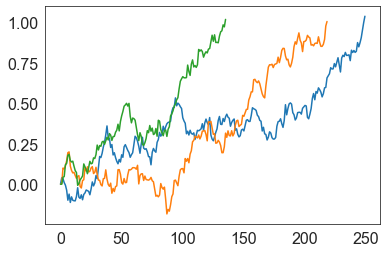

In [293]:
#activity comaprison
trial=0
t=np.arange(0,10000,.1)
sim=np.zeros_like(t)
#np.random.rand(trial+20000)
np.random.seed(trial + 20000+(2000-2000))
for h in range(len(sim) - 1):
    sim[h+1] = sim[h]+(.1*(st_ddm[40][0][trial]))+ .11*np.sqrt(.1)*np.random.randn()
    if abs(sim[h]) >= 1:
        plt.plot(sim[0:h+1])
        plt.plot(st_ddm[40][5][125])
        plt.plot(st_ddm[40][6][125])
        break

In [ ]:
###fig 2 need to add NLB
# Assuming st_ddm and other necessary data are already defined
#ddm accuracy and rts


data_sets = [{'time':np.arange(0,10000,.1),'letter':'A','label':'DDM','model':st_ddm,'x': x_ddm,'acc': ddm_acc,'accsin': ddm_accsin,'time': ddm_time,'timesin': ddm_timesin,'sig_points_acc': sig_points_acc_ddm,'sig_points_time': sig_points_time_ddm,'effect_st_acc': effect_st_ddm,'effect_st_time': effect_st_ddm_t},
{'time':np.arange(0,10000,.01),'letter':'B','label':'LCA-DDM','model':st_lcaddm, 'x': x_lcaddm,'acc': lcaddm_acc,'accsin': lcaddm_accsin,'time': lcaddm_time,'timesin': lcaddm_timesin,'sig_points_acc': sig_points_acc_lcaddm,'sig_points_time': sig_points_time_lcaddm,'effect_st_acc': effect_st_lcaddm,'effect_st_time': effect_st_lcaddm_t,'acc_poly': lcaddm_poly_acc,'accsin_poly': lcaddm_poly_accsin,'time_poly': lcaddm_poly_time,'timesin_poly': lcaddm_poly_timesin,'sig_points_acc_poly': sig_points_acc_lcaddm_poly,'sig_points_time_poly': sig_points_time_lcaddm_poly,'effect_st_acc_poly': effect_st_lcaddm_poly,'effect_st_time_poly': effect_st_lcaddm_poly_t},
{'time':np.arange(0,10000,.01),'letter':'C','label':'LCA','model':st_lca, 'x': x_lca,'acc': lca_acc,'accsin': lca_accsin,'time': lca_time,'timesin': lca_timesin,'sig_points_acc': sig_points_acc_lca,'sig_points_time': sig_points_time_lca,'effect_st_acc': effect_st_lca,'effect_st_time': effect_st_lca_t},
{'time':np.arange(0,10000,.01),'letter':'D','label':'NLB','model':st_nlb, 'x': x_nlb,'acc': nlb_acc,'accsin': nlb_accsin,'time': nlb_time,'timesin': nlb_timesin,'sig_points_acc': sig_points_acc_nlb,'sig_points_time': sig_points_time_nlb,'effect_st_acc': effect_st_nlb,'effect_st_time': effect_st_nlb_t}
]

# Define your figure and gridspec
fig = plt.figure(figsize=(35, 30))  # Adjust the figure size as needed
gs = gridspec.GridSpec(4, 4, wspace=0.65)  # 4 rows, 4 columns, with column spans for the first plot in each row

# Assuming data_sets is defined as provided

for row, model_data in enumerate(data_sets ):  # Repeat data_sets twice since you have 4 rows and 2 models
    # Accessing data for the current model
    model_trials= model_data['model']
    x = model_data['x']
    acc = model_data['acc']
    accsin = model_data['accsin']
    time = model_data['time']
    timesin = model_data['timesin']
    sig_points_acc = model_data['sig_points_acc']
    effect_st_acc = model_data['effect_st_acc']
    sig_points_time = model_data['sig_points_time']
    effect_st_time = model_data['effect_st_time']
    label=model_data['label']
    letter=model_data['letter']
    if letter =="B":
        acc_poly = model_data['acc_poly']
        acc_polysin = model_data['accsin_poly']
        time_poly = model_data['time_poly']
        timesin_poly = model_data['timesin_poly']
        sig_points_acc_poly = model_data['sig_points_acc_poly']
        effect_st_acc_poly = model_data['effect_st_acc_poly']
        sig_points_time_poly = model_data['sig_points_time_poly']
        effect_st_time_poly = model_data['effect_st_time_poly']
    
    
    if len(model_trials[0][5][0])>2:
        
        if len(model_trials[0][5])>100:
            a_test=np.arange(0,10000,.1)
            # First plot: Trial Data Plot, taking double space
            ax0 = fig.add_subplot(gs[row, :2])  # Span first two columns
            ax0.plot(a_test[0:len(model_trials[40][5][125])],model_trials[40][5][125], color='blue', label="Model", linewidth=7)
            ax0.plot(a_test[0:len(model_trials[40][6][125])],model_trials[40][6][125], color='orange', label='SINDy', linewidth=7)
            ax0.axhline(y=1, linestyle='dashed', linewidth=7, color='black', label='Threshold')
            ax0.axhline(y=-1, linestyle='dashed', linewidth=7, color='black')
            ax0.set_xlim(0)
            ax0.set(ylabel="$X$")
            sns.despine()
            ax0.legend(loc='best', fontsize=24)
            ax0.spines['left'].set_linewidth(7)
            ax0.spines['bottom'].set_linewidth(7)
            ax0.set_title(letter, fontsize=48,fontweight='bold' )
            ax0.title.set_position([-.1, 1.05]) 
        else:
            a_test=np.arange(0,10000,.01)

            # First plot: Trial Data Plot, taking double space
            ax0 = fig.add_subplot(gs[row, :2])  # Span first two columns
            ax0.plot(a_test[0:len(model_trials[40][5][2])],model_trials[40][5][2], color='blue', label=label, linewidth=7)
            ax0.plot(a_test[0:len(model_trials[40][6][2])],model_trials[40][6][2], color='orange', label='SINDy', linewidth=7)
            ax0.axhline(y=.75, linestyle='dashed', linewidth=7, color='black', label='Threshold')
            ax0.axhline(y=-.75, linestyle='dashed', linewidth=7, color='black')
            #ax0.set_ylabel('Decision variable')
            ax0.set(ylabel="$X$")
            ax0.set_xlim(0)
            sns.despine()
#             ax0.legend(loc='best', fontsize=24)
            ax0.spines['left'].set_linewidth(7)
            ax0.spines['bottom'].set_linewidth(7)
            ax0.set_title(letter, fontsize=48,fontweight='bold' )
            ax0.title.set_position([-.1, 1.05]) 
    else:
        # First plot: Trial Data Plot, taking double space
        a_test=np.arange(0,10000,.01)
        ax0 = fig.add_subplot(gs[row, :2])  # Span first two columns
        ax0.plot(a_test[0:len(model_trials[40][5][0][0])],(model_trials[40][5][0][0]),color='blue', label=label,linewidth=7 )
        ax0.plot(a_test[0:len(model_trials[40][5][0][1])],(model_trials[40][5][0][1]),color='blue', alpha=.5,linewidth=7 )
        ax0.plot(a_test[0:len(model_trials[40][6][0][0])],(model_trials[40][6][0][0]),color='orange', label='SINDy',linewidth=7 )
        ax0.plot(a_test[0:len(model_trials[40][6][0][1])],(model_trials[40][6][0][1]),color='orange', alpha=.5,linewidth=7 )
        ax0.axhline(y=1, linestyle='dashed', linewidth=7, color='black',label='Threshold')
        ax0.axvline(x=-1, linestyle='dashed', linewidth=7, color='grey',label='Error')
        ax0.set(ylabel="$y_1$, $y_2$")
        ax0.set_xlim(0)
        sns.despine()
#         ax0.legend(loc='best', fontsize=24)
        ax0.spines['left'].set_linewidth(7)
        ax0.spines['bottom'].set_linewidth(7)
        ax0.set_title(letter, fontsize=48,fontweight='bold' )
        ax0.title.set_position([-.1, 1.05]) 
    
    # Second plot: Accuracy Plot
    ax1 = fig.add_subplot(gs[row, 2])
    # Plotting accuracy data
    ax1.plot(sig_points_acc, np.full(len(sig_points_acc), 40), '*', color='black')
    ax1.plot(x, acc[2], '', color='blue', label=label)
    ax1.plot(x, acc[0], color='blue')
    ax1.plot(x, acc[1], color='blue')
    ax1.fill_between(x, acc[0], acc[1], color='blue', alpha=0.25)
    ax1.plot(x, accsin[2], '', color='orange', label="SINDy Model")
    ax1.plot(x, accsin[0], color='orange')
    ax1.plot(x, accsin[1], color='orange')
    ax1.fill_between(x, accsin[0], accsin[1], color='orange', alpha=0.25)
    if letter =='B':
        ax1.plot(x, acc_polysin[2], '', color='gold', label="SINDy Model")
        ax1.plot(x, acc_polysin[0], color='gold')
        ax1.plot(x, acc_polysin[1], color='gold')
        ax1.fill_between(x, acc_polysin[0], acc_polysin[1], color='gold', alpha=0.25)
        
    # Add cliff's d annotations for accuracy
#     for i, (x_val, d_value) in enumerate(zip(x, effect_st_acc)):
#         if sig_points_acc[i] is not None:
#             ax1.text(x_val, 45, f'd={d_value:.2f}', fontsize=4, ha='center', va='bottom', color='red')

    # Third plot: Response Time Plot
    ax2 = fig.add_subplot(gs[row, 3])
    # Plotting response time data
    ax2.plot(sig_points_time, np.full(len(sig_points_time), 0), '*', color='black')
    ax2.plot(x, time[2], '', color='blue', label="Model Response Time")
    ax2.plot(x, time[0], color='blue')
    ax2.plot(x, time[1], color='blue')
    ax2.fill_between(x, time[0], time[1], color='blue', alpha=0.25)
    ax2.plot(x, timesin[2], '', color='orange', label="SINDy Response Time")
    ax2.plot(x, timesin[0], color='orange')
    ax2.plot(x, timesin[1], color='orange')
    ax2.fill_between(x, timesin[0], timesin[1], color='orange', alpha=0.25)
    if letter =='B':
        ax2.plot(x, timesin_poly[2], '', color='gold', label="SINDy Response Time")
        ax2.plot(x, timesin_poly[0], color='gold')
        ax2.plot(x, timesin_poly[1], color='gold')
        ax2.fill_between(x, timesin_poly[0], timesin_poly[1], color='gold', alpha=0.25)
    # Add cliff's d annotations for response time
#     for i, (x_val, d_value) in enumerate(zip(x, effect_st_time)):
#         if sig_points_time[i] is not None:
#             ax2.text(x_val, 1, f'   d={d_value:.2f}  ', fontsize=4, ha='center', va='bottom', color='red')

    # Apply styles
    sns.despine(ax=ax1)
    sns.despine(ax=ax2)
    ax1.spines['left'].set_linewidth(7)
    ax1.spines['bottom'].set_linewidth(7)
    ax2.spines['left'].set_linewidth(7)
    ax2.spines['bottom'].set_linewidth(7)
    #ax1.legend(loc='best', fontsize=14)
    #ax2.legend(loc='best', fontsize=14)
    


    
ax0.set_xlabel('Time (a.u.)')
# ax1.supylabel('Choice accuracy (%)')
# ax2.supylabel('Normalised decision time')
fig.text(.85, .85, 'DDM', ha='center', va='center',zorder=50)
fig.text(.86, .65, 'LCA-DDM', ha='center', va='center',zorder=50)
fig.text(.85, .45, 'LCA', ha='center', va='center',zorder=50)
fig.text(.85, .25, 'NLB', ha='center', va='center',zorder=50)


fig.text(0.71, 0.525, 'Normalised decision time (a.u.)', ha='center', va='center', rotation='vertical',zorder=50)
fig.text(0.50, 0.525, 'Choice accuracy (%)', ha='center', va='center', rotation='vertical',zorder=50)
fig.text(.73, 0.09, 'Signal-to-noise ratio', ha='center', va='center',zorder=50)
fig.text(0.075, 0.525, 'Decision variable', ha='center', va='center',rotation='vertical',zorder=50)

# fig.supylabel('Decision variable')

plt.tight_layout()
plt.savefig('fig_2_single_trial_18_04.svg', dpi=300, bbox_inches='tight')

In [ ]:
###fig 2 need to add NLB
# Assuming st_ddm and other necessary data are already defined
#ddm accuracy and rts


data_sets = [{'time':np.arange(0,10000,.1),'letter':'A','label':'DDM','model':st_ddm,'x': x_ddm,'acc': ddm_acc,'accsin': ddm_accsin,'time': ddm_time,'timesin': ddm_timesin,'sig_points_acc': sig_points_acc_ddm,'sig_points_time': sig_points_time_ddm,'effect_st_acc': effect_st_ddm,'effect_st_time': effect_st_ddm_t},
{'time':np.arange(0,10000,.01),'letter':'B','label':'LCA-DDM','model':st_lcaddm, 'x': x_lcaddm,'acc': lcaddm_acc,'accsin': lcaddm_accsin,'time': lcaddm_time,'timesin': lcaddm_timesin,'sig_points_acc': sig_points_acc_lcaddm,'sig_points_time': sig_points_time_lcaddm,'effect_st_acc': effect_st_lcaddm,'effect_st_time': effect_st_lcaddm_t,'acc_poly': lcaddm_poly_acc,'accsin_poly': lcaddm_poly_accsin,'time_poly': lcaddm_poly_time,'timesin_poly': lcaddm_poly_timesin,'sig_points_acc_poly': sig_points_acc_lcaddm_poly,'sig_points_time_poly': sig_points_time_lcaddm_poly,'effect_st_acc_poly': effect_st_lcaddm_poly,'effect_st_time_poly': effect_st_lcaddm_poly_t},
{'time':np.arange(0,10000,.01),'letter':'C','label':'LCA','model':st_lca, 'x': x_lca,'acc': lca_acc,'accsin': lca_accsin,'time': lca_time,'timesin': lca_timesin,'sig_points_acc': sig_points_acc_lca,'sig_points_time': sig_points_time_lca,'effect_st_acc': effect_st_lca,'effect_st_time': effect_st_lca_t},
{'time':np.arange(0,10000,.01),'letter':'D','label':'NLB','model':st_nlb, 'x': x_nlb,'acc': nlb_acc,'accsin': nlb_accsin,'time': nlb_time,'timesin': nlb_timesin,'sig_points_acc': sig_points_acc_nlb,'sig_points_time': sig_points_time_nlb,'effect_st_acc': effect_st_nlb,'effect_st_time': effect_st_nlb_t}
]

# Define your figure and gridspec
fig = plt.figure(figsize=(35, 30))  # Adjust the figure size as needed
gs = gridspec.GridSpec(4, 4, wspace=0.65)  # 4 rows, 4 columns, with column spans for the first plot in each row

# Assuming data_sets is defined as provided

for row, model_data in enumerate(data_sets ):  # Repeat data_sets twice since you have 4 rows and 2 models
    # Accessing data for the current model
    model_trials= model_data['model']
    x = model_data['x']
    acc = model_data['acc']
    accsin = model_data['accsin']
    time = model_data['time']
    timesin = model_data['timesin']
    sig_points_acc = model_data['sig_points_acc']
    effect_st_acc = model_data['effect_st_acc']
    sig_points_time = model_data['sig_points_time']
    effect_st_time = model_data['effect_st_time']
    label=model_data['label']
    letter=model_data['letter']
    if letter =="B":
        acc_poly = model_data['acc_poly']
        acc_polysin = model_data['accsin_poly']
        time_poly = model_data['time_poly']
        timesin_poly = model_data['timesin_poly']
        sig_points_acc_poly = model_data['sig_points_acc_poly']
        effect_st_acc_poly = model_data['effect_st_acc_poly']
        sig_points_time_poly = model_data['sig_points_time_poly']
        effect_st_time_poly = model_data['effect_st_time_poly']
    
    
    if len(model_trials[0][5][0])>2:
        
        if len(model_trials[0][5])>100:
            a_test=np.arange(0,10000,.1)
            # First plot: Trial Data Plot, taking double space
            ax0 = fig.add_subplot(gs[row, :2])  # Span first two columns
            ax0.plot(a_test[0:len(model_trials[40][5][125])],model_trials[40][5][125], color='blue', label="Model", linewidth=7)
            ax0.plot(a_test[0:len(model_trials[40][6][125])],model_trials[40][6][125], color='orange', label='SINDy', linewidth=7)
            ax0.axhline(y=1, linestyle='dashed', linewidth=7, color='black', label='Threshold')
            ax0.axhline(y=-1, linestyle='dashed', linewidth=7, color='black')
            ax0.set_xlim(0)
            ax0.set(ylabel="$X$")
            sns.despine()
            ax0.legend(loc='best', fontsize=24)
            ax0.spines['left'].set_linewidth(7)
            ax0.spines['bottom'].set_linewidth(7)
            ax0.set_title(letter, fontsize=48,fontweight='bold' )
            ax0.title.set_position([-.1, 1.05]) 
        else:
            a_test=np.arange(0,10000,.01)

            # First plot: Trial Data Plot, taking double space
            ax0 = fig.add_subplot(gs[row, :2])  # Span first two columns
            ax0.plot(a_test[0:len(model_trials[40][5][2])],model_trials[40][5][2], color='blue', label=label, linewidth=7)
            ax0.plot(a_test[0:len(model_trials[40][6][2])],model_trials[40][6][2], color='orange', label='SINDy', linewidth=7)
            ax0.axhline(y=.75, linestyle='dashed', linewidth=7, color='black', label='Threshold')
            ax0.axhline(y=-.75, linestyle='dashed', linewidth=7, color='black')
            #ax0.set_ylabel('Decision variable')
            ax0.set(ylabel="$X$")
            ax0.set_xlim(0)
            sns.despine()
#             ax0.legend(loc='best', fontsize=24)
            ax0.spines['left'].set_linewidth(7)
            ax0.spines['bottom'].set_linewidth(7)
            ax0.set_title(letter, fontsize=48,fontweight='bold' )
            ax0.title.set_position([-.1, 1.05]) 
    else:
        # First plot: Trial Data Plot, taking double space
        a_test=np.arange(0,10000,.01)
        ax0 = fig.add_subplot(gs[row, :2])  # Span first two columns
        ax0.plot(a_test[0:len(model_trials[40][5][0][0])],(model_trials[40][5][0][0]),color='blue', label=label,linewidth=7 )
        ax0.plot(a_test[0:len(model_trials[40][5][0][1])],(model_trials[40][5][0][1]),color='blue', alpha=.5,linewidth=7 )
        ax0.plot(a_test[0:len(model_trials[40][6][0][0])],(model_trials[40][6][0][0]),color='orange', label='SINDy',linewidth=7 )
        ax0.plot(a_test[0:len(model_trials[40][6][0][1])],(model_trials[40][6][0][1]),color='orange', alpha=.5,linewidth=7 )
        ax0.axhline(y=1, linestyle='dashed', linewidth=7, color='black',label='Threshold')
        ax0.axvline(x=-1, linestyle='dashed', linewidth=7, color='grey',label='Error')
        ax0.set(ylabel="$y_1$, $y_2$")
        ax0.set_xlim(0)
        sns.despine()
#         ax0.legend(loc='best', fontsize=24)
        ax0.spines['left'].set_linewidth(7)
        ax0.spines['bottom'].set_linewidth(7)
        ax0.set_title(letter, fontsize=48,fontweight='bold' )
        ax0.title.set_position([-.1, 1.05]) 
    
    # Second plot: Accuracy Plot
    ax1 = fig.add_subplot(gs[row, 2])
    # Plotting accuracy data
    ax1.plot(sig_points_acc, np.full(len(sig_points_acc), 40), '*', color='black')
    ax1.plot(x, acc[2], '', color='blue', label=label)
    ax1.plot(x, acc[0], color='blue')
    ax1.plot(x, acc[1], color='blue')
    ax1.fill_between(x, acc[0], acc[1], color='blue', alpha=0.25)
    ax1.plot(x, accsin[2], '', color='orange', label="SINDy Model")
    ax1.plot(x, accsin[0], color='orange')
    ax1.plot(x, accsin[1], color='orange')
    ax1.fill_between(x, accsin[0], accsin[1], color='orange', alpha=0.25)
    if letter =='B':
        ax1.plot(x, acc_polysin[2], '', color='gold', label="SINDy Model")
        ax1.plot(x, acc_polysin[0], color='gold')
        ax1.plot(x, acc_polysin[1], color='gold')
        ax1.fill_between(x, acc_polysin[0], acc_polysin[1], color='gold', alpha=0.25)
        
    # Add cliff's d annotations for accuracy
#     for i, (x_val, d_value) in enumerate(zip(x, effect_st_acc)):
#         if sig_points_acc[i] is not None:
#             ax1.text(x_val, 45, f'd={d_value:.2f}', fontsize=4, ha='center', va='bottom', color='red')

    # Third plot: Response Time Plot
    ax2 = fig.add_subplot(gs[row, 3])
    # Plotting response time data
    ax2.plot(sig_points_time, np.full(len(sig_points_time), 0), '*', color='black')
    ax2.plot(x, time[2], '', color='blue', label="Model Response Time")
    ax2.plot(x, time[0], color='blue')
    ax2.plot(x, time[1], color='blue')
    ax2.fill_between(x, time[0], time[1], color='blue', alpha=0.25)
    ax2.plot(x, timesin[2], '', color='orange', label="SINDy Response Time")
    ax2.plot(x, timesin[0], color='orange')
    ax2.plot(x, timesin[1], color='orange')
    ax2.fill_between(x, timesin[0], timesin[1], color='orange', alpha=0.25)
    if letter =='B':
        ax2.plot(x, timesin_poly[2], '', color='gold', label="SINDy Response Time")
        ax2.plot(x, timesin_poly[0], color='gold')
        ax2.plot(x, timesin_poly[1], color='gold')
        ax2.fill_between(x, timesin_poly[0], timesin_poly[1], color='gold', alpha=0.25)
    # Add cliff's d annotations for response time
#     for i, (x_val, d_value) in enumerate(zip(x, effect_st_time)):
#         if sig_points_time[i] is not None:
#             ax2.text(x_val, 1, f'   d={d_value:.2f}  ', fontsize=4, ha='center', va='bottom', color='red')

    # Apply styles
    sns.despine(ax=ax1)
    sns.despine(ax=ax2)
    ax1.spines['left'].set_linewidth(7)
    ax1.spines['bottom'].set_linewidth(7)
    ax2.spines['left'].set_linewidth(7)
    ax2.spines['bottom'].set_linewidth(7)
    #ax1.legend(loc='best', fontsize=14)
    #ax2.legend(loc='best', fontsize=14)
    


    
ax0.set_xlabel('Time (a.u.)')
# ax1.supylabel('Choice accuracy (%)')
# ax2.supylabel('Normalised decision time')
fig.text(.85, .85, 'DDM', ha='center', va='center',zorder=50)
fig.text(.86, .65, 'LCA-DDM', ha='center', va='center',zorder=50)
fig.text(.85, .45, 'LCA', ha='center', va='center',zorder=50)
fig.text(.85, .25, 'NLB', ha='center', va='center',zorder=50)


fig.text(0.71, 0.525, 'Normalised decision time (a.u.)', ha='center', va='center', rotation='vertical',zorder=50)
fig.text(0.50, 0.525, 'Choice accuracy (%)', ha='center', va='center', rotation='vertical',zorder=50)
fig.text(.73, 0.09, 'Signal-to-noise ratio', ha='center', va='center',zorder=50)
fig.text(0.075, 0.525, 'Decision variable', ha='center', va='center',rotation='vertical',zorder=50)

# fig.supylabel('Decision variable')

plt.tight_layout()
plt.savefig('fig_2_single_trial_18_04.svg', dpi=300, bbox_inches='tight')

In [ ]:
#RMSE
rmse_data= [
    {'letter':'A','label':'DDM','snr': SnR_ddm,'rmse': rms_SnR_ddm,'rmse_nt': rms_SnR_ddm_nt},
    {'letter':'B','label':'LCA-DDM','snr': SnR_lcaddm,'rmse': rms_SnR_lcaddm,'rmse_nt': rms_SnR_lcaddm_nt},
    {'letter':'C','label':'LCA','snr': SnR_lca,'rmse': rms_SnR_lca,'rmse_nt': rms_SnR_lca_nt},
    {'letter':'D','label':'NLB','snr': SnR_nlb,'rmse': rms_SnR_nlb,'rmse_nt': rms_SnR_nt_nlb}]

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(17, 20))

# Iterate through all subplots to set titles (or any other static elements)
for i,ax in enumerate(axs):
    #ax.set_title(rmse_data[i]['label'])
    ax.set_title(rmse_data[i]['letter'], fontweight='bold' ,loc='left')
    ax.plot(rmse_data[i]['snr'],rmse_data[i]['rmse'],'o-',  linewidth=6, label="Low threshold")
    ax.plot(rmse_data[i]['snr'],rmse_data[i]['rmse_nt'],'o-',  linewidth=6, label="High threshold")
    #ax.set_xlabel('Signal-to-noise ratio')  # Assuming 'Time' is a common x-axis label
    #ax.set_ylabel('RMSE')  # Assuming 'Activity' is a common y-axis label
    sns.despine(ax=ax)
    ax.spines['left'].set_linewidth(7)
    ax.spines['bottom'].set_linewidth(7)
    ax.legend(loc="best")

fig.supylabel('RMSE')
fig.supxlabel('Signal-to-noise ratio',x=0.55)

plt.tight_layout()
#plt.show()
#plt.savefig("fig_rmse_29_03.svg", dpi=300, bbox_inches='tight')

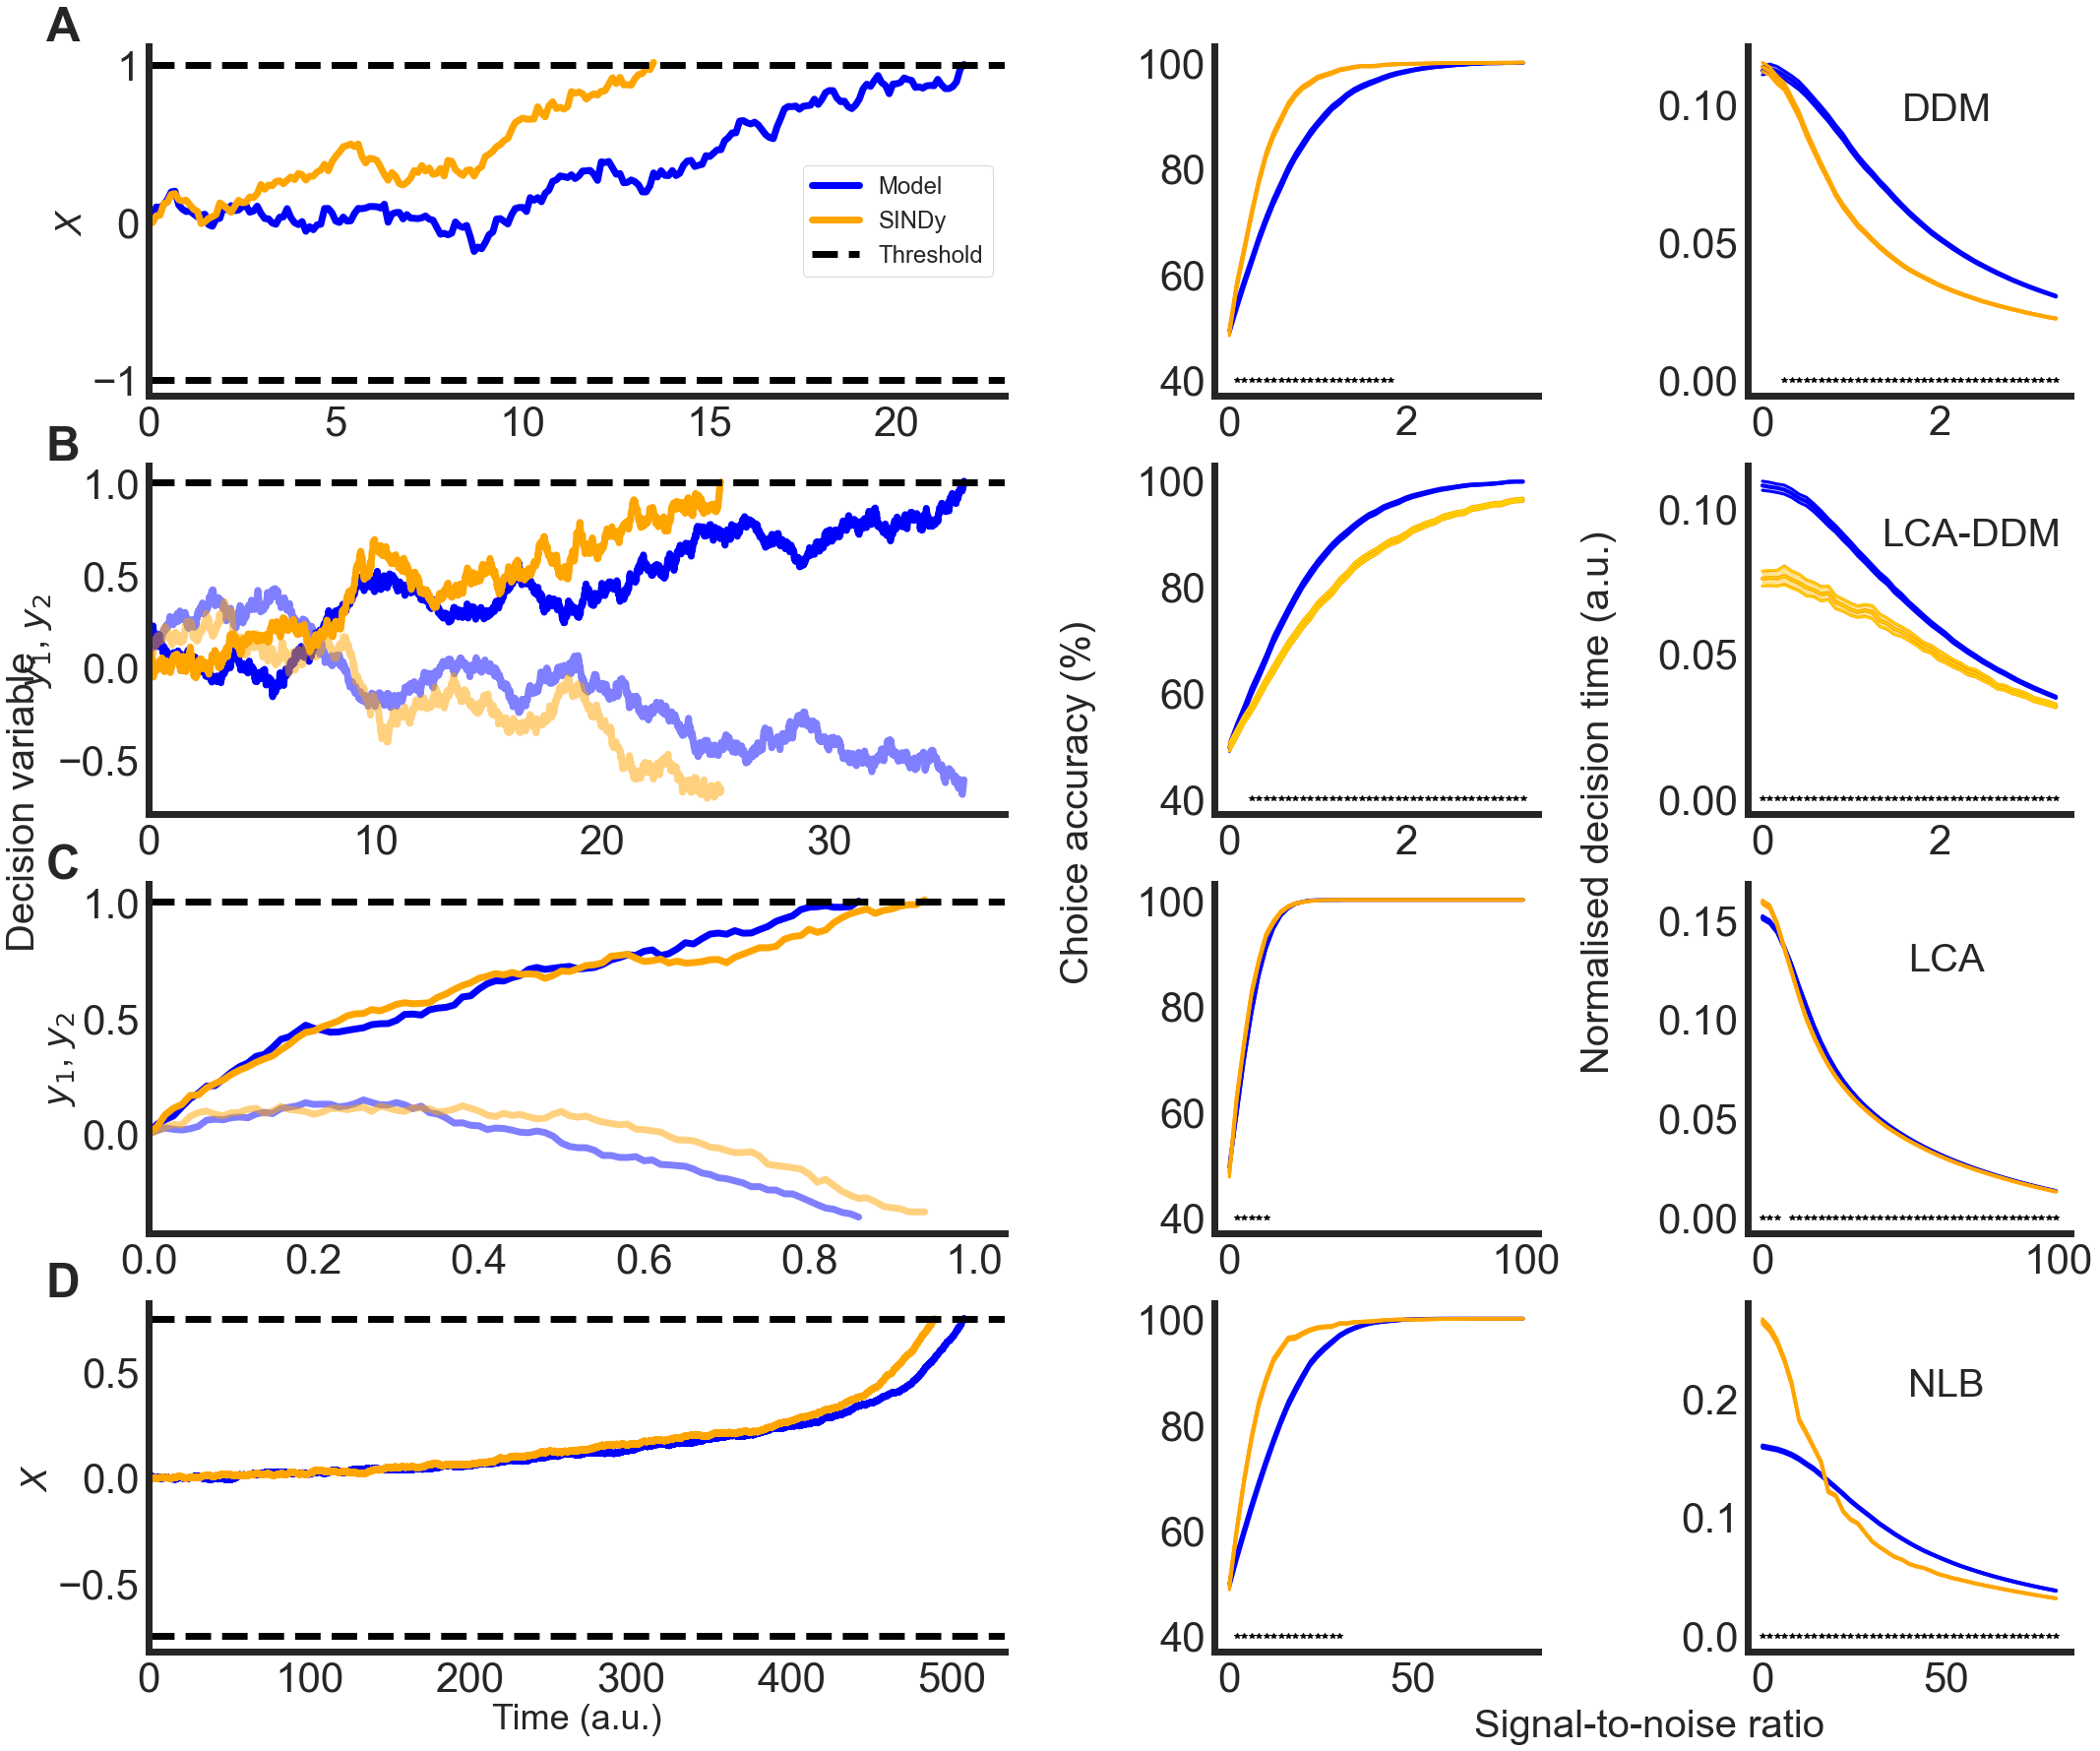

In [640]:
###fig 2 need to add NLB
# Assuming st_ddm and other necessary data are already defined
#ddm accuracy and rts


data_sets = [{'time':np.arange(0,10000,.1),'letter':'A','label':'DDM','model':st_ddm,'x': x_ddm,'acc': ddm_acc,'accsin': ddm_accsin,'time': ddm_time,'timesin': ddm_timesin,'sig_points_acc': sig_points_acc_ddm,'sig_points_time': sig_points_time_ddm,'effect_st_acc': effect_st_ddm,'effect_st_time': effect_st_ddm_t},
{'time':np.arange(0,10000,.01),'letter':'B','label':'LCA-DDM','model':st_lcaddm, 'x': x_lcaddm,'acc': lcaddm_acc,'accsin': lcaddm_accsin,'time': lcaddm_time,'timesin': lcaddm_timesin,'sig_points_acc': sig_points_acc_lcaddm,'sig_points_time': sig_points_time_lcaddm,'effect_st_acc': effect_st_lcaddm,'effect_st_time': effect_st_lcaddm_t,'acc_poly': lcaddm_poly_acc,'accsin_poly': lcaddm_poly_accsin,'time_poly': lcaddm_poly_time,'timesin_poly': lcaddm_poly_timesin,'sig_points_acc_poly': sig_points_acc_lcaddm_poly,'sig_points_time_poly': sig_points_time_lcaddm_poly,'effect_st_acc_poly': effect_st_lcaddm_poly,'effect_st_time_poly': effect_st_lcaddm_poly_t},
{'time':np.arange(0,10000,.01),'letter':'C','label':'LCA','model':st_lca, 'x': x_lca,'acc': lca_acc,'accsin': lca_accsin,'time': lca_time,'timesin': lca_timesin,'sig_points_acc': sig_points_acc_lca,'sig_points_time': sig_points_time_lca,'effect_st_acc': effect_st_lca,'effect_st_time': effect_st_lca_t},
{'time':np.arange(0,10000,.01),'letter':'D','label':'NLB','model':st_nlb, 'x': x_nlb,'acc': nlb_acc,'accsin': nlb_accsin,'time': nlb_time,'timesin': nlb_timesin,'sig_points_acc': sig_points_acc_nlb,'sig_points_time': sig_points_time_nlb,'effect_st_acc': effect_st_nlb,'effect_st_time': effect_st_nlb_t}
]

# Define your figure and gridspec
fig = plt.figure(figsize=(35, 30))  # Adjust the figure size as needed
gs = gridspec.GridSpec(4, 4, wspace=0.65)  # 4 rows, 4 columns, with column spans for the first plot in each row

# Assuming data_sets is defined as provided

for row, model_data in enumerate(data_sets ):  # Repeat data_sets twice since you have 4 rows and 2 models
    # Accessing data for the current model
    model_trials= model_data['model']
    x = model_data['x']
    acc = model_data['acc']
    accsin = model_data['accsin']
    time = model_data['time']
    timesin = model_data['timesin']
    sig_points_acc = model_data['sig_points_acc']
    effect_st_acc = model_data['effect_st_acc']
    sig_points_time = model_data['sig_points_time']
    effect_st_time = model_data['effect_st_time']
    label=model_data['label']
    letter=model_data['letter']
    if letter =="B":
        acc_poly = model_data['acc_poly']
        acc_polysin = model_data['accsin_poly']
        time_poly = model_data['time_poly']
        timesin_poly = model_data['timesin_poly']
        sig_points_acc_poly = model_data['sig_points_acc_poly']
        effect_st_acc_poly = model_data['effect_st_acc_poly']
        sig_points_time_poly = model_data['sig_points_time_poly']
        effect_st_time_poly = model_data['effect_st_time_poly']
    
    
    if len(model_trials[0][5][0])>2:
        
        if len(model_trials[0][5])>100:
            a_test=np.arange(0,10000,.1)
            # First plot: Trial Data Plot, taking double space
            ax0 = fig.add_subplot(gs[row, :2])  # Span first two columns
            ax0.plot(a_test[0:len(model_trials[40][5][125])],model_trials[40][5][125], color='blue', label="Model", linewidth=7)
            ax0.plot(a_test[0:len(model_trials[40][6][125])],model_trials[40][6][125], color='orange', label='SINDy', linewidth=7)
            ax0.axhline(y=1, linestyle='dashed', linewidth=7, color='black', label='Threshold')
            ax0.axhline(y=-1, linestyle='dashed', linewidth=7, color='black')
            ax0.set_xlim(0)
            ax0.set(ylabel="$X$")
            sns.despine()
            ax0.legend(loc='best', fontsize=24)
            ax0.spines['left'].set_linewidth(7)
            ax0.spines['bottom'].set_linewidth(7)
            ax0.set_title(letter, fontsize=48,fontweight='bold' )
            ax0.title.set_position([-.1, 1.05]) 
        else:
            a_test=np.arange(0,10000,.01)

            # First plot: Trial Data Plot, taking double space
            ax0 = fig.add_subplot(gs[row, :2])  # Span first two columns
            ax0.plot(a_test[0:len(model_trials[40][5][2])],model_trials[40][5][2], color='blue', label=label, linewidth=7)
            ax0.plot(a_test[0:len(model_trials[40][6][2])],model_trials[40][6][2], color='orange', label='SINDy', linewidth=7)
            ax0.axhline(y=.75, linestyle='dashed', linewidth=7, color='black', label='Threshold')
            ax0.axhline(y=-.75, linestyle='dashed', linewidth=7, color='black')
            #ax0.set_ylabel('Decision variable')
            ax0.set(ylabel="$X$")
            ax0.set_xlim(0)
            sns.despine()
#             ax0.legend(loc='best', fontsize=24)
            ax0.spines['left'].set_linewidth(7)
            ax0.spines['bottom'].set_linewidth(7)
            ax0.set_title(letter, fontsize=48,fontweight='bold' )
            ax0.title.set_position([-.1, 1.05]) 
    else:
        # First plot: Trial Data Plot, taking double space
        a_test=np.arange(0,10000,.01)
        ax0 = fig.add_subplot(gs[row, :2])  # Span first two columns
        ax0.plot(a_test[0:len(model_trials[40][5][0][0])],(model_trials[40][5][0][0]),color='blue', label=label,linewidth=7 )
        ax0.plot(a_test[0:len(model_trials[40][5][0][1])],(model_trials[40][5][0][1]),color='blue', alpha=.5,linewidth=7 )
        ax0.plot(a_test[0:len(model_trials[40][6][0][0])],(model_trials[40][6][0][0]),color='orange', label='SINDy',linewidth=7 )
        ax0.plot(a_test[0:len(model_trials[40][6][0][1])],(model_trials[40][6][0][1]),color='orange', alpha=.5,linewidth=7 )
        ax0.axhline(y=1, linestyle='dashed', linewidth=7, color='black',label='Threshold')
        ax0.axvline(x=-1, linestyle='dashed', linewidth=7, color='grey',label='Error')
        ax0.set(ylabel="$y_1$, $y_2$")
        ax0.set_xlim(0)
        sns.despine()
#         ax0.legend(loc='best', fontsize=24)
        ax0.spines['left'].set_linewidth(7)
        ax0.spines['bottom'].set_linewidth(7)
        ax0.set_title(letter, fontsize=48,fontweight='bold' )
        ax0.title.set_position([-.1, 1.05]) 
    
    # Second plot: Accuracy Plot
    ax1 = fig.add_subplot(gs[row, 2])
    # Plotting accuracy data
    ax1.plot(sig_points_acc, np.full(len(sig_points_acc), 40), '*', color='black')
    ax1.plot(x, acc[2], '', color='blue', label=label,linewidth=4 )
    ax1.plot(x, acc[0], color='blue',linewidth=3 )
    ax1.plot(x, acc[1], color='blue',linewidth=3 )
    ax1.fill_between(x, acc[0], acc[1], color='blue', alpha=0.25)
    ax1.plot(x, accsin[2], '', color='orange', label="SINDy Model",linewidth=4)
    ax1.plot(x, accsin[0], color='orange',linewidth=3)
    ax1.plot(x, accsin[1], color='orange',linewidth=3)
    ax1.fill_between(x, accsin[0], accsin[1], color='orange', alpha=0.25)
    if letter =='B':
        ax1.plot(x, acc_polysin[2], '', color='gold', label="SINDy Model")
        ax1.plot(x, acc_polysin[0], color='gold')
        ax1.plot(x, acc_polysin[1], color='gold')
        ax1.fill_between(x, acc_polysin[0], acc_polysin[1], color='gold', alpha=0.25)
        
    # Add cliff's d annotations for accuracy
#     for i, (x_val, d_value) in enumerate(zip(x, effect_st_acc)):
#         if sig_points_acc[i] is not None:
#             ax1.text(x_val, 45, f'd={d_value:.2f}', fontsize=4, ha='center', va='bottom', color='red')

    # Third plot: Response Time Plot
    ax2 = fig.add_subplot(gs[row, 3])
    # Plotting response time data
    ax2.plot(sig_points_time, np.full(len(sig_points_time), 0), '*', color='black')
    ax2.plot(x, time[2], '', color='blue', label="Model Response Time",linewidth=4)
    ax2.plot(x, time[0], color='blue',linewidth=3)
    ax2.plot(x, time[1], color='blue',linewidth=3)
    ax2.fill_between(x, time[0], time[1], color='blue', alpha=0.25)
    ax2.plot(x, timesin[2], '', color='orange', label="SINDy Response Time",linewidth=4)
    ax2.plot(x, timesin[0], color='orange',linewidth=3)
    ax2.plot(x, timesin[1], color='orange',linewidth=3)
    ax2.fill_between(x, timesin[0], timesin[1], color='orange', alpha=0.25)
    if letter =='B':
        ax2.plot(x, timesin_poly[2], '', color='gold', label="SINDy Response Time")
        ax2.plot(x, timesin_poly[0], color='gold')
        ax2.plot(x, timesin_poly[1], color='gold')
        ax2.fill_between(x, timesin_poly[0], timesin_poly[1], color='gold', alpha=0.25)
    # Add cliff's d annotations for response time
#     for i, (x_val, d_value) in enumerate(zip(x, effect_st_time)):
#         if sig_points_time[i] is not None:
#             ax2.text(x_val, 1, f'   d={d_value:.2f}  ', fontsize=4, ha='center', va='bottom', color='red')

    # Apply styles
    sns.despine(ax=ax1)
    sns.despine(ax=ax2)
    ax1.spines['left'].set_linewidth(7)
    ax1.spines['bottom'].set_linewidth(7)
    ax2.spines['left'].set_linewidth(7)
    ax2.spines['bottom'].set_linewidth(7)
    #ax1.legend(loc='best', fontsize=14)
    #ax2.legend(loc='best', fontsize=14)
    


    
ax0.set_xlabel('Time (a.u.)')
# ax1.supylabel('Choice accuracy (%)')
# ax2.supylabel('Normalised decision time')
fig.text(.85, .85, 'DDM', ha='center', va='center',zorder=50)
fig.text(.86, .65, 'LCA-DDM', ha='center', va='center',zorder=50)
fig.text(.85, .45, 'LCA', ha='center', va='center',zorder=50)
fig.text(.85, .25, 'NLB', ha='center', va='center',zorder=50)


fig.text(0.71, 0.525, 'Normalised decision time (a.u.)', ha='center', va='center', rotation='vertical',zorder=50)
fig.text(0.50, 0.525, 'Choice accuracy (%)', ha='center', va='center', rotation='vertical',zorder=50)
fig.text(.73, 0.09, 'Signal-to-noise ratio', ha='center', va='center',zorder=50)
fig.text(0.075, 0.525, 'Decision variable', ha='center', va='center',rotation='vertical',zorder=50)

# fig.supylabel('Decision variable')

plt.tight_layout()
#plt.savefig('fig_2_single_trial_02_05.pdf', dpi=600, bbox_inches='tight')

In [ ]:
#RMSE
rmse_data= [
    {'letter':'A','label':'DDM','snr': SnR_ddm,'rmse': rms_SnR_ddm,'rmse_nt': rms_SnR_ddm_nt},
    {'letter':'B','label':'LCA-DDM','snr': SnR_lcaddm,'rmse': rms_SnR_lcaddm,'rmse_nt': rms_SnR_lcaddm_nt},
    {'letter':'C','label':'LCA','snr': SnR_lca,'rmse': rms_SnR_lca,'rmse_nt': rms_SnR_lca_nt},
    {'letter':'D','label':'NLB','snr': SnR_nlb,'rmse': rms_SnR_nlb,'rmse_nt': rms_SnR_nt_nlb}]

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(17, 20))

# Iterate through all subplots to set titles (or any other static elements)
for i,ax in enumerate(axs):
    #ax.set_title(rmse_data[i]['label'])
    ax.set_title(rmse_data[i]['letter'], fontweight='bold' ,loc='left')
    ax.plot(rmse_data[i]['snr'],rmse_data[i]['rmse'],'o-',  linewidth=6, label="Low threshold")
    ax.plot(rmse_data[i]['snr'],rmse_data[i]['rmse_nt'],'o-',  linewidth=6, label="High threshold")
    #ax.set_xlabel('Signal-to-noise ratio')  # Assuming 'Time' is a common x-axis label
    #ax.set_ylabel('RMSE')  # Assuming 'Activity' is a common y-axis label
    sns.despine(ax=ax)
    ax.spines['left'].set_linewidth(7)
    ax.spines['bottom'].set_linewidth(7)
    ax.legend(loc="best")

fig.supylabel('RMSE')
fig.supxlabel('Signal-to-noise ratio',x=0.55)

plt.tight_layout()
#plt.show()
#plt.savefig("fig_rmse_29_03.svg", dpi=300, bbox_inches='tight')

In [ ]:
#fig Single trial choice behaviour

# fig = plt.figure(layout="constrained")
# fig.set_figwidth(20)
# fig.set_figheight(20)
# z_ddm_lca=1
# z_spb=0.75
# z=1
# subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1, 1.])

# x_ddm=SnR_ddm
# ddm_acc=confidenceInterval(st_ddm,1,10000)
# ddm_acc=[np.array(ddm_acc[i])*100 for i in range(len(ddm_acc))]
# ddm_accsin=confidenceInterval(st_ddm,2,10000)
# ddm_accsin=[np.array(ddm_accsin[i])*100 for i in range(len(ddm_accsin))]
# c_ddm_acc,p_ddm_acc,sig_points_acc_ddm=statistical_analysis(st_ddm,1,2,x_ddm)
# ddm_time=confidenceInterval(st_ddm,4,10000)
# ddm_sin_time=confidenceInterval(st_ddm,5,10000)
# # c_ddm,p_ddm,sig_points=statistical_analysis(st_ddm,4,5,x_ddm)
# c_ddm_time,p_ddm_time,sig_points_time_ddm=statistical_analysis(st_ddm,4,5,x_ddm)

# x_lcaddm=SnR_lcaddm
# lcaddm_acc=confidenceInterval(st_lcaddm,1,10000)
# lcaddm_acc=[np.array(lcaddm_acc[i])*100 for i in range(len(lcaddm_acc))]
# lcaddm_accsin=confidenceInterval(st_lcaddm,2,10000)
# lcaddm_accsin=[np.array(lcaddm_accsin[i])*100 for i in range(len(lcaddm_accsin))]
# c_lcaddm_acc,p_lcaddm_acc,sig_points_acc_lcaddm=statistical_analysis(st_lcaddm,1,2,x_lcaddm)
# lcaddm_time=confidenceInterval(st_lcaddm,4,10000)
# lcaddm_sin_time=confidenceInterval(st_lcaddm,5,10000)
# # c_lcaddm,p_lcaddm,sig_points=statistical_analysis(st_lcaddm,4,5,x_lcaddm)
# c_lcaddm_time,p_lcaddm_time,sig_points_time_lcaddm=statistical_analysis(st_lcaddm,4,5,x_lcaddm)

# x_lca=SnR_lca
# lca_acc=confidenceInterval(st_lca,1,10000)
# lca_acc=[np.array(lca_acc[i])*100 for i in range(len(lca_acc))]
# lca_accsin=confidenceInterval(st_lca,2,10000)
# lca_accsin=[np.array(lca_accsin[i])*100 for i in range(len(lca_accsin))]
# c_lca_acc,p_lca_acc,sig_points_acc_lca=statistical_analysis(st_lca,1,2,x_lca)
# lca_time=confidenceInterval(st_lca,4,10000)
# lca_sin_time=confidenceInterval(st_lca,5,10000)
# # c_lca,p_lca,sig_points=statistical_analysis(st_lca,4,5,x_lca)
# c_lca_time,p_lca_time,sig_points_time_lca=statistical_analysis(st_lca,4,5,x_lca)

# x_nlb=SnR_nlb
# nlb_acc=confidenceInterval(st_nlb,1,10000)
# nlb_acc=[np.array(nlb_acc[i])*100 for i in range(len(nlb_acc))]
# nlb_accsin=confidenceInterval(st_nlb,2,10000)
# nlb_accsin=[np.array(nlb_accsin[i])*100 for i in range(len(nlb_accsin))]
# c_nlb_acc,p_nlb_acc,sig_points_acc_nlb=statistical_analysis(st_nlb,1,2,x_nlb)
# nlb_time=confidenceInterval(st_nlb,4,10000)
# nlb_sin_time=confidenceInterval(st_nlb,5,10000)
# # c_nlb,p_nlb,sig_points=statistical_analysis(st_nlb,4,5,x_nlb)
# c_nlb_time,p_nlb_time,sig_points_time_nlb=statistical_analysis(st_nlb,4,5,x_nlb)

# axs0 = subfigs[0].subplots(4, 1)
# axs0[0].plot(sig_points_acc_ddm, np.zeros(len(sig_points_acc_ddm)), '*',color='black')
# axs0[0].plot(x_ddm,ddm_acc[2],'o-',color='blue',label="Model")
# axs0[0].plot(x_ddm,ddm_acc[0],color='cyan')
# axs0[0].plot(x_ddm,ddm_acc[1],color='cyan')
# axs0[0].fill_between(x_ddm, ddm_acc[0], ddm_acc[1],  facecolor='cyan', interpolate=True,alpha=0.25)
# axs0[0].plot(x_ddm,ddm_accsin[2],'o-',color='orange',label="SINDy")
# axs0[0].plot(x_ddm,ddm_accsin[0],color='gold')
# axs0[0].plot(x_ddm,ddm_accsin[1],color='gold')
# axs0[0].fill_between(x_ddm, ddm_accsin[0], ddm_accsin[1],  facecolor='gold', interpolate=True,alpha=0.25)
# axs0[0].spines['right'].set_visible(False)
# axs0[0].spines['top'].set_visible(False)
# axs0[0].legend(loc="upper left", prop={'size': 16})

# axs0[1].plot(sig_points_acc_lcaddm, np.zeros(len(sig_points_acc_lcaddm)), '*',color='black')
# axs0[1].plot(x_lcaddm,lcaddm_acc[2],'o-',color='blue',label="LCA-DDM")
# axs0[1].plot(x_lcaddm,lcaddm_acc[0],color='cyan')
# axs0[1].plot(x_lcaddm,lcaddm_acc[1],color='cyan')
# axs0[1].fill_between(x_lcaddm, lcaddm_acc[0], lcaddm_acc[1],  facecolor='cyan', interpolate=True,alpha=0.25)
# axs0[1].plot(x_lcaddm,lcaddm_accsin[2],'o-',color='orange',label="SINDy")
# axs0[1].plot(x_lcaddm,lcaddm_accsin[0],color='gold')
# axs0[1].plot(x_lcaddm,lcaddm_accsin[1],color='gold')
# axs0[1].fill_between(x_lcaddm, lcaddm_accsin[0], lcaddm_accsin[1],  facecolor='gold', interpolate=True,alpha=0.25)
# axs0[1].spines['right'].set_visible(False)
# axs0[1].spines['top'].set_visible(False)
# #axs0[1].legend(loc="upper left", prop={'size': 16})

# axs0[2].plot(sig_points_acc_lca, np.zeros(len(sig_points_acc_lca)), '*',color='black')
# axs0[2].plot(x_lca,lca_acc[2],'o-',color='blue',label="LCA")
# axs0[2].plot(x_lca,lca_acc[0],color='cyan')
# axs0[2].plot(x_lca,lca_acc[1],color='cyan')
# axs0[2].fill_between(x_lca, lca_acc[0], lca_acc[1],  facecolor='cyan', interpolate=True,alpha=0.25)
# axs0[2].plot(x_lca,lca_accsin[2],'o-',color='orange',label="SINDy")
# axs0[2].plot(x_lca,lca_accsin[0],color='gold')
# axs0[2].plot(x_lca,lca_accsin[1],color='gold')
# axs0[2].fill_between(x_lca, lca_accsin[0], lca_accsin[1],  facecolor='gold', interpolate=True,alpha=0.25)
# axs0[2].spines['right'].set_visible(False)
# axs0[2].spines['top'].set_visible(False)
# #axs0[2].legend(loc="upper left", prop={'size': 16})

# axs0[3].plot(sig_points_acc_nlb, np.zeros(len(sig_points_acc_nlb)), '*',color='black')
# axs0[3].plot(x_nlb,nlb_acc[2],'o-',color='blue',label="NLB")
# axs0[3].plot(x_nlb,nlb_acc[0],color='cyan')
# axs0[3].plot(x_nlb,nlb_acc[1],color='cyan')
# axs0[3].fill_between(x_nlb, nlb_acc[0], nlb_acc[1],  facecolor='cyan', interpolate=True,alpha=0.25)
# axs0[3].plot(x_nlb,nlb_accsin[2],'o-',color='orange',label="SINDy")
# axs0[3].plot(x_nlb,nlb_accsin[0],color='gold')
# axs0[3].plot(x_nlb,nlb_accsin[1],color='gold')
# axs0[3].fill_between(x_nlb, nlb_accsin[0], nlb_accsin[1],  facecolor='gold', interpolate=True,alpha=0.25)
# axs0[3].spines['right'].set_visible(False)
# axs0[3].spines['top'].set_visible(False)
# axs0[0].set_title('A', fontweight='bold' ,loc='left')
# axs0[1].set_title('B', fontweight='bold' ,loc='left')
# axs0[2].set_title('C', fontweight='bold' ,loc='left')
# axs0[3].set_title('D', fontweight='bold' ,loc='left')
# subfigs[0].supylabel('Choice accuracy (%)')
# #subfigs[0].supxlabel('Signal-to-Noise Ratio')
# #axs0[3].legend(loc="upper left", prop={'size': 16})

# axs1 = subfigs[1].subplots(4, 1)
# # axs1[0].plot(x_ddm,y_time_ddm,'o-',color='blue',label="DDM " , linewidth=5)
# # axs1[0].plot(x_ddm,y_timesin_ddm,'o-',color='orange',label="SINDy " , linewidth=5)
# # for x_val in significant_points_ddm:
# #     axs1[0].annotate('*', (x_val, 0),textcoords='offset points', xytext=(0, 5), ha='center',  fontsize=30)
# axs1[0].plot(sig_points_time_ddm, np.zeros(len(sig_points_time_ddm)), '*',color='black')
# axs1[0].plot(x_ddm,ddm_time[2],'o-',color='blue')
# axs1[0].plot(x_ddm,ddm_time[0],color='cyan')
# axs1[0].plot(x_ddm,ddm_time[1],color='cyan')
# axs1[0].fill_between(x_ddm, ddm_time[0], ddm_time[1],  facecolor='cyan', interpolate=True,alpha=0.25)
# axs1[0].plot(x_ddm,ddm_sin_time[2],'o-',color='orange')
# axs1[0].plot(x_ddm,ddm_sin_time[0],color='gold')
# axs1[0].plot(x_ddm,ddm_sin_time[1],color='gold')
# axs1[0].fill_between(x_ddm, ddm_sin_time[0], ddm_sin_time[1],  facecolor='gold', interpolate=True,alpha=0.25)
# axs1[0].spines['right'].set_visible(False)
# axs1[0].spines['top'].set_visible(False)
# # Annotate significant points with asterisks

# axs1[1].plot(sig_points_time_lcaddm, np.zeros(len(sig_points_time_lcaddm)), '*',color='black')
# axs1[1].plot(x_lcaddm,lcaddm_time[2],'o-',color='blue')
# axs1[1].plot(x_lcaddm,lcaddm_time[0],color='cyan')
# axs1[1].plot(x_lcaddm,lcaddm_time[1],color='cyan')
# axs1[1].fill_between(x_lcaddm, lcaddm_time[0], lcaddm_time[1],  facecolor='cyan', interpolate=True,alpha=0.25)
# axs1[1].plot(x_lcaddm,lcaddm_sin_time[2],'o-',color='orange')
# axs1[1].plot(x_lcaddm,lcaddm_sin_time[0],color='gold')
# axs1[1].plot(x_lcaddm,lcaddm_sin_time[1],color='gold')
# axs1[1].fill_between(x_lcaddm, lcaddm_sin_time[0], lcaddm_sin_time[1],  facecolor='gold', interpolate=True,alpha=0.25)
# axs1[1].spines['right'].set_visible(False)
# axs1[1].spines['top'].set_visible(False)

# axs1[2].plot(sig_points_time_lca, np.zeros(len(sig_points_time_lca)), '*',color='black')
# axs1[2].plot(x_lca,lca_time[2],'o-',color='blue')
# axs1[2].plot(x_lca,lca_time[0],color='cyan')
# axs1[2].plot(x_lca,lca_time[1],color='cyan')
# axs1[2].fill_between(x_lca, lca_time[0], lca_time[1],  facecolor='cyan', interpolate=True,alpha=0.25)
# axs1[2].plot(x_lca,lca_sin_time[2],'o-',color='orange')
# axs1[2].plot(x_lca,lca_sin_time[0],color='gold')
# axs1[2].plot(x_lca,lca_sin_time[1],color='gold')
# axs1[2].fill_between(x_lca, lca_sin_time[0], lca_sin_time[1],  facecolor='gold', interpolate=True,alpha=0.25)
# axs1[2].spines['right'].set_visible(False)
# axs1[2].spines['top'].set_visible(False)

# axs1[3].plot(sig_points_time_nlb, np.zeros(len(sig_points_time_nlb)), '*',color='black')
# axs1[3].plot(x_nlb,nlb_time[2],'o-',color='blue')
# axs1[3].plot(x_nlb,nlb_time[0],color='cyan')
# axs1[3].plot(x_nlb,nlb_time[1],color='cyan')
# axs1[3].fill_between(x_nlb, nlb_time[0], nlb_time[1],  facecolor='cyan', interpolate=True,alpha=0.25)
# axs1[3].plot(x_nlb,nlb_sin_time[2],'o-',color='orange')
# axs1[3].plot(x_nlb,nlb_sin_time[0],color='gold')
# axs1[3].plot(x_nlb,nlb_sin_time[1],color='gold')
# axs1[3].fill_between(x_nlb, nlb_sin_time[0], nlb_sin_time[1],  facecolor='gold', interpolate=True,alpha=0.25)
# axs1[3].spines['right'].set_visible(False)
# axs1[3].spines['top'].set_visible(False)
# subfigs[1].supylabel('Decision time (a.u.) ')
# #subfigs[1].supxlabel('Signal-to-Noise Ratio')

# fig.supxlabel('Signal-to-noise ratio')

# sns.set_style('white') # darkgrid, white grid, dark, white and ticks
# plt.rc('axes', titlesize=36)     # fontsize of the axes title
# plt.rc('axes', labelsize=36)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=24)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=24)    # fontsize of the tick labels
# plt.rc('legend', fontsize=16)    # legend fontsize
# plt.rc('font', size=36)          # controls default text sizes


#plt.savefig("fig_Single_trial_choice_behaviour_05_10_abs.svg", dpi=300)

# Trial Average - Poly

In [ ]:
#ddm ave poly 1
file_name = "Data_SINDy/DDM/POLY/multiprocessing_ddm_kelvin_ave_poly_sept.pkl"
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()
average_ddm_poly=loaded_list

In [ ]:
#ddm ave poly 2
file_name = "Data_SINDy/DDM/POLY/multiprocessing_ddm_kelvin_ave_poly2.pkl"
open_file = open(file_name, "rb")
loaded_list_1 = pickle.load(open_file)
open_file.close()
average_ddm_poly2=loaded_list_1

In [ ]:
#lcaddm ave poly 1
file_name = "Data_SINDy/LCA-DDM/POLY/multiprocessing_lca-ddm_ave_poly_sept.pkl"
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()
average_lcaddm_poly=loaded_list

In [ ]:
#lcaddm ave poly 2
file_name = "Data_SINDy/LCA-DDM/POLY/multiprocessing_lca-ddm_ave_poly2_sept.pkl"
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()
average_lcaddm_poly2=loaded_list

In [ ]:
#lca ave poly 1
file_name = "Data_SINDy/LCA/POLY/multiprocessing_lca_ave_kelvin_poly_sept.pkl"
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()
average_lca_poly=loaded_list

In [ ]:
#lca ave poly 2
file_name = "Data_SINDy/LCA/POLY/multiprocessing_lca_ave_kelvin_poly2_sept.pkl"
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()
average_lca_poly2=loaded_list

# Trial average

In [ ]:
def calculate_noise_std_for_different_segment_lengths(data, max_length):
    """
    Calculates the standard deviation of the initial segments of varying lengths.
    
    If the data elements have less than three items, it sums the first two items across all elements before calculation.
    Otherwise, it directly calculates the noise standard deviation for segments of increasing lengths.
    
    Parameters:
    - data: A list of lists or numpy arrays representing the data.
    - max_length: The maximum segment length for which to calculate the noise standard deviation.
    
    Returns:
    - A list containing the average noise standard deviation for segments of lengths 1 to max_length.
    """
    
    # Check if data elements are short and need summing of first two elements
    if len(data[0]) < 3:
        # Sum the first two items for each element in data
        data = [item[0] + item[1] for item in data]
    
    # Initialize an empty list to hold the average noise std for each segment length
    noise_std_by_segment_length = []
    
    # Loop over segment lengths from 1 to max_length
    for length in range(1, max_length + 1):
        # Calculate std for each segment up to the current length, then take the average
        noise_stds = [np.std(segment[:length]) for segment in data]
        noise_std_by_segment_length.append(np.mean(noise_stds))
    #segment_array=np.arange(1, max_length + 1)

    return noise_std_by_segment_length
# Choose an example dataset and column similar to your usage
example_dataset = st_ddm[0][6]  # Assuming this is the correct data structure path

# Calculate noise standard deviation for initial segments of different lengths
max_segment_length = 1000  # Adjust based on your needs
noise_std_by_length = calculate_noise_std_for_different_segment_lengths(example_dataset, max_segment_length)
segment_array=np.arange(1, max_segment_length + 1)

In [ ]:
# Plotting the relationship between segment length and noise standard deviation
plt.figure(figsize=(10, 6))
plt.plot(segment_array, noise_std_by_length, marker='o', linestyle='-')
# plt.title('Noise Standard Deviation by Segment Length')
plt.xlabel('Segment Length (Number of Data Points)',fontsize=20)
plt.ylabel('Average Noise Standard Deviation',fontsize=20)
#plt.axhline(y=.11, linestyle='dotted', linewidth=5, color='black', label='Threshold')

# Your target y-value and tolerance
target_y = .11
tolerance = 0.001

# Find x-values where y_data is within the tolerance of target_y
close_indices = np.where(np.abs(np.array(noise_std_by_length) - target_y) <= tolerance)
corresponding_x = segment_array[close_indices]
print("Corresponding x-value(s) within tolerance:", corresponding_x)

# plt.axhline(y=.01, linestyle='dotted', linewidth=5, color='black', label='Threshold')
#plt.axvline(x=195, linestyle='dotted', linewidth=5, color='black', label='Threshold')
# plt.xlim(0,1000)
# plt.grid(True)


In [626]:
# /graph var fig3
sns.set_style('white') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=36)     # fontsize of the axes title
plt.rc('axes', labelsize=48)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=40)    # fontsize of the tick labels
plt.rc('ytick', labelsize=40)    # fontsize of the tick labels
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('font', size=48)          # controls default text sizes

In [558]:
###fig 3 data
# Assuming ave_ddm and other necessary data are already defined
#ddm accuracy and rts
x_ddm=SnR_ddm
ddm_acc=confidenceInterval(ave_ddm,1,10000)
ddm_acc=[np.array(ddm_acc[i])*100 for i in range(len(ddm_acc))]
ddm_accsin=confidenceInterval(ave_ddm,2,10000)
ddm_accsin=[np.array(ddm_accsin[i])*100 for i in range(len(ddm_accsin))]
c_ddm_acc,p_ddm_acc,sig_points_acc_ddm,effect_ave_ddm=ks_statistical_analysis(ave_ddm,1,2,x_ddm)

x_ddm=SnR_ddm
ddm_time=confidenceInterval(ave_ddm,3,10000)
ddm_time=[np.array(ddm_time[i]) for i in range(len(ddm_time))]
ddm_timesin=confidenceInterval(ave_ddm,4,10000)
ddm_timesin=[np.array(ddm_timesin[i]) for i in range(len(ddm_timesin))]
c_ddm_time,p_ddm_time,sig_points_time_ddm,effect_ave_ddm_t=ks_statistical_analysis(ave_ddm,3,4,x_ddm)

x_lcaddm=SnR_lcaddm
lcaddm_acc=confidenceInterval(ave_lcaddm,1,10000)
lcaddm_acc=[np.array(lcaddm_acc[i])*100 for i in range(len(lcaddm_acc))]
lcaddm_accsin=confidenceInterval(ave_lcaddm,2,10000)
lcaddm_accsin=[np.array(lcaddm_accsin[i])*100 for i in range(len(lcaddm_accsin))]
c_lcaddm_acc,p_lcaddm_acc,sig_points_acc_lcaddm,effect_ave_lcaddm=ks_statistical_analysis(ave_lcaddm,1,2,x_lcaddm)

x_lcaddm=SnR_lcaddm
lcaddm_time=confidenceInterval(ave_lcaddm,3,10000)
lcaddm_time=[np.array(lcaddm_time[i]) for i in range(len(lcaddm_time))]
lcaddm_timesin=confidenceInterval(ave_lcaddm,4,10000)
lcaddm_timesin=[np.array(lcaddm_timesin[i]) for i in range(len(lcaddm_timesin))]
c_lcaddm_time,p_lcaddm_time,sig_points_time_lcaddm,effect_ave_lcaddm_t=ks_statistical_analysis(ave_lcaddm,3,4,x_lcaddm)

x_lca=SnR_lca
lca_acc=confidenceInterval(ave_lca,1,10000)
lca_acc=[np.array(lca_acc[i])*100 for i in range(len(lca_acc))]
lca_accsin=confidenceInterval(ave_lca,2,10000)
lca_accsin=[np.array(lca_accsin[i])*100 for i in range(len(lca_accsin))]
c_lca_acc,p_lca_acc,sig_points_acc_lca,effect_ave_lca=ks_statistical_analysis(ave_lca,1,2,x_lca)

x_lca=SnR_lca
lca_time=confidenceInterval(ave_lca,3,10000)
lca_time=[np.array(lca_time[i]) for i in range(len(lca_time))]
lca_timesin=confidenceInterval(ave_lca,4,10000)
lca_timesin=[np.array(lca_timesin[i]) for i in range(len(lca_timesin))]
c_lca_time,p_lca_time,sig_points_time_lca,effect_ave_lca_t=ks_statistical_analysis(ave_lca,3,4,x_lca)

# ddm_acc_poly=confidenceInterval(average_ddm_poly,2,10000)
# ddm_acc_poly=[np.array(ddm_acc_poly[i])*100 for i in range(len(ddm_acc_poly))]
# ddm_accsin_poly=confidenceInterval(average_ddm_poly,3,10000)
# ddm_accsin_poly=[np.array(ddm_accsin_poly[i])*100 for i in range(len(ddm_accsin_poly))]
# c_ddm_acc_poly,p_ddm_acc_poly,sig_points_acc_ddm_poly,effect_ave_ddm_poly=ks_statistical_analysis(average_ddm_poly,2,3,x_ddm)
# ddm_time_poly=confidenceInterval(average_ddm_poly,4,10000)
# ddm_time_poly=[np.array(ddm_time_poly[i]) for i in range(len(ddm_time_poly))]
# ddm_timesin_poly=confidenceInterval(average_ddm_poly,5,10000)
# ddm_timesin_poly=[np.array(ddm_timesin_poly[i]) for i in range(len(ddm_timesin_poly))]
# c_ddm_time_poly,p_ddm_time_poly,sig_points_time_ddm_poly,effect_ave_ddm_t_poly=ks_statistical_analysis(average_ddm_poly,4,5,x_ddm)

# ddm_acc_poly2=confidenceInterval(average_ddm_poly2,2,10000)
# ddm_acc_poly2=[np.array(ddm_acc_poly2[i])*100 for i in range(len(ddm_acc_poly2))]
# ddm_accsin_poly2=confidenceInterval(average_ddm_poly2,3,10000)
# ddm_accsin_poly2=[np.array(ddm_accsin_poly2[i])*100 for i in range(len(ddm_accsin_poly2))]
# c_ddm_acc_poly2,p_ddm_acc_poly2,sig_points_acc_ddm_poly2,effect_ave_ddm_poly2=ks_statistical_analysis(average_ddm_poly2,2,3,x_ddm)
# ddm_time_poly2=confidenceInterval(average_ddm_poly2,4,10000)
# ddm_time_poly2=[np.array(ddm_time_poly2[i]) for i in range(len(ddm_time_poly2))]
# ddm_timesin_poly2=confidenceInterval(average_ddm_poly2,5,10000)
# ddm_timesin_poly2=[np.array(ddm_timesin_poly2[i]) for i in range(len(ddm_timesin_poly2))]
# c_ddm_time_poly2,p_ddm_time_poly2,sig_points_time_ddm_poly2,effect_ave_ddm_t_poly2=ks_statistical_analysis(average_ddm_poly2,4,5,x_ddm)


# lcaddm_acc_poly=confidenceInterval(average_lcaddm_poly,2,10000)
# lcaddm_acc_poly=[np.array(lcaddm_acc_poly[i])*100 for i in range(len(lcaddm_acc_poly))]
# lcaddm_accsin_poly=confidenceInterval(average_lcaddm_poly,3,10000)
# lcaddm_accsin_poly=[np.array(lcaddm_accsin_poly[i])*100 for i in range(len(lcaddm_accsin_poly))]
# c_lcaddm_acc_poly,p_lcaddm_acc_poly,sig_points_acc_lcaddm_poly,effect_ave_lcaddm_poly=ks_statistical_analysis(average_lcaddm_poly,2,3,x_lcaddm)
# lcaddm_time_poly=confidenceInterval(average_lcaddm_poly,4,10000)
# lcaddm_time_poly=[np.array(lcaddm_time_poly[i]) for i in range(len(lcaddm_time_poly))]
# lcaddm_timesin_poly=confidenceInterval(average_lcaddm_poly,5,10000)
# lcaddm_timesin_poly=[np.array(lcaddm_timesin_poly[i]) for i in range(len(lcaddm_timesin_poly))]
# c_lcaddm_time_poly,p_lcaddm_time_poly,sig_points_time_lcaddm_poly,effect_ave_lcaddm_t_poly=ks_statistical_analysis(average_lcaddm_poly,4,5,x_lcaddm)

# lcaddm_acc_poly2=confidenceInterval(average_lcaddm_poly2,2,10000)
# lcaddm_acc_poly2=[np.array(lcaddm_acc_poly2[i])*100 for i in range(len(lcaddm_acc_poly2))]
# lcaddm_accsin_poly2=confidenceInterval(average_lcaddm_poly2,3,10000)
# lcaddm_accsin_poly2=[np.array(lcaddm_accsin_poly2[i])*100 for i in range(len(lcaddm_accsin_poly2))]
# c_lcaddm_acc_poly2,p_lcaddm_acc_poly2,sig_points_acc_lcaddm_poly2,effect_ave_lcaddm_poly2=ks_statistical_analysis(average_lcaddm_poly2,2,3,x_lcaddm)
# lcaddm_time_poly2=confidenceInterval(average_lcaddm_poly2,4,10000)
# lcaddm_time_poly2=[np.array(lcaddm_time_poly2[i]) for i in range(len(lcaddm_time_poly2))]
# lcaddm_timesin_poly2=confidenceInterval(average_lcaddm_poly2,5,10000)
# lcaddm_timesin_poly2=[np.array(lcaddm_timesin_poly2[i]) for i in range(len(lcaddm_timesin_poly2))]
# c_lcaddm_time_poly2,p_lcaddm_time_poly2,sig_points_time_lcaddm_poly2,effect_ave_lcaddm_t_poly2=ks_statistical_analysis(average_lcaddm_poly2,4,5,x_lcaddm)

# lca_acc_poly=confidenceInterval(average_lca_poly,2,10000)
# lca_acc_poly=[np.array(lca_acc_poly[i])*100 for i in range(len(lca_acc_poly))]
# lca_accsin_poly=confidenceInterval(average_lca_poly,3,10000)
# lca_accsin_poly=[np.array(lca_accsin_poly[i])*100 for i in range(len(lca_accsin_poly))]
# c_lca_acc_poly,p_lca_acc_poly,sig_points_acc_lca_poly,effect_ave_lca_poly=ks_statistical_analysis(average_lca_poly,2,3,x_lca)
# lca_time_poly=confidenceInterval(average_lca_poly,5,10000)
# lca_time_poly=[np.array(lca_time_poly[i]) for i in range(len(lca_time_poly))]
# lca_timesin_poly=confidenceInterval(average_lca_poly,6,10000)
# lca_timesin_poly=[np.array(lca_timesin_poly[i]) for i in range(len(lca_timesin_poly))]
# c_lca_time_poly,p_lca_time_poly,sig_points_time_lca_poly,effect_ave_lca_t_poly=ks_statistical_analysis(average_lca_poly,5,6,x_lca)

# lca_acc_poly2=confidenceInterval(average_lca_poly2,2,10000)
# lca_acc_poly2=[np.array(lca_acc_poly2[i])*100 for i in range(len(lca_acc_poly2))]
# lca_accsin_poly2=confidenceInterval(average_lca_poly2,3,10000)
# lca_accsin_poly2=[np.array(lca_accsin_poly2[i])*100 for i in range(len(lca_accsin_poly2))]
# c_lca_acc_poly2,p_lca_acc_poly2,sig_points_acc_lca_poly2,effect_ave_lca_poly2=ks_statistical_analysis(average_lca_poly2,2,3,x_lca)
# lca_time_poly2=confidenceInterval(average_lca_poly2,5,10000)
# lca_time_poly2=[np.array(lca_time_poly2[i])for i in range(len(lca_time_poly2))]
# lca_timesin_poly2=confidenceInterval(average_lca_poly2,6,10000)
# lca_timesin_poly2=[np.array(lca_timesin_poly2[i]) for i in range(len(lca_timesin_poly2))]
# c_lca_time_poly2,p_lca_time_poly2,sig_points_time_lca_poly2,effect_ave_lca_t_poly2=ks_statistical_analysis(average_lca_poly2,5,6,x_lca)

x_nlb=SnR_nlb
nlb_acc=confidenceInterval(ave_nlb,1,10000)
nlb_acc=[np.array(nlb_acc[i])*100 for i in range(len(nlb_acc))]
nlb_accsin=confidenceInterval(ave_nlb,2,10000)
nlb_accsin=[np.array(nlb_accsin[i])*100 for i in range(len(nlb_accsin))]
c_nlb_acc,p_nlb_acc,sig_points_acc_nlb,effect_ave_nlb=ks_statistical_analysis(ave_nlb,1,2,x_nlb)

x_nlb=SnR_nlb
nlb_time=confidenceInterval(ave_nlb,3,10000)
nlb_time=[np.array(nlb_time[i]) for i in range(len(nlb_time))]
nlb_timesin=confidenceInterval(ave_nlb,4,10000)
nlb_timesin=[np.array(nlb_timesin[i]) for i in range(len(nlb_timesin))]
c_nlb_time,p_nlb_time,sig_points_time_nlb,effect_ave_nlb_t=ks_statistical_analysis(ave_nlb,3,4,x_nlb)

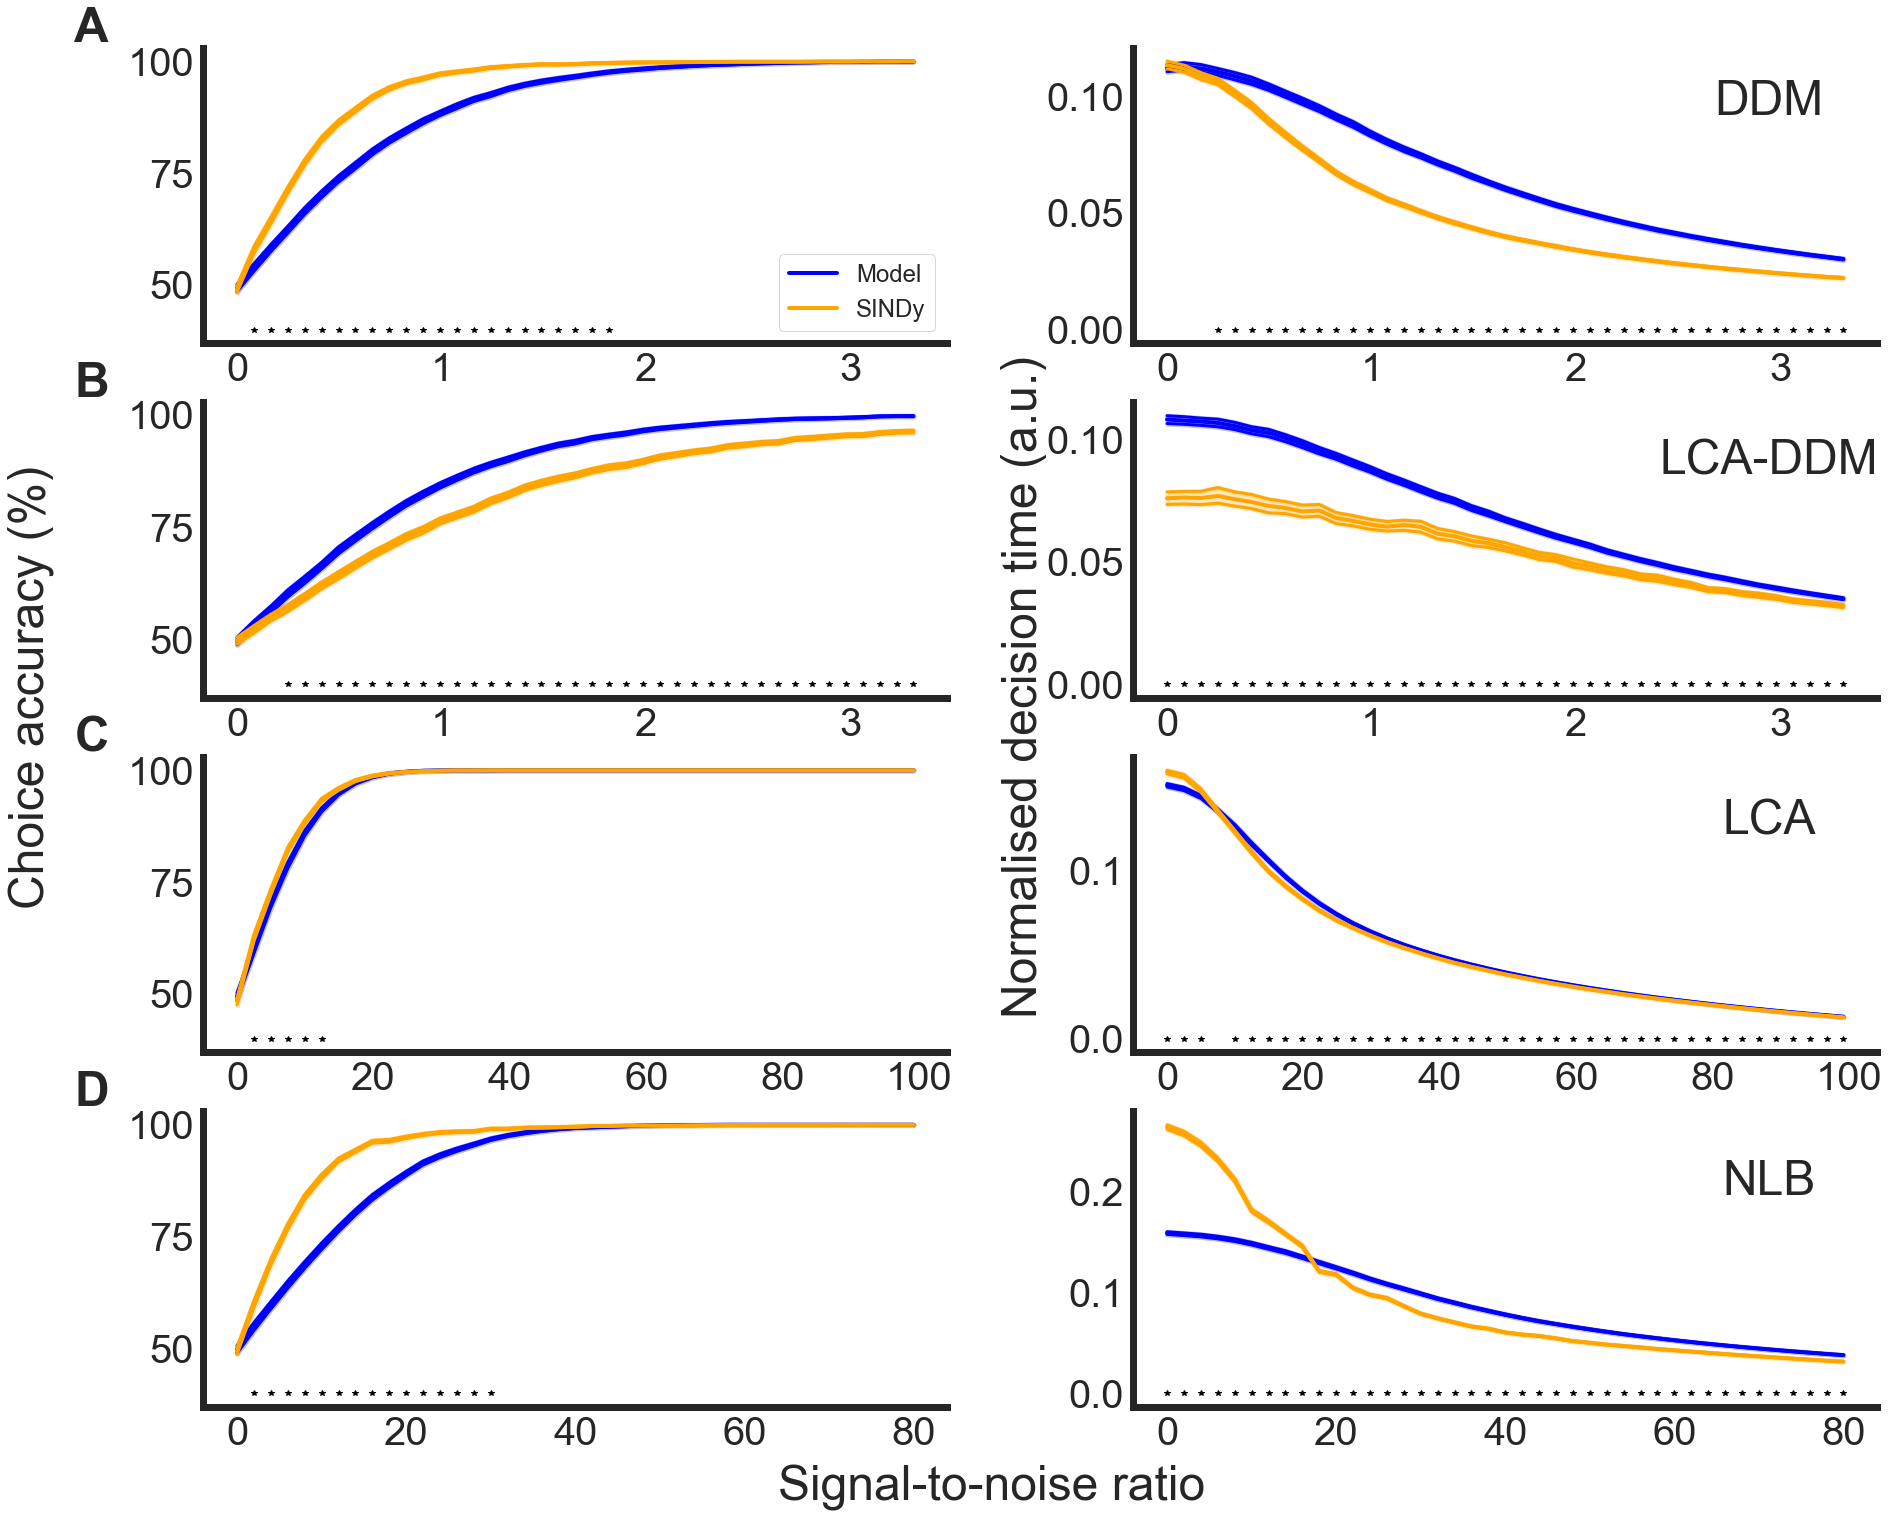

In [629]:
#fig 3#
data_sets = [
{'label':'DDM','x': x_ddm,'acc': ddm_acc,'accsin': ddm_accsin,'time': ddm_time,'timesin': ddm_timesin,'sig_points_acc': sig_points_acc_ddm,'sig_points_time': sig_points_time_ddm,'effect_ave_acc': effect_ave_ddm,'effect_ave_time': effect_ave_ddm_t},
{'label':'LCA-DDM', 'x': x_lcaddm,'acc': lcaddm_acc,'accsin': lcaddm_accsin,'time': lcaddm_time,'timesin': lcaddm_timesin,'sig_points_acc': sig_points_acc_lcaddm,'sig_points_time': sig_points_time_lcaddm,'effect_ave_acc': effect_ave_lcaddm,'effect_ave_time': effect_ave_lcaddm_t},
{'label':'LCA', 'x': x_lca,'acc': lca_acc,'accsin': lca_accsin,'time': lca_time,'timesin': lca_timesin,'sig_points_acc': sig_points_acc_lca,'sig_points_time': sig_points_time_lca,'effect_ave_acc': effect_ave_lca,'effect_ave_time': effect_ave_lca_t},
# {'label':'DDM polynomial 1','x': x_ddm,'acc': ddm_acc_poly,'accsin': ddm_accsin_poly,'time': ddm_time_poly,'timesin': ddm_timesin_poly,'sig_points_acc': sig_points_acc_ddm_poly,'sig_points_time': sig_points_time_ddm_poly,'effect_ave_acc': effect_ave_ddm_poly,'effect_ave_time': effect_ave_ddm_t_poly},
# {'label':'LCA-DDM poly 0 ', 'x': x_lcaddm,'acc': lcaddm_acc_poly,'accsin': lcaddm_accsin_poly,'time': lcaddm_time_poly,'timesin': lcaddm_timesin_poly,'sig_points_acc': sig_points_acc_lcaddm_poly,'sig_points_time': sig_points_time_lcaddm_poly,'effect_ave_acc': effect_ave_lcaddm_poly,'effect_ave_time': effect_ave_lcaddm_t},
# {'label':'LCA poly 0 ', 'x': x_lca,'acc': lca_acc_poly,'accsin': lca_accsin_poly,'time': lca_time_poly,'timesin': lca_timesin_poly,'sig_points_acc': sig_points_acc_lca_poly,'sig_points_time': sig_points_time_lca_poly,'effect_ave_acc': effect_ave_lca_poly,'effect_ave_time': effect_ave_lca_t_poly},
{'label':'NLB','x': x_nlb,'acc': nlb_acc,'accsin': nlb_accsin,'time': nlb_time,'timesin': nlb_timesin,'sig_points_acc': sig_points_acc_nlb,'sig_points_time': sig_points_time_nlb,'effect_ave_acc': effect_ave_nlb,'effect_ave_time': effect_ave_nlb_t}

    # {'label':'DDM poly 2','model':average_ddm_poly2,'x': x_ddm,'acc': ddm_acc_poly2,'accsin': ddm_accsin_poly2,'time': ddm_time_poly2,'timesin': ddm_timesin_poly2,'sig_points_acc': sig_points_acc_ddm_poly2,'sig_points_time': sig_points_time_ddm_poly2,'effect_ave_acc': effect_ave_ddm_poly2,'effect_ave_time': effect_ave_ddm_t_poly2},
# {'label':'LCA-DDM poly 2','model':average_lcaddm_poly2, 'x': x_lcaddm,'acc': lcaddm_acc_poly2,'accsin': lcaddm_accsin_poly2,'time': lcaddm_time_poly2,'timesin': lcaddm_timesin_poly2,'sig_points_acc': sig_points_acc_lcaddm_poly2,'sig_points_time': sig_points_time_lcaddm_poly2,'effect_ave_acc': effect_ave_lcaddm_poly2,'effect_ave_time': effect_ave_lcaddm_t_poly2},
# {'label':'LCA poly 2','model':average_lca_poly2, 'x': x_lca,'acc': lca_acc_poly2,'accsin': lca_accsin_poly2,'time': lca_time_poly2,'timesin': lca_timesin_poly2,'sig_points_acc': sig_points_acc_lca_poly2,'sig_points_time': sig_points_time_lca_poly2,'effect_ave_acc': effect_ave_lca_poly2,'effect_ave_time': effect_ave_lca_t_poly2}
] 

# Define your figure and gridspec
fig = plt.figure(figsize=(30, 25))  # Adjust the figure size as needed
gs = gridspec.GridSpec(4, 2, wspace=0.25)  # Adjusted for 3 model groups, 2 plots (Accuracy, Response Time) each

# Helper function to plot for each model group
def plot_for_model_group(ax_acc, ax_time, model_group_data, x, label_prefix,letter):
    i=0
    for model_data in model_group_data:
        
        # Accuracy Plot
        ax_acc.plot(model_data['sig_points_acc'], np.full(len(model_data['sig_points_acc']), 40), '*', color='black')
        ax_acc.plot(x, model_data['acc'][2], '',  linewidth=4, color='blue', label="Model")
        ax_acc.plot(x, model_data['acc'][0],  linewidth=3, color='blue')
        ax_acc.plot(x, model_data['acc'][1],  linewidth=3, color='blue')
        ax_acc.fill_between(x, model_data['acc'][0], model_data['acc'][1],  linewidth=5, color='blue', alpha=0.25)
        ax_acc.plot(x, model_data['accsin'][2], '',  linewidth=4, color='orange', label="SINDy")
        ax_acc.plot(x, model_data['accsin'][0],  linewidth=3, color='orange')
        ax_acc.plot(x, model_data['accsin'][1],  linewidth=3, color='orange')
        ax_acc.fill_between(x, model_data['accsin'][0], model_data['accsin'][1],  linewidth=5, color='orange', alpha=0.25)
        ax_acc.set_title(letter, fontsize=48,fontweight='bold' )
        ax_acc.title.set_position([-.15, 1.05]) 

        # Response Time Plot
        ax_time.plot(model_data['sig_points_time'], np.full(len(model_data['sig_points_acc']), 0), '*', color='black')
        ax_time.plot(x, model_data['time'][2], '',  linewidth=4, color='blue')#, label=f"{model_data['label']} Model Time")
        ax_time.plot(x, model_data['time'][0],  linewidth=3, color='blue')
        ax_time.plot(x, model_data['time'][1],  linewidth=3, color='blue')
        ax_time.fill_between(x, model_data['time'][0], model_data['time'][1],  linewidth=5, color='blue', alpha=0.25)
        ax_time.plot(x, model_data['timesin'][2], '',  linewidth=4, color='orange', label=f"{model_data['label']} SINDy Time")
        ax_time.plot(x, model_data['timesin'][0],  linewidth=3, color='orange')
        ax_time.plot(x, model_data['timesin'][1],  linewidth=3, color='orange')
        ax_time.fill_between(x, model_data['timesin'][0],model_data['timesin'][1],  linewidth=5, color='orange', alpha=0.25)
        i+=1
    # Apply legend with label prefix to distinguish model groups
    if label_prefix=="DDM":
        ax_acc.legend( loc='best', fontsize=24)
#     ax_time.legend(loc='best', fontsize=24)

# Group data by model type
ddm_models = [data for data in data_sets if 'DDM' in data['label'] and 'LCA' not in data['label']]
lca_ddm_models = [data for data in data_sets if 'LCA-DDM' in data['label']]
lca_models = [data for data in data_sets if 'LCA' in data['label'] and 'DDM' not in data['label']]
nlb_models =[data for data in data_sets if 'NLB' in data['label']]

# Plot data for each model group
model_groups = [('DDM', ddm_models), ('LCA-DDM', lca_ddm_models), ('LCA', lca_models),('NLB',nlb_models)]
letter=['A','B','C','D']
for i, (label_prefix, model_group) in enumerate(model_groups):
    ax_acc = fig.add_subplot(gs[i, 0])
    ax_time = fig.add_subplot(gs[i, 1])
    plot_for_model_group(ax_acc, ax_time, model_group, model_group[0]['x'], label_prefix,letter[i])

    # Styling for each subplot, maintaining properties from the original code
    for ax in [ax_acc, ax_time]:
        sns.despine(ax=ax)
        ax.spines['left'].set_linewidth(7)
        ax.spines['bottom'].set_linewidth(7)


# ax0.set_xlabel('Time (a.u.)')
# ax1.supylabel('Choice accuracy (%)')
# ax2.supylabel('Normalised decision time')
fig.text(.85, .85, 'DDM', ha='center', va='center',zorder=50)
fig.text(.85, .65, 'LCA-DDM', ha='center', va='center',zorder=50)
fig.text(.85, .45, 'LCA', ha='center', va='center',zorder=50)
fig.text(.85, .25, 'NLB', ha='center', va='center',zorder=50)
fig.text(0.505, 0.525, 'Normalised decision time (a.u.)', ha='center', va='center', rotation='vertical',zorder=50)
fig.text(0.045, 0.525, 'Choice accuracy (%)', ha='center', va='center', rotation='vertical',zorder=50)
fig.text(0.49,0.08,'Signal-to-noise ratio', ha='center', va='center',zorder=50)
# fig.supxlabel('Signal-tnoise ratio')        
plt.tight_layout()
#plt.savefig("fig_average_choice_behaviour_29_04.pdf", dpi=600,bbox_inches='tight')

In [83]:
# cliffs delta example
# # Define your figure and gridspec
# fig = plt.figure(figsize=(30, 25))  # Adjust the figure size as needed
# gs = gridspec.GridSpec(9, 2)  # 4 rows, 4 columns, with column spans for the first plot in each row

# # Assuming data_sets is defined as provided

# for row, model_data in enumerate(data_sets ):  # Repeat data_sets twice since you have 4 rows and 2 models
#     # Accessing data for the current model
#     label = model_data['label']
#     #model_trials= model_data['model']
#     x = model_data['x']
#     acc = model_data['acc']
#     accsin = model_data['accsin']
#     time = model_data['time']
#     timesin = model_data['timesin']
#     sig_points_acc = model_data['sig_points_acc']
#     effect_st_acc = model_data['effect_ave_acc']
#     sig_points_time = model_data['sig_points_time']
#     effect_st_time = model_data['effect_ave_time']
    
    
#     # Second plot: Accuracy Plot
#     ax1 = fig.add_subplot(gs[row, 0])
#     # Plotting accuracy data
#     ax1.plot(sig_points_acc, np.full(len(sig_points_acc), 40), '*', color='black')
#     ax1.plot(x, acc[2], 'o-', color='blue', label=label)
#     ax1.plot(x, acc[0], color='cyan')
#     ax1.plot(x, acc[1], color='cyan')
#     ax1.fill_between(x, acc[0], acc[1], color='cyan', alpha=0.25)
#     ax1.plot(x, accsin[2], 'o-', color='orange', label="SINDy ")
#     ax1.plot(x, accsin[0], color='gold')
#     ax1.plot(x, accsin[1], color='gold')
#     ax1.fill_between(x, accsin[0], accsin[1], color='gold', alpha=0.25)
# #     Add Cohen's d annotations for accuracy
#     for i, (x_val, d_value) in enumerate(zip(x, effect_st_acc)):
#         if sig_points_acc[i] is not None:
#             ax1.text(x_val, 45, f'd={d_value:.2f}', fontsize=16, ha='center', va='bottom', color='red')

#     # Third plot: Response Time Plot
#     ax2 = fig.add_subplot(gs[row, 1])
#     # Plotting response time data
#     ax2.plot(sig_points_time, np.full(len(sig_points_time), 0), '*', color='black')
#     ax2.plot(x, time[2], 'o-', color='blue', label=label)
#     ax2.plot(x, time[0], color='cyan')
#     ax2.plot(x, time[1], color='cyan')
#     ax2.fill_between(x, time[0], time[1], color='cyan', alpha=0.25)
#     ax2.plot(x, timesin[2], 'o-', color='orange', label="SINDy")
#     ax2.plot(x, timesin[0], color='gold')
#     ax2.plot(x, timesin[1], color='gold')
#     ax2.fill_between(x, timesin[0], timesin[1], color='gold', alpha=0.25)
# #     Add Cohen's d annotations for response time
#     for i, (x_val, d_value) in enumerate(zip(x, effect_st_time)):
#         if sig_points_time[i] is not None:
#             ax2.text(x_val, 1, f'd={d_value:.2f}', fontsize=16, ha='center', va='bottom', color='red')


#     # Apply styles
#     sns.despine(ax=ax1)
#     sns.despine(ax=ax2)
#     ax1.spines['left'].set_linewidth(5)
#     ax1.spines['bottom'].set_linewidth(5)
#     ax2.spines['left'].set_linewidth(5)
#     ax2.spines['bottom'].set_linewidth(5)
#     ax1.legend(loc='best', fontsize=14)
#     ax2.legend(loc='best', fontsize=14)

# plt.tight_layout()
#plt.show()
#plt.savefig("fig_average_choice_behaviour_05_03.svg", dpi=300)

In [ ]:
#fig Average trial choice behaviour

fig = plt.figure(layout="constrained")
fig.set_figwidth(20)
fig.set_figheight(20)
z_ddm_lca=1
z_spb=0.75
z=1
subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1, 1.])

x_ddm=SnR_ddm
ddm_acc=confidenceInterval(average_ddm,2,10000)
ddm_acc=[np.array(ddm_acc[i])*100 for i in range(len(ddm_acc))]
ddm_accsin=confidenceInterval(average_ddm,3,10000)
ddm_accsin=[np.array(ddm_accsin[i])*100 for i in range(len(ddm_accsin))]
c_ddm_acc,p_ddm_acc,sig_points_acc_ddm=statistical_analysis(average_ddm,2,3,x_ddm)
ddm_time=confidenceInterval(average_ddm,4,10000)
ddm_sin_time=confidenceInterval(average_ddm,5,10000)
# c_ddm,p_ddm,sig_points=statistical_analysis(average_ddm,4,5,x_ddm)
c_ddm_time,p_ddm_time,sig_points_time_ddm=statistical_analysis(average_ddm,4,5,x_ddm)

x_lcaddm=SnR_lcaddm
lcaddm_acc=confidenceInterval(average_lcaddm,2,10000)
lcaddm_acc=[np.array(lcaddm_acc[i])*100 for i in range(len(lcaddm_acc))]
lcaddm_accsin=confidenceInterval(average_lcaddm,3,10000)
lcaddm_accsin=[np.array(lcaddm_accsin[i])*100 for i in range(len(lcaddm_accsin))]
c_lcaddm_acc,p_lcaddm_acc,sig_points_acc_lcaddm=statistical_analysis(average_lcaddm,2,3,x_lcaddm)
lcaddm_time=confidenceInterval(average_lcaddm,4,10000)
lcaddm_sin_time=confidenceInterval(average_lcaddm,5,10000)
# c_lcaddm,p_lcaddm,sig_points=statistical_analysis(average_lcaddm,4,5,x_lcaddm)
c_lcaddm_time,p_lcaddm_time,sig_points_time_lcaddm=statistical_analysis(average_lcaddm,4,5,x_lcaddm)

x_lca=SnR_lca
lca_acc=confidenceInterval(average_lca,2,10000)
lca_acc=[np.array(lca_acc[i])*100 for i in range(len(lca_acc))]
lca_accsin=confidenceInterval(average_lca,3,10000)
lca_accsin=[np.array(lca_accsin[i])*100 for i in range(len(lca_accsin))]
c_lca_acc,p_lca_acc,sig_points_acc_lca=statistical_analysis(average_lca,2,3,x_lca)
lca_time=confidenceInterval(average_lca,5,10000)
lca_sin_time=confidenceInterval(average_lca,6,10000)
# c_lca,p_lca,sig_points=statistical_analysis(average_lca,4,5,x_lca)
c_lca_time,p_lca_time,sig_points_time_lca=statistical_analysis(average_lca,5,6,x_lca)

x_nlb=SnR_nlb
nlb_acc=confidenceInterval(ave_nlb,2,10000)
nlb_acc=[np.array(nlb_acc[i])*100 for i in range(len(nlb_acc))]
nlb_accsin=confidenceInterval(average_nlb,3,10000)
nlb_accsin=[np.array(nlb_accsin[i])*100 for i in range(len(nlb_accsin))]
c_nlb_acc,p_nlb_acc,sig_points_acc_nlb=statistical_analysis(average_nlb,2,3,x_nlb)
nlb_time=confidenceInterval(average_nlb,4,10000)
nlb_sin_time=confidenceInterval(average_nlb,5,10000)
# c_nlb,p_nlb,sig_points=statistical_analysis(average_nlb,4,5,x_nlb)
c_nlb_time,p_nlb_time,sig_points_time_nlb=statistical_analysis(average_nlb,4,5,x_nlb)

axs0 = subfigs[0].subplots(4, 1)
axs0[0].plot(sig_points_acc_ddm, np.full(len(sig_points_acc_ddm),40), '*',color='black')
axs0[0].plot(x_ddm,ddm_acc[2],'o-',color='blue',label="Model")
axs0[0].plot(x_ddm,ddm_acc[0],color='cyan')
axs0[0].plot(x_ddm,ddm_acc[1],color='cyan')
axs0[0].fill_between(x_ddm, ddm_acc[0], ddm_acc[1],  facecolor='cyan', interpolate=True,alpha=0.25)
axs0[0].plot(x_ddm,ddm_accsin[2],'o-',color='orange',label="SINDy")
axs0[0].plot(x_ddm,ddm_accsin[0],color='gold')
axs0[0].plot(x_ddm,ddm_accsin[1],color='gold')
axs0[0].fill_between(x_ddm, ddm_accsin[0], ddm_accsin[1],  facecolor='gold', interpolate=True,alpha=0.25)
axs0[0].spines['right'].set_visible(False)
axs0[0].spines['top'].set_visible(False)
axs0[0].legend(loc="lower right", prop={'size': 16})

axs0[1].plot(sig_points_acc_lcaddm, np.full(len(sig_points_acc_lcaddm),40), '*',color='black')
axs0[1].plot(x_lcaddm,lcaddm_acc[2],'o-',color='blue',label="LCA-DDM")
axs0[1].plot(x_lcaddm,lcaddm_acc[0],color='cyan')
axs0[1].plot(x_lcaddm,lcaddm_acc[1],color='cyan')
axs0[1].fill_between(x_lcaddm, lcaddm_acc[0], lcaddm_acc[1],  facecolor='cyan', interpolate=True,alpha=0.25)
axs0[1].plot(x_lcaddm,lcaddm_accsin[2],'o-',color='orange',label="SINDy")
axs0[1].plot(x_lcaddm,lcaddm_accsin[0],color='gold')
axs0[1].plot(x_lcaddm,lcaddm_accsin[1],color='gold')
# axs0[1].plot(x_ddm,ddm_accsin[2],'o-',color='green',label="DDM")
# axs0[1].plot(x_ddm,ddm_accsin[0],color='lime')
# axs0[1].plot(x_ddm,ddm_accsin[1],color='lime')
axs0[1].fill_between(x_lcaddm, lcaddm_accsin[0], lcaddm_accsin[1],  facecolor='gold', interpolate=True,alpha=0.25)
axs0[1].spines['right'].set_visible(False)
axs0[1].spines['top'].set_visible(False)
# axs0[1].legend(loc="lower right", bbox_to_anchor=(1, 0.05),prop={'size': 16})

axs0[2].plot(sig_points_acc_lca, np.full(len(sig_points_acc_lca),40), '*',color='black')
axs0[2].plot(x_lca,lca_acc[2],'o-',color='blue',label="LCA")
axs0[2].plot(x_lca,lca_acc[0],color='cyan')
axs0[2].plot(x_lca,lca_acc[1],color='cyan')
axs0[2].fill_between(x_lca, lca_acc[0], lca_acc[1],  facecolor='cyan', interpolate=True,alpha=0.25)
axs0[2].plot(x_lca,lca_accsin[2],'o-',color='orange',label="SINDy")
axs0[2].plot(x_lca,lca_accsin[0],color='gold')
axs0[2].plot(x_lca,lca_accsin[1],color='gold')
axs0[2].fill_between(x_lca, lca_accsin[0], lca_accsin[1],  facecolor='gold', interpolate=True,alpha=0.25)
axs0[2].spines['right'].set_visible(False)
axs0[2].spines['top'].set_visible(False)
# axs0[2].legend(loc="lower right", prop={'size': 16})

axs0[3].plot(sig_points_acc_nlb, np.full(len(sig_points_acc_nlb),35), '*',color='black')
axs0[3].plot(x_nlb,nlb_acc[2],'o-',color='blue',label="NLB")
axs0[3].plot(x_nlb,nlb_acc[0],color='cyan')
axs0[3].plot(x_nlb,nlb_acc[1],color='cyan')
axs0[3].fill_between(x_nlb, nlb_acc[0], nlb_acc[1],  facecolor='cyan', interpolate=True,alpha=0.25)
axs0[3].plot(x_nlb,nlb_accsin[2],'o-',color='orange',label="SINDy")
axs0[3].plot(x_nlb,nlb_accsin[0],color='gold')
axs0[3].plot(x_nlb,nlb_accsin[1],color='gold')
axs0[3].fill_between(x_nlb, nlb_accsin[0], nlb_accsin[1],  facecolor='gold', interpolate=True,alpha=0.25)
axs0[3].spines['right'].set_visible(False)
axs0[3].spines['top'].set_visible(False)
axs0[0].set_title('A', fontweight='bold' ,loc='left')
axs0[1].set_title('B', fontweight='bold' ,loc='left')
axs0[2].set_title('C', fontweight='bold' ,loc='left')
axs0[3].set_title('D', fontweight='bold' ,loc='left')
subfigs[0].supylabel('Choice accuracy (%)')
#subfigs[0].supxlabel('Signal-to-Noise Ratio')
# axs0[3].legend(loc="lower right", prop={'size': 16})

axs1 = subfigs[1].subplots(4, 1)
# axs1[0].plot(x_ddm,y_time_ddm,'o-',color='blue',label="DDM " , linewidth=5)
# axs1[0].plot(x_ddm,y_timesin_ddm,'o-',color='orange',label="SINDy " , linewidth=5)
# for x_val in significant_points_ddm:
#     axs1[0].annotate('*', (x_val, 0),textcoords='offset points', xytext=(0, 5), ha='center',  fontsize=30)
axs1[0].plot(sig_points_time_ddm, np.zeros(len(sig_points_time_ddm)), '*',color='black')
axs1[0].plot(x_ddm,ddm_time[2],'o-',color='blue')
axs1[0].plot(x_ddm,ddm_time[0],color='cyan')
axs1[0].plot(x_ddm,ddm_time[1],color='cyan')
axs1[0].fill_between(x_ddm, ddm_time[0], ddm_time[1],  facecolor='cyan', interpolate=True,alpha=0.25)
axs1[0].plot(x_ddm,ddm_sin_time[2],'o-',color='orange')
axs1[0].plot(x_ddm,ddm_sin_time[0],color='gold')
axs1[0].plot(x_ddm,ddm_sin_time[1],color='gold')
axs1[0].fill_between(x_ddm, ddm_sin_time[0], ddm_sin_time[1],  facecolor='gold', interpolate=True,alpha=0.25)
axs1[0].spines['right'].set_visible(False)
axs1[0].spines['top'].set_visible(False)
# Annotate significant points with asterisks

axs1[1].plot(sig_points_time_lcaddm, np.zeros(len(sig_points_time_lcaddm)), '*',color='black')
axs1[1].plot(x_lcaddm,lcaddm_time[2],'o-',color='blue')
axs1[1].plot(x_lcaddm,lcaddm_time[0],color='cyan')
axs1[1].plot(x_lcaddm,lcaddm_time[1],color='cyan')
axs1[1].fill_between(x_lcaddm, lcaddm_time[0], lcaddm_time[1],  facecolor='cyan', interpolate=True,alpha=0.25)
axs1[1].plot(x_lcaddm,lcaddm_sin_time[2],'o-',color='orange')
axs1[1].plot(x_lcaddm,lcaddm_sin_time[0],color='gold')
axs1[1].plot(x_lcaddm,lcaddm_sin_time[1],color='gold')
# axs1[1].plot(x_ddm,ddm_sin_time[2],'o-',color='green')
# axs1[1].plot(x_ddm,ddm_sin_time[0],color='lime')
# axs1[1].plot(x_ddm,ddm_sin_time[1],color='lime')
axs1[1].fill_between(x_lcaddm, lcaddm_sin_time[0], lcaddm_sin_time[1],  facecolor='gold', interpolate=True,alpha=0.25)
axs1[1].spines['right'].set_visible(False)
axs1[1].spines['top'].set_visible(False)

axs1[2].plot(sig_points_time_lca, np.zeros(len(sig_points_time_lca)), '*',color='black')
axs1[2].plot(x_lca,lca_time[2],'o-',color='blue')
axs1[2].plot(x_lca,lca_time[0],color='cyan'
axs1[2].plot(x_lca,lca_time[1],color='cyan')
axs1[2].fill_between(x_lca, lca_time[0], lca_time[1],  facecolor='cyan', interpolate=True,alpha=0.25)
axs1[2].plot(x_lca,lca_sin_time[2],'o-',color='orange')
axs1[2].plot(x_lca,lca_sin_time[0],color='gold')
axs1[2].plot(x_lca,lca_sin_time[1],color='gold')
axs1[2].fill_between(x_lca, lca_sin_time[0], lca_sin_time[1],  facecolor='gold', interpolate=True,alpha=0.25)
axs1[2].spines['right'].set_visible(False)
axs1[2].spines['top'].set_visible(False)

axs1[3].plot(sig_points_time_nlb, np.zeros(len(sig_points_time_nlb)), '*',color='black')
axs1[3].plot(x_nlb,nlb_time[2],'o-',color='blue')
axs1[3].plot(x_nlb,nlb_time[0],color='cyan')
axs1[3].plot(x_nlb,nlb_time[1],color='cyan')
axs1[3].fill_between(x_nlb, nlb_time[0], nlb_time[1],  facecolor='cyan', interpolate=True,alpha=0.25)
axs1[3].plot(x_nlb,nlb_sin_time[2],'o-',color='orange')
axs1[3].plot(x_nlb,nlb_sin_time[0],color='gold')
axs1[3].plot(x_nlb,nlb_sin_time[1],color='gold')
axs1[3].fill_between(x_nlb, nlb_sin_time[0], nlb_sin_time[1],  facecolor='gold', interpolate=True,alpha=0.25)
axs1[3].spines['right'].set_visible(False)
axs1[3].spines['top'].set_visible(False)
subfigs[1].supylabel('Decision time normalised ')
#subfigs[1].supxlabel('Signal-to-Noise Ratio')

fig.supxlabel('Signal-to-noise ratio')

sns.set_style('white') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=36)     # fontsize of the axes title
plt.rc('axes', labelsize=36)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=24)    # fontsize of the tick labels
plt.rc('ytick', labelsize=24)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('font', size=36)          # controls default text sizes

#plt.savefig("fig_average_choice_behaviour_25_10.svg", dpi=300)

In [634]:
# /graph var fig4
sns.set_style('white') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=36)     # fontsize of the axes title
plt.rc('axes', labelsize=36)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=42)    # fontsize of the tick labels
plt.rc('ytick', labelsize=42)    # fontsize of the tick labels
plt.rc('legend', fontsize=24)    # legend fontsize
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rc('font', size=40) 

In [ ]:
test_ave=average_activity(ave_ddm_nt[sample][6], trial_threshold=50)

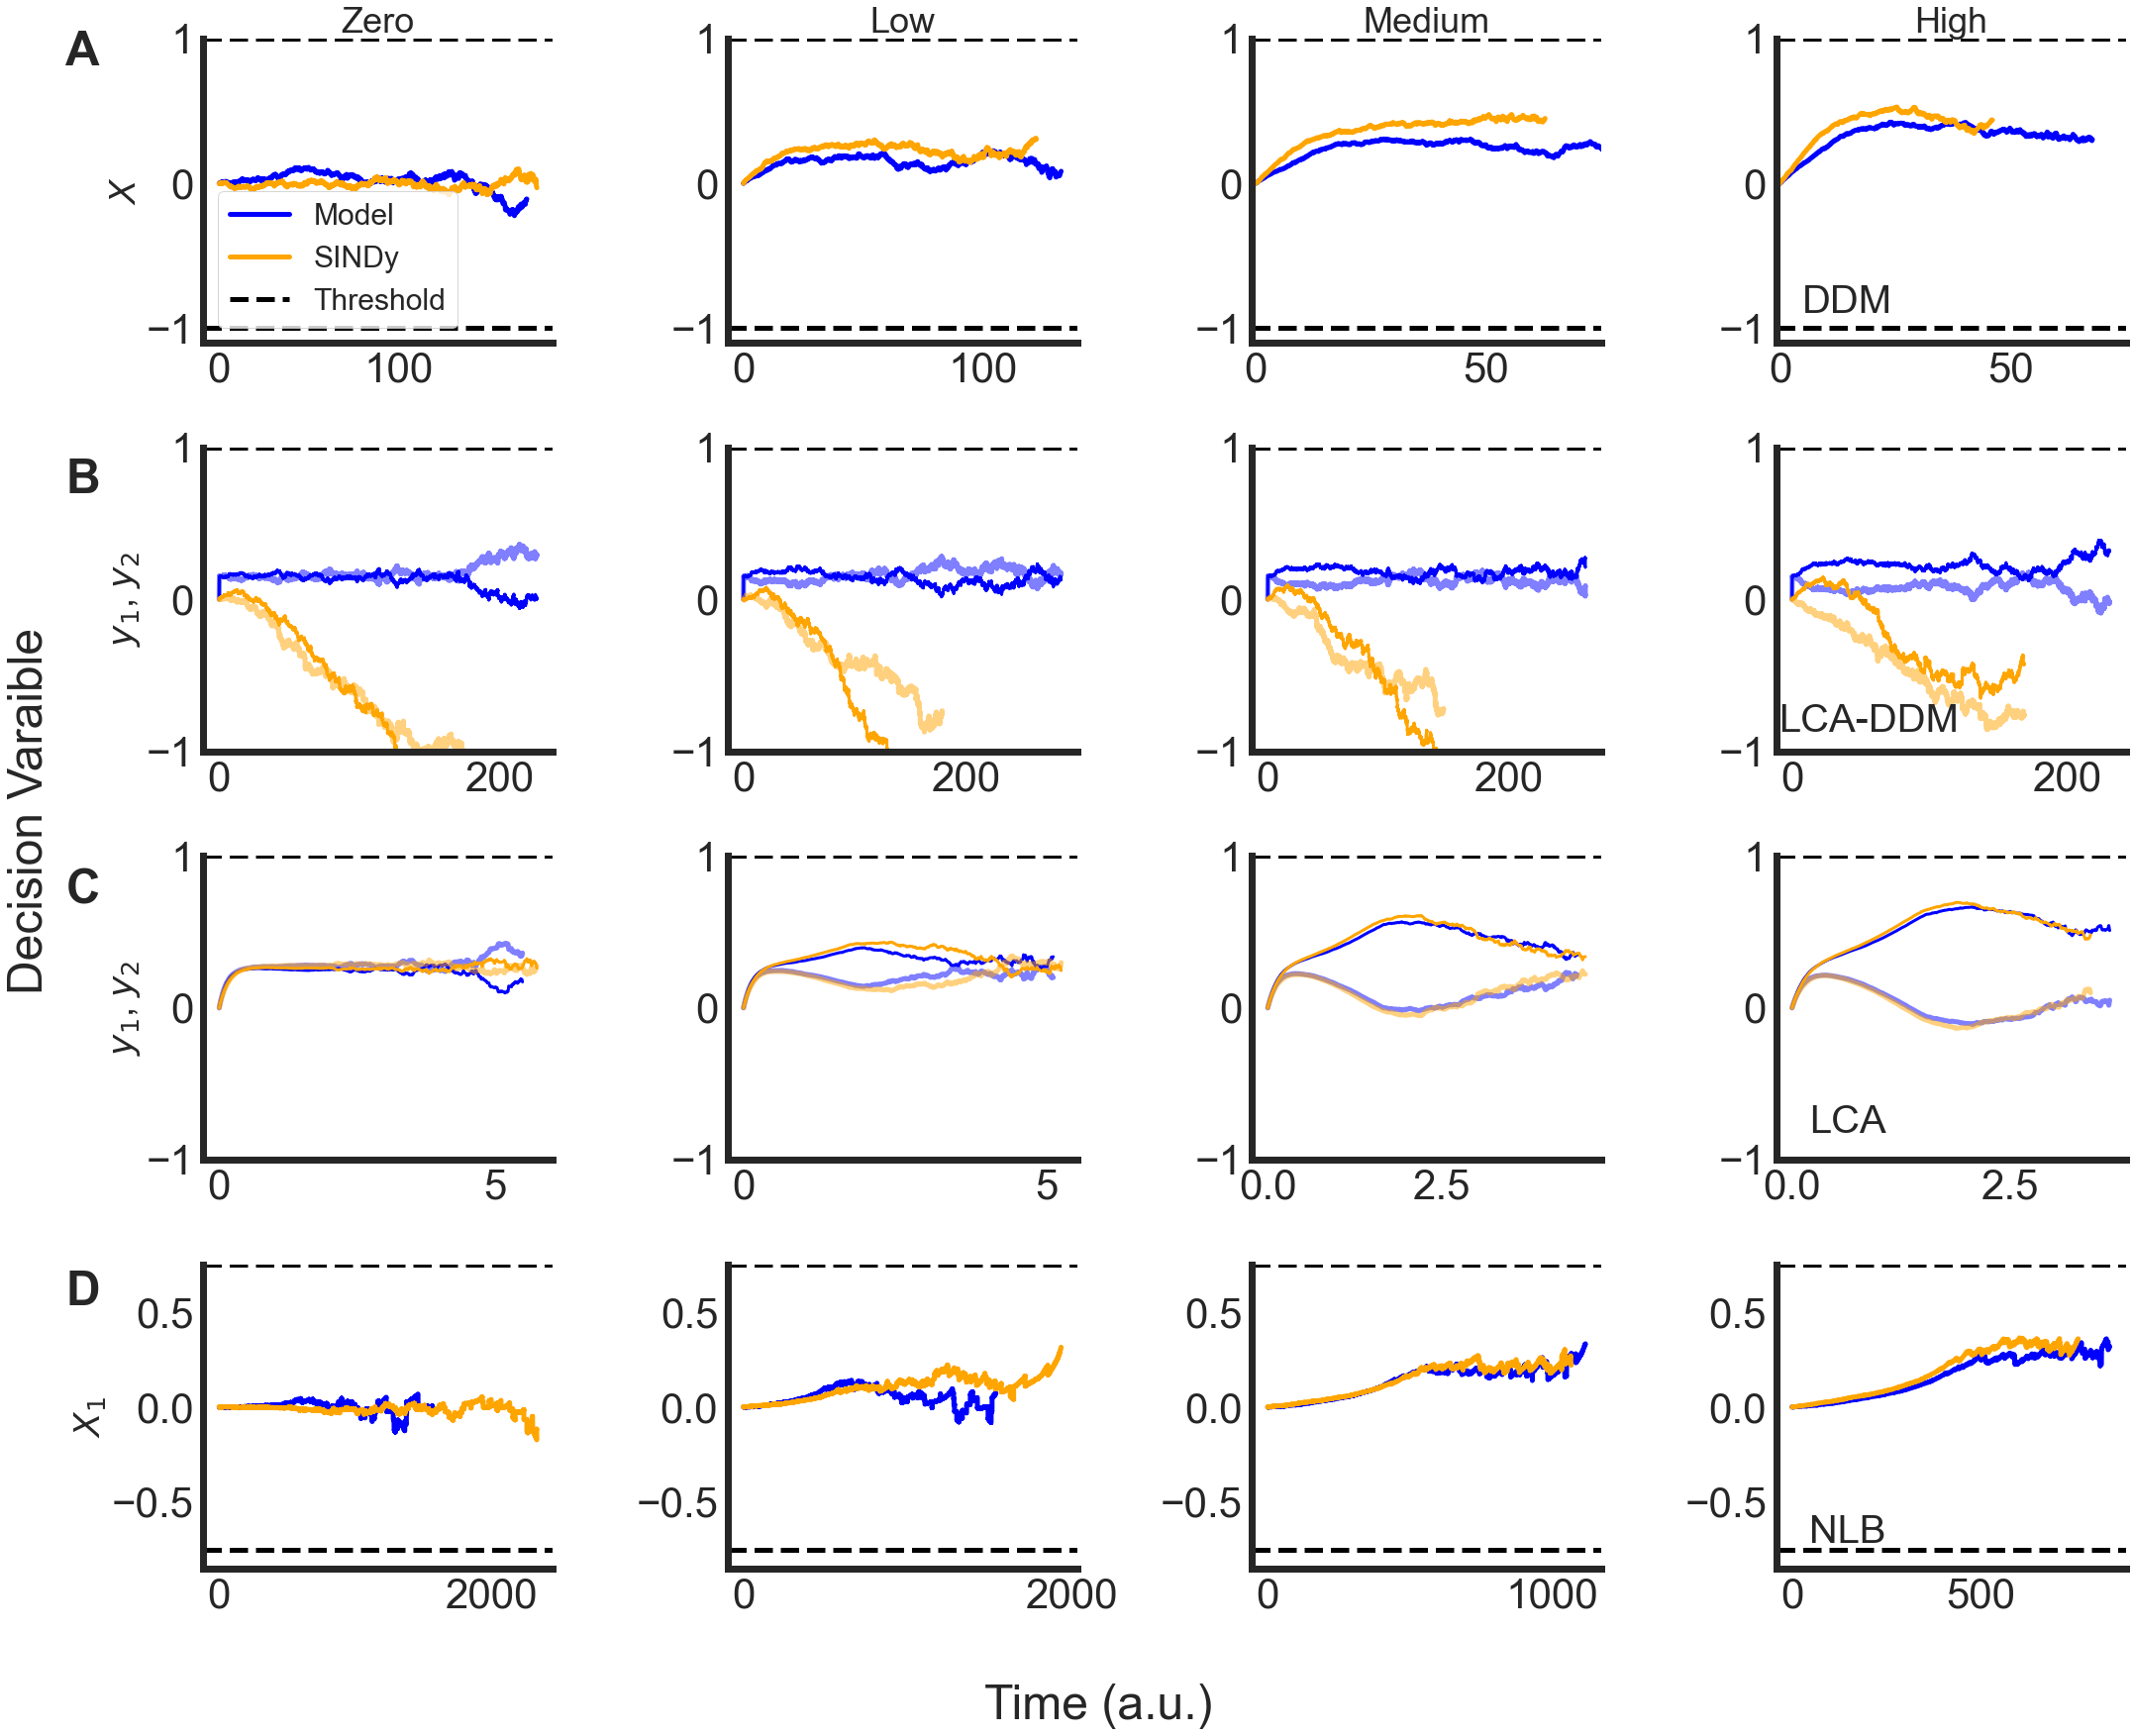

In [636]:
##average trial activity figure
# Define your sample indices
ddm_samples=[0,9,17,26]
lcaddm_samples=[0,3,5,8]
lca_samples=[0,2,5,7]
nlb_samples=[0,6,12,18]

samples = [ddm_samples, lcaddm_samples, lca_samples, nlb_samples]
sample_titles=["Zero","Low","Medium","High"]


fig, axs = plt.subplots(nrows=4, ncols=len(samples), figsize=(30, 25))

# Titles for each model for clarity in the plots
model_titles = ['DDM','LCA-DDM', 'LCA','NLB']

model_axis = ['$X$','$y_1$, $y_2$', '$y_1$, $y_2$','$X_1$']
# for model_index, model_data in enumerate([ave_ddm_nt,ave_lcaddm_nt, ave_lca_nt,ave_nt_nlb]):
for model_index, model_data in enumerate([ave_ddm,ave_lcaddm, ave_lca,ave_nlb]):
    for sample_index, sample in enumerate(samples[model_index]):
        # Access the specific subplot for the current model and sample
        ax = axs[model_index, sample_index] if len(samples[model_index]) > 1 else axs[model_index]
        
        # Fetch the data for this model and sample

        if model_titles[model_index]=='LCA':
            time_t=np.arange(0,10000,.01)
            ave_act = average_activity_multidimensional(model_data[sample][5], trial_threshold=50)
            ave_sin = average_activity_multidimensional(model_data[sample][6], trial_threshold=50)
        elif model_titles[model_index]=='LCA-DDM':
            time_t=np.arange(0,10000,.01)
            ave_act = average_activity_multidimensional(model_data[sample][5], trial_threshold=24)
            ave_sin = average_activity_multidimensional(model_data[sample][6], trial_threshold=24)
        elif model_titles[model_index]=="DDM":
            time_t=np.arange(0,10000,.1)
            ave_act = average_activity(model_data[sample][5], trial_threshold=50)
            ave_sin = average_activity(model_data[sample][6], trial_threshold=50)
        elif model_titles[model_index]=="NLB":
            time_t=np.arange(0,10000,.01)
            ave_act = average_activity(model_data[sample][5], trial_threshold=10)
            ave_sin = average_activity(model_data[sample][6], trial_threshold=10)
        
        # Plot the data for this model and sample
        if model_titles[model_index]=='LCA-DDM' or model_titles[model_index]=='LCA':  # Check if data is not empty
#             ax.plot(ave_lca_act[0], ave_lca_act[1], label='Population 1')
              ax.plot(time_t[0:len(ave_act[0])],ave_act[0],color="blue",linewidth=3, label=model_titles[model_index])
              ax.plot(time_t[0:len(ave_act[1])],ave_act[1],color="blue",alpha=.5,linewidth=5)
              ax.plot(time_t[0:len(ave_sin[0])],ave_sin[0],color="orange",linewidth=3, label='SINDy')
              ax.plot(time_t[0:len(ave_sin[1])],ave_sin[1],color="orange",alpha=.5,linewidth=5)

              ax.set_ylim(-1,1)
              ax.axhline(y=1, linestyle='dashed', linewidth=5, color='black', label='Threshold')
#             ax.plot(ave_lca_act_sin[0], ave_lca_act_sin[1], linestyle="dashed", label='Population 2')
        else: 
            if model_titles[model_index]=='NLB':
              ax.plot(time_t[0:len(ave_act)],ave_act,color="blue",linewidth=5,label=model_titles[model_index])
              ax.plot(time_t[0:len(ave_sin)],ave_sin,color="orange",linewidth=5, label='SINDy')                    
              ax.axhline(y=.75, linestyle='dashed', linewidth=5, color='black', label='Threshold')
              ax.axhline(y=-.75, linestyle='dashed', linewidth=5, color='black', label='')
              ax.set_ylim(-.85,.75)
              #ax.set_xlim(0,2200)

            else:
#               ave_sin_threshold=np.where(ave_sin>1)
#               ave_sin=ave_sin[0:ave_sin_threshold-1]
              ax.plot(time_t[0:len(ave_act)],ave_act,color="blue",linewidth=5,label="Model")
              ax.plot(time_t[0:len(ave_sin)],ave_sin,color="orange",linewidth=5, label='SINDy')
              ax.axhline(y=1, linestyle='dashed', linewidth=5, color='black', label='Threshold')
              ax.axhline(y=-1, linestyle='dashed', linewidth=5, color='black', label='')
              ax.set_ylim(-1.1,1)
              #ax.set_xlim(0,1500)
        
        # Only add a legend to the first subplot for cleanliness
        if sample_index == 0 and model_index==0:
            ax.legend(loc='best', fontsize=30)

        # Set title for the first row of subplots
        if model_index == 0:
            ax.set_title(f'{sample_titles[sample_index]}')
            if sample_titles[sample_index]=="Medium" or sample_titles[sample_index]=="High" :
                ax.set_xlim(-.85,75)

        
        # Labeling the rows with the model names
        if sample_index == 0:
            ax.set_ylabel(model_axis[model_index])
            
        sns.despine(ax=ax)
        sns.despine(ax=ax)
        ax.spines['left'].set_linewidth(7)
        ax.spines['bottom'].set_linewidth(7)

fig.text(.025, .95, 'A', ha='center', va='center',zorder=50,fontsize=48,fontweight='bold' )
fig.text(.025, .71, 'B', ha='center', va='center',zorder=50,fontsize=48,fontweight='bold' )
fig.text(.025, .48, 'C', ha='center', va='center',zorder=50,fontsize=48,fontweight='bold' )
fig.text(.025, .255, 'D', ha='center', va='center',zorder=50,fontsize=48,fontweight='bold' )
fig.text(.85, .81, 'DDM', ha='center', va='center',zorder=50)
fig.text(.86, .575, 'LCA-DDM', ha='center', va='center',zorder=50)
fig.text(.85, .35, 'LCA', ha='center', va='center',zorder=50)
fig.text(.85, .12, 'NLB', ha='center', va='center',zorder=50)
# Adjust layout to prevent overlap and ensure clarity
fig.text(0.0,0.525,'Decision Varaible', ha='center', va='center',rotation='vertical',fontsize=48,zorder=50)
fig.supxlabel('Time (a.u.)',fontsize=48,)        
plt.tight_layout()
# plt.savefig("fig_average_activity_02_05.pdf", dpi=600,bbox_inches='tight')

# Supplementary

In [581]:
#ddm ave poly 1
file_name = "Data_SINDy/lca/POLY/multiprocessing_lca_kelvin_st_poly0.pkl"
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()
st_ddm_poly=loaded_list

In [583]:
[np.mean(st_ddm_poly[i][0],axis=0) for i in range(41)]

[array([0.09432577, 0.09453273]),
 array([0.16089002, 0.03202127]),
 array([ 0.22629206, -0.02539927]),
 array([ 0.2889155 , -0.07594451]),
 array([ 0.34567168, -0.11754015]),
 array([ 0.39508923, -0.14995836]),
 array([ 0.43985902, -0.176271  ]),
 array([ 0.47904849, -0.1965512 ]),
 array([ 0.51440061, -0.21283141]),
 array([ 0.54717925, -0.22625121]),
 array([ 0.57796999, -0.2377882 ]),
 array([ 0.60774913, -0.2480559 ]),
 array([ 0.63608289, -0.25750787]),
 array([ 0.66384009, -0.26627489]),
 array([ 0.69120346, -0.27448949]),
 array([ 0.71823462, -0.28229139]),
 array([ 0.74502298, -0.28984165]),
 array([ 0.77138377, -0.29657838]),
 array([ 0.79779255, -0.30380866]),
 array([ 0.82410249, -0.31057797]),
 array([ 0.84998349, -0.31702392]),
 array([ 0.87658317, -0.32304035]),
 array([ 0.90266435, -0.32915683]),
 array([ 0.92881757, -0.33483154]),
 array([ 0.95469799, -0.34044793]),
 array([ 0.98112243, -0.34569037]),
 array([ 1.00716787, -0.35106646]),
 array([ 1.03318374, -0.3559123 

In [ ]:
####supplementary figure data

ddm_acc_poly=confidenceInterval(st_ddm_poly,2,10000)
ddm_acc_poly=[np.array(ddm_acc_poly[i])*100 for i in range(len(ddm_acc_poly))]
ddm_accsin_poly=confidenceInterval(st_ddm_poly,3,10000)
ddm_accsin_poly=[np.array(ddm_accsin_poly[i])*100 for i in range(len(ddm_accsin_poly))]
c_ddm_acc_poly,p_ddm_acc_poly,sig_points_acc_ddm_poly,effect_ave_ddm_poly=ks_statistical_analysis(st_ddm_poly,2,3,x_ddm)
ddm_time_poly=confidenceInterval(st_ddm_poly,4,10000)
ddm_time_poly=[np.array(ddm_time_poly[i]) for i in range(len(ddm_time_poly))]
ddm_timesin_poly=confidenceInterval(st_ddm_poly,5,10000)
ddm_timesin_poly=[np.array(ddm_timesin_poly[i]) for i in range(len(ddm_timesin_poly))]
c_ddm_time_poly,p_ddm_time_poly,sig_points_time_ddm_poly,effect_ave_ddm_t_poly=ks_statistical_analysis(st_ddm_poly,4,5,x_ddm)

ddm_acc_poly2=confidenceInterval(st_ddm_poly2,2,10000)
ddm_acc_poly2=[np.array(ddm_acc_poly2[i])*100 for i in range(len(ddm_acc_poly2))]
ddm_accsin_poly2=confidenceInterval(st_ddm_poly2,3,10000)
ddm_accsin_poly2=[np.array(ddm_accsin_poly2[i])*100 for i in range(len(ddm_accsin_poly2))]
c_ddm_acc_poly2,p_ddm_acc_poly2,sig_points_acc_ddm_poly2,effect_ave_ddm_poly2=ks_statistical_analysis(st_ddm_poly2,2,3,x_ddm)
ddm_time_poly2=confidenceInterval(st_ddm_poly2,4,10000)
ddm_time_poly2=[np.array(ddm_time_poly2[i]) for i in range(len(ddm_time_poly2))]
ddm_timesin_poly2=confidenceInterval(st_ddm_poly2,5,10000)
ddm_timesin_poly2=[np.array(ddm_timesin_poly2[i]) for i in range(len(ddm_timesin_poly2))]
c_ddm_time_poly2,p_ddm_time_poly2,sig_points_time_ddm_poly2,effect_ave_ddm_t_poly2=ks_statistical_analysis(st_ddm_poly2,4,5,x_ddm)


lcaddm_acc_poly=confidenceInterval(st_lcaddm_poly,2,10000)
lcaddm_acc_poly=[np.array(lcaddm_acc_poly[i])*100 for i in range(len(lcaddm_acc_poly))]
lcaddm_accsin_poly=confidenceInterval(st_lcaddm_poly,3,10000)
lcaddm_accsin_poly=[np.array(lcaddm_accsin_poly[i])*100 for i in range(len(lcaddm_accsin_poly))]
c_lcaddm_acc_poly,p_lcaddm_acc_poly,sig_points_acc_lcaddm_poly,effect_ave_lcaddm_poly=ks_statistical_analysis(st_lcaddm_poly,2,3,x_lcaddm)
lcaddm_time_poly=confidenceInterval(st_lcaddm_poly,4,10000)
lcaddm_time_poly=[np.array(lcaddm_time_poly[i]) for i in range(len(lcaddm_time_poly))]
lcaddm_timesin_poly=confidenceInterval(st_lcaddm_poly,5,10000)
lcaddm_timesin_poly=[np.array(lcaddm_timesin_poly[i]) for i in range(len(lcaddm_timesin_poly))]
c_lcaddm_time_poly,p_lcaddm_time_poly,sig_points_time_lcaddm_poly,effect_ave_lcaddm_t_poly=ks_statistical_analysis(st_lcaddm_poly,4,5,x_lcaddm)

lcaddm_acc_poly2=confidenceInterval(st_lcaddm_poly2,2,10000)
lcaddm_acc_poly2=[np.array(lcaddm_acc_poly2[i])*100 for i in range(len(lcaddm_acc_poly2))]
lcaddm_accsin_poly2=confidenceInterval(st_lcaddm_poly2,3,10000)
lcaddm_accsin_poly2=[np.array(lcaddm_accsin_poly2[i])*100 for i in range(len(lcaddm_accsin_poly2))]
c_lcaddm_acc_poly2,p_lcaddm_acc_poly2,sig_points_acc_lcaddm_poly2,effect_ave_lcaddm_poly2=ks_statistical_analysis(st_lcaddm_poly2,2,3,x_lcaddm)
lcaddm_time_poly2=confidenceInterval(st_lcaddm_poly2,4,10000)
lcaddm_time_poly2=[np.array(lcaddm_time_poly2[i]) for i in range(len(lcaddm_time_poly2))]
lcaddm_timesin_poly2=confidenceInterval(st_lcaddm_poly2,5,10000)
lcaddm_timesin_poly2=[np.array(lcaddm_timesin_poly2[i]) for i in range(len(lcaddm_timesin_poly2))]
c_lcaddm_time_poly2,p_lcaddm_time_poly2,sig_points_time_lcaddm_poly2,effect_ave_lcaddm_t_poly2=ks_statistical_analysis(st_lcaddm_poly2,4,5,x_lcaddm)

lca_acc_poly=confidenceInterval(st_lca_poly,2,10000)
lca_acc_poly=[np.array(lca_acc_poly[i])*100 for i in range(len(lca_acc_poly))]
lca_accsin_poly=confidenceInterval(st_lca_poly,3,10000)
lca_accsin_poly=[np.array(lca_accsin_poly[i])*100 for i in range(len(lca_accsin_poly))]
c_lca_acc_poly,p_lca_acc_poly,sig_points_acc_lca_poly,effect_ave_lca_poly=ks_statistical_analysis(st_lca_poly,2,3,x_lca)
lca_time_poly=confidenceInterval(st_lca_poly,5,10000)
lca_time_poly=[np.array(lca_time_poly[i]) for i in range(len(lca_time_poly))]
lca_timesin_poly=confidenceInterval(st_lca_poly,6,10000)
lca_timesin_poly=[np.array(lca_timesin_poly[i]) for i in range(len(lca_timesin_poly))]
c_lca_time_poly,p_lca_time_poly,sig_points_time_lca_poly,effect_ave_lca_t_poly=ks_statistical_analysis(st_lca_poly,5,6,x_lca)

lca_acc_poly2=confidenceInterval(st_lca_poly2,2,10000)
lca_acc_poly2=[np.array(lca_acc_poly2[i])*100 for i in range(len(lca_acc_poly2))]
lca_accsin_poly2=confidenceInterval(st_lca_poly2,3,10000)
lca_accsin_poly2=[np.array(lca_accsin_poly2[i])*100 for i in range(len(lca_accsin_poly2))]
c_lca_acc_poly2,p_lca_acc_poly2,sig_points_acc_lca_poly2,effect_ave_lca_poly2=ks_statistical_analysis(st_lca_poly2,2,3,x_lca)
lca_time_poly2=confidenceInterval(st_lca_poly2,5,10000)
lca_time_poly2=[np.array(lca_time_poly2[i])for i in range(len(lca_time_poly2))]
lca_timesin_poly2=confidenceInterval(st_lca_poly2,6,10000)
lca_timesin_poly2=[np.array(lca_timesin_poly2[i]) for i in range(len(lca_timesin_poly2))]
c_lca_time_poly2,p_lca_time_poly2,sig_points_time_lca_poly2,effect_ave_lca_t_poly2=ks_statistical_analysis(st_lca_poly2,5,6,x_lca)

# Random

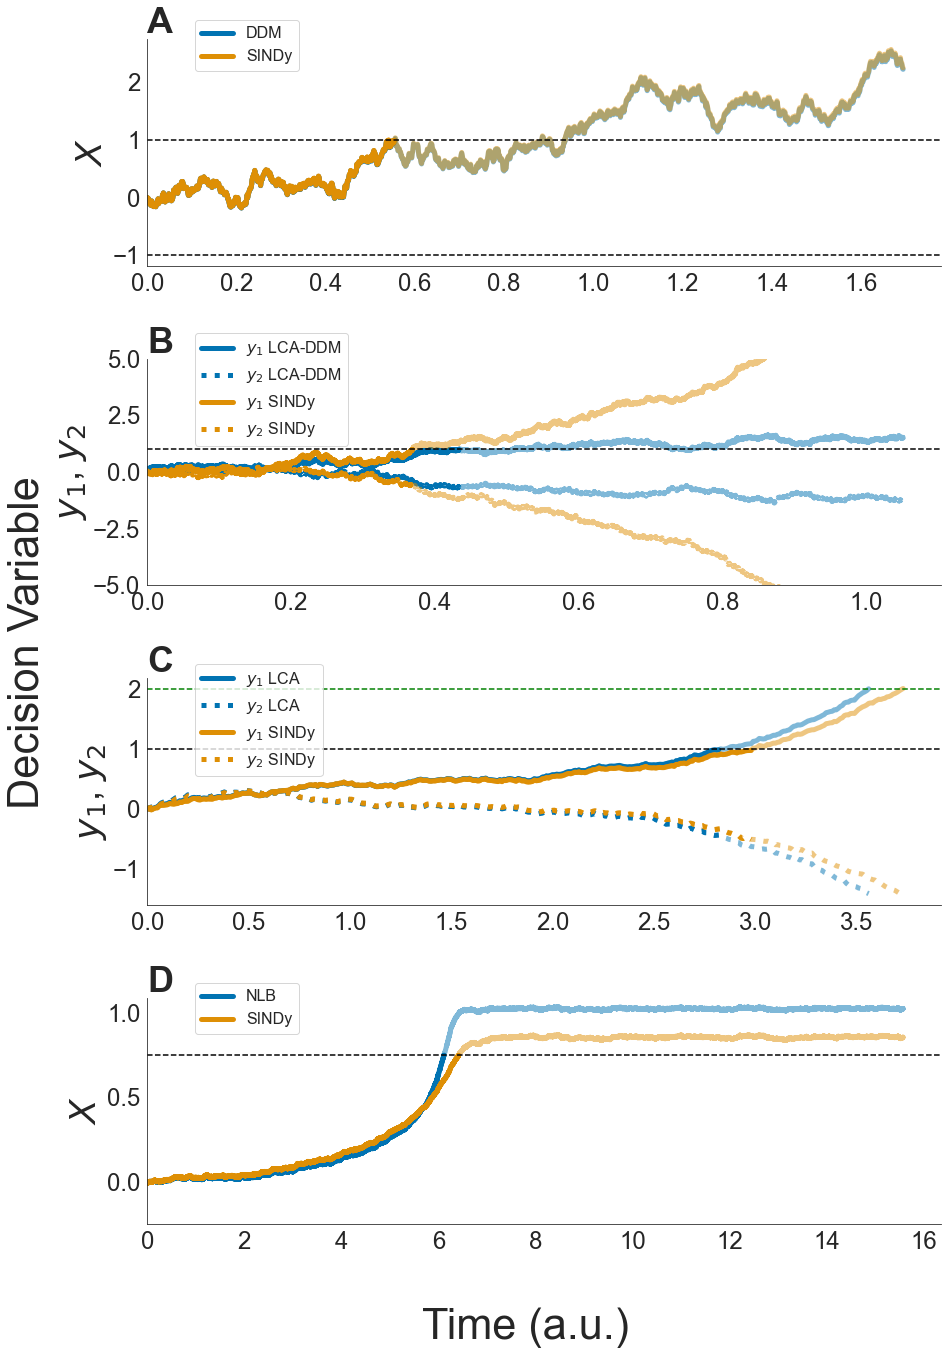

In [674]:
#FIGURE 2 - CLASSICAL DECISON VAIRABLE - TRUNCATED VS NON TRUNCATED
t = np.arange(0, 100000, 0.01)
#ddm data
ddm_i_coh=20
z_ddm=1
i_ddm=54#83#12#83
sample_ddm_t=average_ddm[ddm_i_coh][0][i_ddm]#trial_sample_0_ddm.T[i_ddm]
sample_ddm_sindy_t=average_ddm[ddm_i_coh][1][i_ddm]#trial_sample_sindy_0_ddm.T[i_ddm]
data_preproc_ddm = pd.DataFrame({'TS2': nt_ts2_data_ddm[i_ddm]})
#     'TS3': nt_ts3_data_ddm[i_ddm],
#     'TS4': nt_ts4_data_ddm[i_ddm]})
data_preproc_ddm_sindy = pd.DataFrame({'TS2': nt_ts2_data_ddm_sindy[i_ddm]})
#     'TS3': nt_ts3_data_ddm_sindy[i_ddm],
#     'TS4': nt_ts4_data_ddm_sindy[i_ddm]})

#lcaddm data
z_lcaddm=1
lcaddm_i_coh=39
i_lcaddm=78
# sample_lcaddm_t_x=trial_sample_0_lcaddm[0][i_lcaddm].T[0]
# sample_lcaddm_t_y=trial_sample_0_lcaddm[0][i_lcaddm].T[1]
average_lcaddm[lcaddm_i_coh][0][i_lcaddm][:,0]
average_lcaddm[lcaddm_i_coh][0][i_lcaddm][:,1]
average_lcaddm[lcaddm_i_coh][1][i_lcaddm][:,0],
average_lcaddm[lcaddm_i_coh][1][i_lcaddm][:,1]
data_lcaddm = pd.DataFrame({
    'sample_lcaddm_t_y1':average_lcaddm[lcaddm_i_coh][0][i_lcaddm][:,0],#trial_sample_0_lcaddm[0][i_lcaddm].T[0],
    'sample_lcaddm_t_y2':average_lcaddm[lcaddm_i_coh][0][i_lcaddm][:,1]})#trial_sample_0_lcaddm[0][i_lcaddm].T[1]})
data_lcaddm_sindy = pd.DataFrame({
    'sample_lcaddm_t_y1':average_lcaddm[lcaddm_i_coh][1][i_lcaddm][:,0],#,trial_sample_sindy_0_lcaddm[0][i_lcaddm].T[0],
    'sample_lcaddm_t_y2':average_lcaddm[lcaddm_i_coh][1][i_lcaddm][:,1]})#trial_sample_sindy_0_lcaddm[0][i_lcaddm].T[1]})
data_preproc_lcaddm = pd.DataFrame({
    'TS2_y1': nt_ts2_data_lcaddm[i_lcaddm][:,0],
    'TS2_y2': nt_ts2_data_lcaddm[i_lcaddm][:,1]})#,
#     'TS3_x': nt_ts3_data_lcaddm[i_lcaddm][:,0],
#     'TS3_y': nt_ts3_data_lcaddm[i_lcaddm][:,0]
#     'TS4_x': nt_ts4_data_lcaddm[i_lcaddm][:,0],
#     'TS4_y': nt_ts4_data_lcaddm[i_lcaddm][:,1]
data_preproc_lcaddm_sindy = pd.DataFrame({
    'TS2_y1': nt_ts2_data_lcaddm_sindy[i_lcaddm][:,0],
    'TS2_y2': nt_ts2_data_lcaddm_sindy[i_lcaddm][:,1]})

#lca data
z_lca=1
i_lca=1
# sample_lcaddm_t_x=trial_sample_0_lcaddm[0][i_lcaddm].T[0]
# sample_lcaddm_t_y=trial_sample_0_lcaddm[0][i_lcaddm].T[1]
data_lca = pd.DataFrame({
    'sample_lca_t_y1':average_lca[lca_i_coh][0][i_lca][:,0],#trial_sample_0_lca[0][i_lca].T[0],
    'sample_lca_t_y2':average_lca[lca_i_coh][0][i_lca][:,1]})#trial_sample_0_lca[0][i_lca].T[1]})
data_lca_sindy = pd.DataFrame({
    'sample_lca_t_y1':average_lca[lca_i_coh][1][i_lca][:,0],#,trial_sample_sindy_0_lca[0][i_lca].T[0],
    'sample_lca_t_y2':average_lca[lca_i_coh][1][i_lca][:,1]})#trial_sample_sindy_0_lca[0][i_lca].T[1]})
data_preproc_lca = pd.DataFrame({
    'T2_y1': threshold_lca_data[i_lca][:,0],
    'T2_y2': threshold_lca_data[i_lca][:,1]})#,
# #     'TS3_x': nt_ts3_data_lcaddm[i_lca][:,0],
# #     'TS3_y': nt_ts3_data_lcaddm[i_lca][:,0]
# #     'TS4_x': nt_ts4_data_lcaddm[i_lca][:,0],
# #     'TS4_y': nt_ts4_data_lcaddm[i_lca][:,1]
data_preproc_lca_sindy = pd.DataFrame({
    'T2_y1': threshold_lca_sindy_data[i_lca][:,0],
    'T2_y2': threshold_lca_sindy_data[i_lca][:,1]})

#NLB data
z_nlb=.75
i_nlb=4
sample_NLB_t=trial_sample_0_spb.T[i_nlb]
sample_NLB_sindy_t=trial_sample_sindy_0_spb.T[i_nlb]
data_preproc_NLB = pd.DataFrame({
    'TS2': nt_ts2_data_spb[i_nlb],})
#     'TS3': nt_ts3_data_spb[i_nlb],
#     'TS4': nt_ts4_data_spb[i_nlb]
data_preproc_NLB_sindy = pd.DataFrame({
    'TS2': nt_ts2_data_spb_sindy[i_nlb],})
#     'TS3': nt_ts3_data_spb_sindy[i_nlb],
#     'TS4': nt_ts4_data_spb_sindy[i_nlb]

#threshold crossing index
ddm_t=list(np.where(data_preproc_ddm['TS2']>z_ddm))
ddm_t=np.squeeze(ddm_t)
ddm_sindy_t=list(np.where(data_preproc_ddm_sindy['TS2']>z_ddm))
ddm_sindy_t=np.squeeze(ddm_sindy_t)

lcaddm_y1_t=list(np.where(data_preproc_lcaddm['TS2_y1']>z_lcaddm))
lcaddm_y1_t=np.squeeze(lcaddm_y1_t)
lcaddm_y2_t=list(np.where(data_preproc_lcaddm['TS2_y2']>z_lcaddm))
lcaddm_y2_t=np.squeeze(lcaddm_y2_t)
sindy_lcaddm_y1_t=list(np.where(data_preproc_lcaddm_sindy['TS2_y1']>z_lcaddm))
sindy_lcaddm_y1_t=np.squeeze(sindy_lcaddm_y1_t)
sindy_lcaddm_y2_t=list(np.where(data_preproc_lcaddm_sindy['TS2_y2']>z_lcaddm))
sindy_lcaddm_y1_t=np.squeeze(sindy_lcaddm_y1_t)

lca_y1_t=list(np.where(data_preproc_lca['T2_y1']>z_lca))
lca_y1_t=np.squeeze(lca_y1_t)
lca_y2_t=list(np.where(data_preproc_lca['T2_y2']>z_lca))
lca_y2_t=np.squeeze(lca_y2_t)
sindy_lca_y1_t=list(np.where(data_preproc_lca_sindy['T2_y1']>z_lca))
sindy_lca_y1_t=np.squeeze(sindy_lca_y1_t)
sindy_lca_y2_t=list(np.where(data_preproc_lca_sindy['T2_y2']>z_lca))
sindy_lca_y1_t=np.squeeze(sindy_lca_y1_t)

nlb_t=list(np.where(data_preproc_NLB['TS2']>z_nlb))
nlb_t=np.squeeze(nlb_t)
nlb_sindy_t=list(np.where(data_preproc_NLB_sindy['TS2']>z_nlb))
nlb_sindy_t=np.squeeze(nlb_sindy_t)

# #graph setup
fig, ax = plt.subplots(4, 1, figsize=(15, 20))
plt.tight_layout(pad=3, w_pad=0.75, h_pad=1.5)
sns.despine(fig=None, ax=None, top=True, right=True,offset=None, trim=False)
# fig.supylabel('Decision Variable')
# fig.supxlabel('Time(a.u.)')

###Panel_1###
#left,bottom,width,height
# ax2 = fig.add_axes([1.02, 0.775, 0.125, 0.125])
# sns.lineplot(x=t[0:len(sample_ddm_t)]*.1,y=sample_ddm_t,color=sns.color_palette('colorblind')[0], linewidth=5,ax=ax2)
# sns.lineplot(x=t[0:len(sample_ddm_sindy_t)]*.1,y=sample_ddm_sindy_t,color=sns.color_palette('colorblind')[1], linewidth=5,ax=ax2)
# ax2.set(xlabel="",ylabel="")
# ax2.spines['right'].set_visible(False)
# ax2.spines['top'].set_visible(False)
# ax2.axhline(y=-z_ddm,linestyle="dashed", color="black" )
# sns.lineplot(x=t[0:len(sample_ddm_t)]*.1,y=sample_ddm_t,color=sns.color_palette('colorblind')[0], linewidth=5,ax=ax[0,0],label="DDM")
# sns.lineplot(x=t[0:len(sample_ddm_sindy_t)]*.1,y=sample_ddm_sindy_t,color=sns.color_palette('colorblind')[1], linewidth=5,ax=ax[0,0],label="SINDy")

sns.lineplot(x=t[0:len(data_preproc_ddm['TS2'].iloc[0:ddm_t[0]])]*.1,y=data_preproc_ddm['TS2'].iloc[0:ddm_t[0]],ax=ax[0],color=sns.color_palette("colorblind")[0], linewidth=5,label="DDM")
sns.lineplot(x=t[0:len(data_preproc_ddm['TS2'])]*.1,y=data_preproc_ddm['TS2'],ax=ax[0],color=sns.color_palette("colorblind")[0], linewidth=5,label='_nolegend_', alpha=0.5)

sns.lineplot(x=t[0:len(data_preproc_ddm_sindy['TS2'].iloc[0:ddm_sindy_t[0]])]*.1,y=data_preproc_ddm_sindy['TS2'].iloc[0:ddm_sindy_t[0]],ax=ax[0],color=sns.color_palette("colorblind")[1],linewidth=5,label="SINDy")
sns.lineplot(x=t[0:len(data_preproc_ddm_sindy['TS2'])]*.1,y=data_preproc_ddm_sindy['TS2'],ax=ax[0],color=sns.color_palette("colorblind")[1],linewidth=5,label='_nolegend_',alpha=0.5)

ax[0].set_xlim(0)
ax[0].axhline(y=z_ddm,linestyle="dashed", color="black" )
ax[0].axhline(y=-z_ddm,linestyle="dashed", color="black" )
ax[0].set(ylabel="$X$")
ax[0].legend(bbox_to_anchor=(0.05, 1.12), loc='upper left')
ax[0].set_title('A', fontweight='bold' ,loc='left')

###Panel_2###
# ax3 = fig.add_axes([1.02, 0.525, 0.125, 0.125])
# sns.lineplot(data=data_lcaddm['sample_lcaddm_t_x'],color=sns.color_palette('colorblind')[0], linewidth=5,ax=ax3)
# sns.lineplot(data=data_lcaddm['sample_lcaddm_t_y'],color=sns.color_palette('colorblind')[0], linewidth=5,ax=ax3)
# sns.lineplot(data=data_lcaddm_sindy['sample_lcaddm_t_x'],color=sns.color_palette('colorblind')[1], linewidth=5,ax=ax3)
# sns.lineplot(data=data_lcaddm_sindy['sample_lcaddm_t_y'],color=sns.color_palette('colorblind')[1], linewidth=5,ax=ax3)
# ax3.set(xlabel="",ylabel="")
# ax3.spines['right'].set_visible(False)
# ax3.spines['top'].set_visible(False)
# ax3.axhline(y=z_lcaddm,linestyle="dashed", color="black")
#sns.lineplot(x=t[0:len(data_lcaddm['sample_lcaddm_t_y1'])]*0.01,y=data_lcaddm['sample_lcaddm_t_y1'],color=sns.color_palette('colorblind')[0], linewidth=5,ax=ax[0,1],label="y1 LCA-DDM")
#sns.lineplot(x=t[0:len(data_lcaddm['sample_lcaddm_t_y2'])]*0.01,y=data_lcaddm['sample_lcaddm_t_y2'],color=sns.color_palette('colorblind')[0], linestyle='dotted',linewidth=5,ax=ax[0,1],label="y1 LCA-DDM")
#sns.lineplot(x=t[0:len(data_lcaddm_sindy['sample_lcaddm_t_y1'])]*0.01,y=data_lcaddm_sindy['sample_lcaddm_t_y1'],color=sns.color_palette('colorblind')[1], linewidth=5,ax=ax[0,1],label="y1 SINDy")
#sns.lineplot(x=t[0:len(data_lcaddm_sindy['sample_lcaddm_t_y2'])]*0.01,y=data_lcaddm_sindy['sample_lcaddm_t_y2'],color=sns.color_palette('colorblind')[1],linestyle='dotted', linewidth=5,ax=ax[0,1],label="y2 SINDy")
sns.lineplot(x=t[0:len(data_preproc_lcaddm['TS2_y1'].iloc[0:(lcaddm_y1_t[0])])]*0.01,y=data_preproc_lcaddm['TS2_y1'].iloc[0:(lcaddm_y1_t[0])],ax=ax[1],color=sns.color_palette("colorblind")[0],linewidth=5,label="$y_1$ LCA-DDM")
sns.lineplot(x=t[0:len(data_preproc_lcaddm['TS2_y1'])]*0.01,y=data_preproc_lcaddm['TS2_y1'],ax=ax[1],color=sns.color_palette("colorblind")[0],linewidth=5,label='_nolegend_',alpha=.5)
sns.lineplot(x=t[0:len(data_preproc_lcaddm['TS2_y2'].iloc[0:(lcaddm_y1_t[0])])]*0.01,y=data_preproc_lcaddm['TS2_y2'].iloc[0:(lcaddm_y1_t[0])],ax=ax[1],color=sns.color_palette("colorblind")[0],linestyle='dotted',linewidth=5,label="$y_2$ LCA-DDM")
sns.lineplot(x=t[0:len(data_preproc_lcaddm['TS2_y2'])]*0.01,y=data_preproc_lcaddm['TS2_y2'],ax=ax[1],color=sns.color_palette("colorblind")[0],linestyle='dotted',linewidth=5, label='_nolegend_',alpha=.5)

sns.lineplot(x=t[0:len(data_preproc_lcaddm_sindy['TS2_y1'].iloc[0:(sindy_lcaddm_y1_t[0])])]*0.01,y=data_preproc_lcaddm_sindy['TS2_y1'].iloc[0:(sindy_lcaddm_y1_t[0])],ax=ax[1],color=sns.color_palette("colorblind")[1],linewidth=5,label="$y_1$ SINDy")
sns.lineplot(x=t[0:len(data_preproc_lcaddm_sindy['TS2_y1'])]*0.01,y=data_preproc_lcaddm_sindy['TS2_y1'],ax=ax[1],color=sns.color_palette("colorblind")[1],linewidth=5,label='_nolegend_',alpha=.5)
sns.lineplot(x=t[0:len(data_preproc_lcaddm_sindy['TS2_y2'].iloc[0:(sindy_lcaddm_y1_t[0])])]*0.01,y=data_preproc_lcaddm_sindy['TS2_y2'].iloc[0:(sindy_lcaddm_y1_t[0])],ax=ax[1],color=sns.color_palette("colorblind")[1],linestyle='dotted',linewidth=5,label="$y_2$ SINDy")
sns.lineplot(x=t[0:len(data_preproc_lcaddm_sindy['TS2_y2'])]*0.01,y=data_preproc_lcaddm_sindy['TS2_y2'],ax=ax[1],color=sns.color_palette("colorblind")[1],linestyle='dotted',linewidth=5,label='_nolegend_',alpha=.5)
ax[1].set_xlim(0)
ax[1].set_ylim(-5,5)
ax[1].axhline(y=z_lcaddm,linestyle="dashed", color="black" )
ax[1].set(ylabel="$y_1$, $y_2$")
ax[1].legend(bbox_to_anchor=(0.05, 1.15), loc='upper left')
ax[1].set_title('B', fontweight='bold' ,loc='left')

###Panel_3###
# ax4 = fig.add_axes([1.02, 0.275, 0.125, 0.125])
# sns.lineplot(data=data_lca['sample_lca_t_x'],color=sns.color_palette('colorblind')[0], linewidth=5,ax=ax4)
# sns.lineplot(data=data_lca['sample_lca_t_y'],color=sns.color_palette('colorblind')[0], linewidth=5,ax=ax4)
# sns.lineplot(data=data_lca_sindy['sample_lca_t_x'],color=sns.color_palette('colorblind')[1], linewidth=5,ax=ax4)
# sns.lineplot(data=data_lca_sindy['sample_lca_t_y'],color=sns.color_palette('colorblind')[1], linewidth=5,ax=ax4)
# ax4.set(xlabel="",ylabel="")
# ax4.spines['right'].set_visible(False)
# ax4.spines['top'].set_visible(False)
# ax4.axhline(y=z_lca,linestyle="dashed", color="black")
#ax[2].set_xlim(left=0)
sns.lineplot(x=t[0:len(data_preproc_lca['T2_y1'].iloc[0:(lca_y1_t[0])])],y=data_preproc_lca['T2_y1'].iloc[0:(lca_y1_t[0])],ax=ax[2],color=sns.color_palette("colorblind")[0],linewidth=5,label="$y_1$ LCA")
sns.lineplot(x=t[0:len(data_preproc_lca['T2_y1'])],y=data_preproc_lca['T2_y1'],ax=ax[2],color=sns.color_palette("colorblind")[0],linewidth=5,label='_nolegend_',alpha=.5)
sns.lineplot(x=t[0:len(data_preproc_lca['T2_y2'].iloc[0:(lca_y1_t[0])])],y=data_preproc_lca['T2_y2'].iloc[0:(lca_y1_t[0])],ax=ax[2],color=sns.color_palette("colorblind")[0],linestyle='dotted',linewidth=5,label="$y_2$ LCA")
sns.lineplot(x=t[0:len(data_preproc_lca['T2_y2'])],y=data_preproc_lca['T2_y2'],ax=ax[2],color=sns.color_palette("colorblind")[0],linestyle='dotted',linewidth=5, label='_nolegend_',alpha=.5)

sns.lineplot(x=t[0:len(data_preproc_lca_sindy['T2_y1'].iloc[0:(sindy_lca_y1_t[0])])],y=data_preproc_lca_sindy['T2_y1'].iloc[0:(sindy_lca_y1_t[0])],ax=ax[2],color=sns.color_palette("colorblind")[1],linewidth=5,label="$y_1$ SINDy")
sns.lineplot(x=t[0:len(data_preproc_lca_sindy['T2_y1'])],y=data_preproc_lca_sindy['T2_y1'],ax=ax[2],color=sns.color_palette("colorblind")[1],linewidth=5,label='_nolegend_',alpha=.5)
sns.lineplot(x=t[0:len(data_preproc_lca_sindy['T2_y2'].iloc[0:(sindy_lca_y1_t[0])])],y=data_preproc_lca_sindy['T2_y2'].iloc[0:(sindy_lca_y1_t[0])],ax=ax[2],color=sns.color_palette("colorblind")[1],linestyle='dotted',linewidth=5,label="$y_2$ SINDy")
sns.lineplot(x=t[0:len(data_preproc_lca_sindy['T2_y2'])],y=data_preproc_lca_sindy['T2_y2'],ax=ax[2],color=sns.color_palette("colorblind")[1],linestyle='dotted',linewidth=5,label='_nolegend_',alpha=.5)
ax[2].set_xlim(0)
ax[2].axhline(y=z_lca,linestyle="dashed", color="black" )
ax[2].axhline(y=2*z_lca,linestyle="dashed", color="green" )
ax[2].set(ylabel="$y_1$, $y_2$")
ax[2].legend(bbox_to_anchor=(0.05, 1.1), loc='upper left')
ax[2].set_title('C', fontweight='bold' ,loc='left')

###Panel_4###
# ax5 = fig.add_axes([1.02, 0.025, 0.125, 0.125])
# sns.lineplot(x=t[0:len(sample_NLB_t)],y=sample_NLB_t,color=sns.color_palette('colorblind')[0], linewidth=5,ax=ax5)
# sns.lineplot(x=t[0:len(sample_NLB_sindy_t)],y=sample_NLB_sindy_t,color=sns.color_palette('colorblind')[1], linewidth=5,ax=ax5)
# ax5.set(xlabel="",ylabel="")
# ax5.spines['right'].set_visible(False)
# ax5.spines['top'].set_visible(False)
# ax5.axhline(y=z_nlb,linestyle="dashed", color="black")
# sns.lineplot(x=t[0:len(sample_NLB_t)]*0.01,y=sample_NLB_t,color=sns.color_palette('colorblind')[0], linewidth=5,ax=ax[3],label="NLB")
# sns.lineplot(x=t[0:len(sample_NLB_sindy_t)]*0.01,y=sample_NLB_sindy_t,color=sns.color_palette('colorblind')[1], linewidth=5,ax=ax[3],label="SINDy")
# sns.lineplot(data=data_preproc_NLB['TS2'],ax=ax[3],color=sns.color_palette("colorblind")[1], linestyle='-',linewidth=5,label="ts2")
# sns.lineplot(data=data_preproc_NLB['TS3'],ax=ax[3],color=sns.color_palette("colorblind")[2], linestyle='--',linewidth=5,label="ts3")
sns.lineplot(x=t[0:len(data_preproc_NLB['TS2'])]*0.01,y=data_preproc_NLB['TS2'],ax=ax[3],color=sns.color_palette("colorblind")[0],linewidth=5,label='_nolegend_',alpha=.5)
sns.lineplot(x=t[0:len(data_preproc_NLB['TS2'].iloc[0:(nlb_t[0])])]*0.01,y=data_preproc_NLB['TS2'].iloc[0:(nlb_t[0])],ax=ax[3],color=sns.color_palette("colorblind")[0],linewidth=5,label="NLB")
sns.lineplot(x=t[0:len(data_preproc_NLB_sindy['TS2'])]*0.01,y=data_preproc_NLB_sindy['TS2'],ax=ax[3],color=sns.color_palette("colorblind")[1],linewidth=5,label='_nolegend_',alpha=.5)
sns.lineplot(x=t[0:len(data_preproc_NLB_sindy['TS2'].iloc[0:(nlb_sindy_t[0])])]*0.01,y=data_preproc_NLB_sindy['TS2'].iloc[0:(nlb_sindy_t[0])],ax=ax[3],color=sns.color_palette("colorblind")[1],linewidth=5,label="SINDy")
ax[3].set_xlim(0)
ax[3].set_ylim(-0.25)
ax[3].axhline(y=z_nlb,linestyle="dashed", color="black" )
ax[3].axhline(y=-z_nlb,linestyle="dashed", color="black" )
ax[3].set(ylabel="$X$")
ax[3].legend(bbox_to_anchor=(0.05, 1.1), loc='upper left')
ax[3].set_title('D', fontweight='bold' ,loc='left')
#plt.show()
fig.supylabel('Decision Variable')
fig.supxlabel('Time (a.u.)')

plt.savefig('Figure2_nt_average_23_08.svg', dpi=300, bbox_inches='tight')

In [671]:
###Figure 3 - Choice behaviour T vs NT#####
scaling=100
#ddm data
choice_ddm=[]
choice_sindy_ddm=[]
for i in range(len(average_ddm)):
    choice_ddm.append(np.mean(average_ddm[i][2])*scaling)
    choice_sindy_ddm.append(np.mean(average_ddm[i][3])*scaling)

choice_ddm=[]
choice_sindy_ddm=[]
for i in range(len(average_ddm)):
    choice_ddm.append(np.mean(average_ddm[i][2])*scaling)
    choice_sindy_ddm.append(np.mean(average_ddm[i][3])*scaling)

choice_ddm_nt=100*np.array(mean_of_list(timescale4_ddm,2))
choice_sindy_ddm_nt=100*np.array(mean_of_list(timescale4_ddm,3))

###lca
choice_lcaddm=[]
choice_sindy_lcaddm=[]
for i in range(len(average_lcaddm)):
    choice_lcaddm.append(np.mean(average_lcaddm[i][2])*scaling)
    choice_sindy_lcaddm.append(np.mean(average_lcaddm[i][3])*scaling)

choice_lcaddm_nt=100*np.array(mean_of_list(timescale4_lcaddm,3))
choice_sindy_lcaddm_nt=100*np.array(mean_of_list(timescale4_lcaddm,4))

#lca data
choice_lca=[]
choice_sindy_lca=[]
for i in range(len(average_lca)):
    choice_lca.append(np.mean(average_lca[i][2])*scaling)
    choice_sindy_lca.append(np.mean(average_lca[i][3])*scaling)

choice_lca_nt=100*np.array(mean_of_list(threshold_lca,3))
choice_sindy_lca_nt=100*np.array(mean_of_list(threshold_lca,4))

#NLB data
choice_nlb=[]
choice_sindy_nlb=[]
for i in range(len(average_choice_nlb)):
    choice_nlb.append(np.mean(average_choice_nlb[i][2])*scaling)
    choice_sindy_nlb.append(np.mean(average_choice_nlb[i][3])*scaling)

choice_nlb_nt=100*np.array(mean_of_list(timescale4_spb,2))
choice_sindy_nlb_nt=100*np.array(mean_of_list(timescale4_spb,3))

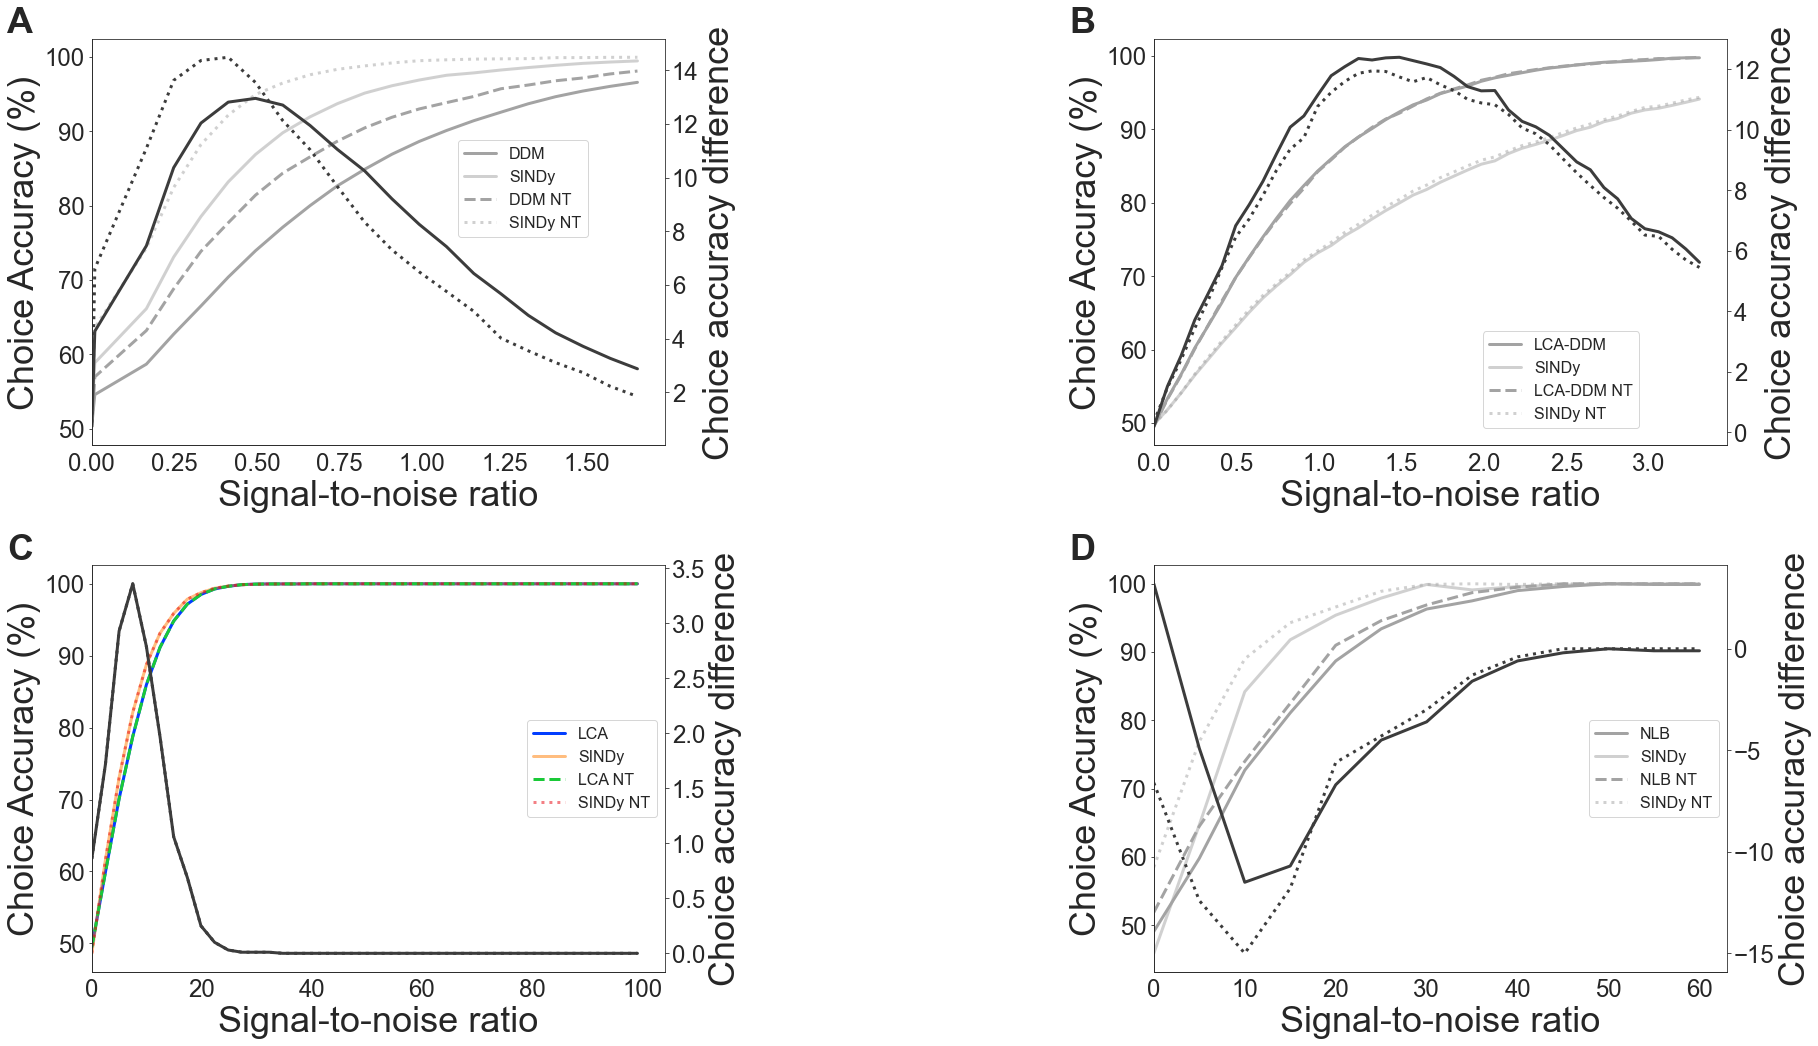

In [673]:
###Figure 3#####
fig,ax=plt.subplots(2, 2, figsize=(25, 15))
plt.tight_layout(pad=1.5, w_pad=12, h_pad=2.25)
sns.despine(fig=None, ax=None, top=True, right=True,offset=None, trim=False)
# fig.supylabel('Decision Variable')
# fig.supxlabel('Time(a.u.)')
scale_choice=100
# x_ddm=[SnR_ddm_0,SnR_ddm_1,SnR_ddm_2,SnR_ddm_3,SnR_ddm_4,SnR_ddm_5,SnR_ddm_6,SnR_ddm_7,SnR_ddm_8,SnR_ddm_9,SnR_ddm_10]
# x_lcaddm=[SnR_lcaddm_1,SnR_lcaddm_2,SnR_lcaddm_3,SnR_lcaddm_4,SnR_lcaddm_5,SnR_lcaddm_6,SnR_lcaddm_7,SnR_lcaddm_8,SnR_lcaddm_9,SnR_lcaddm_10]
# x_lca=[SnR_lca_0,SnR_lca_1,SnR_lca_2,SnR_lca_3,SnR_lca_4,SnR_lca_5,SnR_lca_6]
# x_spb=[SnR_SPB_0,SnR_SPB_1,SnR_SPB_2,SnR_SPB_3,SnR_SPB_4,SnR_SPB_5,SnR_SPB_6,SnR_SPB_7,SnR_SPB_8,SnR_SPB_9,SnR_SPB_10,SnR_SPB_11,SnR_SPB_12]

###Panel_1###
sns.lineplot(x=x_ddm,y=choice_ddm,color=sns.color_palette('bright')[7], linewidth=3,ax=ax[0,0],label="DDM")
sns.lineplot(x=x_ddm,y=choice_sindy_ddm,color=sns.color_palette('bright')[7], linewidth=3,ax=ax[0,0],label="SINDy",alpha=0.5)
sns.lineplot(x=x_ddm,y=choice_ddm_nt,color=sns.color_palette('bright')[7],linestyle="dashed", linewidth=3,ax=ax[0,0],label="DDM NT")
sns.lineplot(x=x_ddm,y=choice_sindy_ddm_nt,color=sns.color_palette('bright')[7],linestyle="dotted", linewidth=3,ax=ax[0,0],label="SINDy NT",alpha=0.5)
ax[0,0].set_xlim(0)
ax[0,0].set(xlabel="Signal-to-noise ratio",ylabel="Choice Accuracy (%)")
ax[0,0].legend(loc='right')
ax[0,0].set_title('A', fontweight='bold' ,x=-.125, y=1)
ax[0,0].legend(bbox_to_anchor=(0.625, 0.77), loc='upper left')

ax2 = ax[0,0].twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Choice accuracy difference')  # we already handled the x-label with ax1
sns.lineplot(x=x_ddm,y=abs(np.array(choice_ddm)-np.array(choice_sindy_ddm)), color=sns.color_palette('dark')[7], linewidth=3,ax=ax2,label="Difference Truncated",legend = False)
sns.lineplot(x=x_ddm,y=abs(np.array(choice_ddm_nt)-np.array(choice_sindy_ddm_nt)), color=sns.color_palette('dark')[7],linestyle="dotted", linewidth=3,ax=ax2,label="Difference Non-Truncated",legend = False)


###Panel_2###
sns.lineplot(x=x_lcaddm,y=choice_lcaddm,color=sns.color_palette('bright')[7], linewidth=3,ax=ax[0,1],label="LCA-DDM")
sns.lineplot(x=x_lcaddm,y=choice_sindy_lcaddm,color=sns.color_palette('bright')[7], linewidth=3,ax=ax[0,1],label="SINDy",alpha=0.5)
sns.lineplot(x=x_lcaddm,y=choice_lcaddm_nt,color=sns.color_palette('bright')[7],linestyle="dashed", linewidth=3,ax=ax[0,1],label="LCA-DDM NT")
sns.lineplot(x=x_lcaddm,y=choice_sindy_lcaddm_nt,color=sns.color_palette('bright')[7],linestyle="dotted", linewidth=3,ax=ax[0,1],label="SINDy NT",alpha=0.5)
ax[0,1].set_xlim(0)
ax[0,1].set(xlabel="Signal-to-noise ratio",ylabel="Choice Accuracy (%)")
ax[0,1].legend(loc='right')
ax[0,1].set_title('B', fontweight='bold' ,x=-.125, y=1)
ax[0,1].legend(bbox_to_anchor=(0.56, 0.3), loc='upper left')

ax3 = ax[0,1].twinx()  # instantiate a second axes that shares the same x-axis
ax3.set_ylabel('Choice accuracy difference')  # we already handled the x-label with ax1
sns.lineplot(x=x_lcaddm,y=abs(np.array(choice_lcaddm)-np.array(choice_sindy_lcaddm)), color=sns.color_palette('dark')[7], linewidth=3,ax=ax3,label="Difference Truncated",legend = False)
sns.lineplot(x=x_lcaddm,y=abs(np.array(choice_lcaddm_nt)-np.array(choice_sindy_lcaddm_nt)), color=sns.color_palette('dark')[7],linestyle="dotted", linewidth=3,ax=ax3,label="Difference Non-Truncated",legend = False)


###Panel_3###
sns.lineplot(x=x_lca,y=choice_lca,color=sns.color_palette('bright')[0], linewidth=3,ax=ax[1,0],label="LCA")
sns.lineplot(x=x_lca,y=choice_sindy_lca,color=sns.color_palette('bright')[1], linewidth=3,ax=ax[1,0],label="SINDy",alpha=0.5)
sns.lineplot(x=x_lca,y=choice_lca_nt,color=sns.color_palette('bright')[2],linestyle="dashed", linewidth=3,ax=ax[1,0],label="LCA NT")#
sns.lineplot(x=x_lca,y=choice_sindy_lca_nt,color=sns.color_palette('bright')[3],linestyle="dotted", linewidth=3,ax=ax[1,0],label="SINDy NT",alpha=0.5)
ax[1,0].set_xlim(0)
ax[1,0].set(xlabel="Signal-to-noise ratio",ylabel="Choice Accuracy (%)")
ax[1,0].legend(loc='right')
ax[1,0].set_title('C', fontweight='bold' ,x=-.125, y=1)

ax4 = ax[1,0].twinx()  # instantiate a second axes that shares the same x-axis
ax4.set_ylabel('Choice accuracy difference')  # we already handled the x-label with ax1
sns.lineplot(x=x_lca,y=abs(np.array(choice_lca)-np.array(choice_sindy_lca)), color=sns.color_palette('dark')[7], linewidth=3,ax=ax4,label="Difference Truncated",legend = False)
sns.lineplot(x=x_lca,y=abs(np.array(choice_lca_nt)-np.array(choice_sindy_lca_nt)), color=sns.color_palette('dark')[7],linestyle="dotted", linewidth=3,ax=ax4,label="Difference Non-Truncated",legend = False)


###Panel_4###
sns.lineplot(x=x_spb,y=choice_nlb,color=sns.color_palette('bright')[7], linewidth=3,ax=ax[1,1],label="NLB")
sns.lineplot(x=x_spb,y=choice_sindy_nlb,color=sns.color_palette('bright')[7], linewidth=3,ax=ax[1,1],label="SINDy",alpha=0.5)
sns.lineplot(x=x_spb,y=choice_nlb_nt,color=sns.color_palette('bright')[7],linestyle="dashed", linewidth=3,ax=ax[1,1],label="NLB NT")
sns.lineplot(x=x_spb,y=choice_sindy_nlb_nt,color=sns.color_palette('bright')[7],linestyle="dotted", linewidth=3,ax=ax[1,1],label="SINDy NT",alpha=0.5)
ax[1,1].set_xlim(0)
ax[1,1].set(xlabel="Signal-to-noise ratio",ylabel="Choice Accuracy (%)")
ax[1,1].legend(loc='right')
ax[1,1].set_title('D', fontweight='bold' ,x=-.125, y=1)

ax5= ax[1,1].twinx()  # instantiate a second axes that shares the same x-axis
ax5.set_ylabel('Choice accuracy difference')  # we already handled the x-label with ax1
sns.lineplot(x=x_spb,y=np.array(choice_nlb)-np.array(choice_sindy_nlb), color=sns.color_palette('dark')[7], linewidth=3,ax=ax5,label="Difference Truncated",legend = False)
sns.lineplot(x=x_spb,y=(np.array(choice_nlb_nt)-np.array(choice_sindy_nlb_nt)), color=sns.color_palette('dark')[7],linestyle="dotted", linewidth=3,ax=ax5,label="Difference Non-Truncated",legend = False)
#plt.show()
plt.savefig('Figure3_choice_var_23_08.svg', dpi=300, bbox_inches='tight')

# Codes and other graph plots

In [85]:
# ##nt data being used
# # nlb_trajectory=get_trajectory(average_nlb,0)
# # nlb_trajectory_sindy=get_trajectory(average_nlb,1)
# # times_nlb=get_length_average_1d(nlb_trajectory)
# # times_nlb_sindy=get_length_average_1d(nlb_trajectory_sindy)
# # activity_nlb=timecourse_average_1d(nlb_trajectory,times_nlb)
# # activity_nlb_sindy=timecourse_average_1d(nlb_trajectory_sindy,times_nlb_sindy)

# fig, ax = plt.subplots(1, 2, figsize=(20, 20))
# #figure.suptitle('Trajectory in phase space and Activity time course',fontsize=24, fontweight='bold')
# t = np.arange(0, 10000, 0.01)
# z_spb=1
# times=[]
# times_sindy=[]
# for i in range(41):
#     times.append(t[0:times_nlb[i]])

# for i in range(41):
#     times_sindy.append(t[0:times_nlb_sindy[i]])

# # plt.plot(t[0:len(sample_1_spb_sindy_nan)],sample_1_spb_sindy_nan,"orange",label="SINDy",linewidth=2 )
# sns.color_palette('bright')
# sns.color_palette('bright')
# for i in range(len(times[35:41])):
#     sns.lineplot(x=times[i],y=np.squeeze(activity_nlb[i]),linewidth=5,ax=ax[0])#,alpha=0.021*i)
#     sns.lineplot(x=times_sindy[i],y=np.squeeze(activity_nlb_sindy[i]),linewidth=5,ax=ax[1])#,alpha=0.021*i)

# # sns.lineplot(x=times[0],y=coh_timecourse[0],color=sns.color_palette('bright')[7], linewidth=3,alpha=0.5)
# ax[0].axhline(y=z_spb,linestyle="dashed", color="green" ,label='decision threshold')
# ax[0].axhline(y=-z_spb,linestyle="dashed", color="green" )
# # ax[0].set_xlim(0,10)
# ax[0].set_ylim(-1,1)
# ax[1].axhline(y=z_spb,linestyle="dashed", color="green" ,label='decision threshold')
# ax[1].axhline(y=-z_spb,linestyle="dashed", color="green" )
# ax[1].set_xlim(0,10)
# ax[1].set_ylim(-1,1)
# sns.despine(fig=None, ax=None, top=True, right=True,offset=None, trim=False)

# sns.set_style('white') # darkgrid, white grid, dark, white and ticks
# plt.rc('axes', titlesize=36)     # fontsize of the axes title
# plt.rc('axes', labelsize=36)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
# plt.rc('legend', fontsize=16)    # legend fontsize
# plt.rc('font', size=36)          # controls default text sizes

# fig.supylabel('Decision variable')
# fig.supxlabel('Time (a.u.)')
# #plt.savefig("nlb_activity_all.svg", dpi=300)

In [ ]:
# # times_nlb=get_length_average_1d(error_nlb)
# # activity_nlb=timecourse_average_1d(error_nlb,times_nlb)
# # times_nlb_sindy=get_length_average_1d(error_nlb_sindy)
# # activity_nlb_sindy=timecourse_average_1d(error_nlb_sindy,times_nlb_sindy)
# correct_nlb,error_nlb=sort_correct_error_1d(average_nlb,0,.75)
# times_nlb=get_length_average_1d(correct_nlb)
# activity_nlb=timecourse_average_1d(correct_nlb,times_nlb)

# correct_nlb_sindy,error_nlb_sindy=sort_correct_error_1d(average_nlb,1,.75)
# times_nlb_sindy=get_length_average_1d(correct_nlb_sindy)
# activity_nlb_sindy=timecourse_average_1d(correct_nlb_sindy,times_nlb_sindy)

# #
# fig, ax = plt.subplots(1, 2, figsize=(20, 20))

# #figure.suptitle('Trajectory in phase space and Activity time course',fontsize=24, fontweight='bold')
# t = np.arange(0, 10000, 0.01)
# z_spb=.75
# times=[]
# times_sindy=[]
# for i in range(41):
#     times.append(t[0:times_nlb[i]])

# for i in range(41):
#     times_sindy.append(t[0:times_nlb_sindy[i]])

# sns.color_palette('bright')
# for i in range(11):
#     sns.lineplot(x=times[i],y=np.squeeze(activity_nlb[i]),linewidth=5,ax=ax[0])#,alpha=0.021*i)
#     sns.lineplot(x=times_sindy[i],y=np.squeeze(activity_nlb_sindy[i]),linewidth=5,ax=ax[1])#,alpha=0.021*i)
        

# # sns.lineplot(x=times[0],y=coh_timecourse[0],color=sns.color_palette('bright')[7], linewidth=3,alpha=0.5)
# ax[0].axhline(y=z_spb,linestyle="dashed", color="green" ,label='decision threshold')
# ax[0].axhline(y=-z_spb,linestyle="dashed", color="green" )
# ax[1].axhline(y=z_spb,linestyle="dashed", color="green" ,label='decision threshold')
# ax[1].axhline(y=-z_spb,linestyle="dashed", color="green" )
# sns.despine(fig=None, ax=None, top=True, right=True,offset=None, trim=False)

# fig.supylabel('Decision variable')
# fig.supxlabel('Time (a.u.)')
# plt.savefig("nlb_activity.svg", dpi=300)

In [ ]:
# ##nt data being used
# ddm_trajectory=get_trajectory(timescale2_ddm,0)
# ddm_trajectory_sindy=get_trajectory(timescale2_ddm,1)
# times_ddm=get_length_average_1d(ddm_trajectory)
# times_ddm_sindy=get_length_average_1d(ddm_trajectory_sindy)
# activity_ddm=timecourse_average_1d(ddm_trajectory,times_ddm)
# activity_ddm_sindy=timecourse_average_1d(ddm_trajectory_sindy,times_ddm_sindy)

fig, ax = plt.subplots(1, 2, figsize=(20, 15))
#figure.suptitle('Trajectory in phase space and Activity time course',fontsize=24, fontweight='bold')
t = np.arange(0, 10000, 0.01)
z_spb=1
times=[]
times_sindy=[]
for i in range(41):
    times.append(t[0:times_ddm[i]])

for i in range(41):
    times_sindy.append(t[0:times_ddm_sin[i]])

# plt.plot(t[0:len(sample_1_spb_sindy_nan)],sample_1_spb_sindy_nan,"orange",label="SINDy",linewidth=2 )
sns.color_palette('bright')
sns.color_palette('bright')
for i in range(len(times[0:10])):
    sns.lineplot(x=times[i],y=np.squeeze(activity_ddm[i]),linewidth=5,ax=ax[0])#,alpha=0.021*i)
    sns.lineplot(x=times_sindy[i],y=np.squeeze(activity_ddm_sin[i]),linewidth=5,ax=ax[1])#,alpha=0.021*i)

# sns.lineplot(x=times[0],y=coh_timecourse[0],color=sns.color_palette('bright')[7], linewidth=3,alpha=0.5)
ax[0].axhline(y=z_spb,linestyle="dashed", color="green" ,label='decision threshold')
ax[0].axhline(y=-z_spb,linestyle="dashed", color="green" )
ax[0].set(ylabel="x")
# ax[0].set_xlim(0,10)
ax[0].set_ylim(-1,1)
ax[1].axhline(y=z_spb,linestyle="dashed", color="green" ,label='decision threshold')
ax[1].axhline(y=-z_spb,linestyle="dashed", color="green" )
ax[1].set_xlim(0,10)
ax[1].set_ylim(-1,1)
sns.despine(fig=None, ax=None, top=True, right=True,offset=None, trim=False)

sns.set_style('white') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=36)     # fontsize of the axes title
plt.rc('axes', labelsize=36)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=24)    # fontsize of the tick labels
plt.rc('ytick', labelsize=24)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('font', size=36)          # controls default text sizes

fig.supylabel('Decision variable')
fig.supxlabel('Time (a.u.)')
#plt.savefig("ddm_activity_all.svg", dpi=300)

In [ ]:
# correct_ddm,error_ddm=sort_correct_error_1d(average_ddm,0,1)
# times_ddm=get_length_average_1d(correct_ddm)
# activity_ddm=timecourse_average_1d(correct_ddm,times_ddm)

# correct_ddm_sin,error_ddm_sin=sort_correct_error_1d(average_ddm,1,1)
# times_ddm_sin=get_length_average_1d(correct_ddm_sin)
# activity_ddm_sin=timecourse_average_1d(correct_ddm_sin,times_ddm_sin)

fig, ax = plt.subplots(1, 2, figsize=(20, 20))
#figure.suptitle('Trajectory in phase space and Activity time course',fontsize=24, fontweight='bold')
t = np.arange(0, 10000, 0.01)
z_spb=1
times=[]
times_sindy=[]
for i in range(41):
    times.append(t[0:times_ddm[i]])

for i in range(41):
    times_sindy.append(t[0:times_ddm_sin[i]])

# plt.plot(t[0:len(sample_1_spb_sindy_nan)],sample_1_spb_sindy_nan,"orange",label="SINDy",linewidth=2 )
sns.color_palette('bright')
sns.color_palette('bright')
for i in range(11):
    sns.lineplot(x=times[i],y=np.squeeze(activity_ddm[i]),linewidth=5,ax=ax[0])#,alpha=0.021*i)
    sns.lineplot(x=times_sindy[i],y=np.squeeze(activity_ddm_sin[i]),linewidth=5,ax=ax[1])#,alpha=0.021*i)

# sns.lineplot(x=times[0],y=coh_timecourse[0],color=sns.color_palette('bright')[7], linewidth=3,alpha=0.5)
ax[0].axhline(y=z_spb,linestyle="dashed", color="green" ,label='decision threshold')
ax[0].axhline(y=-z_spb,linestyle="dashed", color="green" )
ax[1].axhline(y=z_spb,linestyle="dashed", color="green" ,label='decision threshold')
ax[1].axhline(y=-z_spb,linestyle="dashed", color="green" )
sns.despine(fig=None, ax=None, top=True, right=True,offset=None, trim=False)

fig.supylabel('Decision variable')
fig.supxlabel('Time (a.u.)')
plt.savefig("ddm_activity.svg", dpi=300)

In [ ]:
# correct_lca,error_lca=sort_correct_error(threshold_lca,0)
# correct_lca_sindy,error_lca_sindy=sort_correct_error(threshold_lca,1)

# times_lca=get_length_average(correct_lca)
# activity_lca=timecourse_average(correct_lca,times_lca)

# times_lca_sindy=get_length_average(correct_lca_sindy)
# activity_lca_sindy=timecourse_average(correct_lca_sindy,times_lca_sindy)

# times_lca=get_length_average(error_lca)
# activity_lca=timecourse_average(error_lca,times_lca)

# times_lca_sindy=get_length_average(error_lca_sindy)
# activity_lca_sindy=timecourse_average(error_lca_sindy,times_lca_sindy)
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

#figure.suptitle('Trajectory in phase space and Activity time course',fontsize=24, fontweight='bold')
t = np.arange(0, 10000, 0.01)
z_spb=1
times=[]
times_sindy=[]
for i in range(41):
    times.append(t[0:times_lca[i]])

for i in range(41):
    times_sindy.append(t[0:times_lca_sindy[i]])

sns.color_palette('bright')
for i in range(21):
    sns.lineplot(x=times[i],y=np.squeeze(activity_lca[i]),linewidth=5,ax=ax[0])#,alpha=0.021*i)
    sns.lineplot(x=times_sindy[i],y=np.squeeze(activity_lca_sindy[i]),linewidth=5,ax=ax[1])#,alpha=0.021*i)

ax[0].axhline(y=z_spb,linestyle="dashed", color="green" ,label='decision threshold')
ax[0].axhline(y=-z_spb,linestyle="dashed", color="green" )
ax[1].axhline(y=z_spb,linestyle="dashed", color="green" ,label='decision threshold')
ax[1].axhline(y=-z_spb,linestyle="dashed", color="green" )
sns.despine(fig=None, ax=None, top=True, right=True,offset=None, trim=False)

fig.supylabel('Decision Variable')
fig.supxlabel('Time (a.u.)')
#plt.savefig("lca_sindy_activity_seed_noseed.svg", dpi=300)

In [ ]:
#activity
correct_lca,error_lca=sort_correct_error(ave_lca,0)
times_lca=get_length_average(correct_lca)
activity_lca=timecourse_average(correct_lca,times_lca)

correct_lca_sindy,error_lca_sindy=sort_correct_error(ave_lca,1)
times_lca_sindy=get_length_average(correct_lca_sindy)
activity_lca_sindy=timecourse_average(correct_lca_sindy,times_lca_sindy)
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

#figure.suptitle('Trajectory in phase space and Activity time course',fontsize=24, fontweight='bold')
t = np.arange(0, 10000, 0.01)
z_spb=1
times=[]
times_sindy=[]
for i in range(41):
    times.append(t[0:times_lca[i]])

for i in range(41):
    times_sindy.append(t[0:times_lca_sindy[i]])

sns.color_palette('bright')
for i in range(41):
    sns.lineplot(x=times[i],y=np.squeeze(activity_lca[i]),linewidth=5,ax=ax[0])#,alpha=0.021*i)
    sns.lineplot(x=times_sindy[i],y=np.squeeze(activity_lca_sindy[i]),linewidth=5,ax=ax[1])#,alpha=0.021*i)

ax[0].axhline(y=z_spb,linestyle="dashed", color="green" ,label='decision threshold')
ax[0].axhline(y=-z_spb,linestyle="dashed", color="green" )
ax[1].axhline(y=z_spb,linestyle="dashed", color="green" ,label='decision threshold')
ax[1].axhline(y=-z_spb,linestyle="dashed", color="green" )
sns.despine(fig=None, ax=None, top=True, right=True,offset=None, trim=False)

fig.supylabel('Decision Variable')
fig.supxlabel('Time (a.u.)')
#plt.savefig("lca_activity.svg", dpi=300)

In [ ]:
#
correct_lcaddm,error_lcaddm=sort_correct_error(average_lcaddm,5)
times_lcaddm=get_length_average(correct_lcaddm)
activity_lcaddm=timecourse_average(correct_lcaddm,times_lcaddm)

correct_lcaddm_sindy,error_lcaddm_sindy=sort_correct_error(average_lcaddm_noseed,1)
times_lcaddm_sindy=get_length_average(correct_lcaddm_sindy)
activity_lcaddm_sindy=timecourse_average(correct_lcaddm_sindy,times_lcaddm_sindy)
fig, ax = plt.subplots(1, 2, figsize=(20, 20))

#figure.suptitle('Trajectory in phase space and Activity time course',fontsize=24, fontweight='bold')
t = np.arange(0, 10000, 0.01)
z_spb=1
times=[]
times_sindy=[]
for i in range(41):
    times.append(t[0:times_lcaddm[i]])

for i in range(41):
    times_sindy.append(t[0:times_lcaddm_sindy[i]])

sns.color_palette('bright')
for i in range(11):
    sns.lineplot(x=times[i],y=np.squeeze(activity_lcaddm[i]),linewidth=5,ax=ax[0])#,alpha=0.021*i)
    sns.lineplot(x=times_sindy[i],y=np.squeeze(activity_lcaddm_sindy[i]),linewidth=5,ax=ax[1])#,alpha=0.021*i)

ax[0].axhline(y=z_spb,linestyle="dashed", color="green" ,label='decision threshold')
ax[0].axhline(y=-z_spb,linestyle="dashed", color="green" )
ax[1].axhline(y=z_spb,linestyle="dashed", color="green" ,label='decision threshold')
ax[1].axhline(y=-z_spb,linestyle="dashed", color="green" )
sns.despine(fig=None, ax=None, top=True, right=True,offset=None, trim=False)

fig.supylabel('Decision Variable')
fig.supxlabel('Time (a.u.)')
#plt.savefig("lcaddm_activity.svg", dpi=300)

In [ ]:
##nt data being used
# nlb_trajectory=get_trajectory(average_nlb,0)
# nlb_trajectory_sindy=get_trajectory(average_nlb,1)
# times_nlb=get_length_average_1d(nlb_trajectory)
# times_nlb_sindy=get_length_average_1d(nlb_trajectory_sindy)
# activity_nlb=timecourse_average_1d(nlb_trajectory,times_nlb)
# activity_nlb_sindy=timecourse_average_1d(nlb_trajectory_sindy,times_nlb_sindy)

fig, ax = plt.subplots(1, 2, figsize=(20, 20))
#figure.suptitle('Trajectory in phase space and Activity time course',fontsize=24, fontweight='bold')
t = np.arange(0, 10000, 0.01)
z_spb=1
times=[]
times_sindy=[]
for i in range(41):
    times.append(t[0:times_nlb[i]])

for i in range(41):
    times_sindy.append(t[0:times_nlb_sindy[i]])

# plt.plot(t[0:len(sample_1_spb_sindy_nan)],sample_1_spb_sindy_nan,"orange",label="SINDy",linewidth=2 )
sns.color_palette('bright')
sns.color_palette('bright')
for i in range(len(times[35:41])):
    sns.lineplot(x=times[i],y=np.squeeze(activity_nlb[i]),linewidth=5,ax=ax[0])#,alpha=0.021*i)
    sns.lineplot(x=times_sindy[i],y=np.squeeze(activity_nlb_sindy[i]),linewidth=5,ax=ax[1])#,alpha=0.021*i)

# sns.lineplot(x=times[0],y=coh_timecourse[0],color=sns.color_palette('bright')[7], linewidth=3,alpha=0.5)
ax[0].axhline(y=z_spb,linestyle="dashed", color="green" ,label='decision threshold')
ax[0].axhline(y=-z_spb,linestyle="dashed", color="green" )
# ax[0].set_xlim(0,10)
ax[0].set_ylim(-1,1)
ax[1].axhline(y=z_spb,linestyle="dashed", color="green" ,label='decision threshold')
ax[1].axhline(y=-z_spb,linestyle="dashed", color="green" )
ax[1].set_xlim(0,10)
ax[1].set_ylim(-1,1)
sns.despine(fig=None, ax=None, top=True, right=True,offset=None, trim=False)

sns.set_style('white') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=36)     # fontsize of the axes title
plt.rc('axes', labelsize=36)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('font', size=36)          # controls default text sizes

fig.supylabel('Decision variable')
fig.supxlabel('Time (a.u.)')
#plt.savefig("nlb_activity_all.svg", dpi=300)

In [ ]:
# times_nlb=get_length_average_1d(error_nlb)
# activity_nlb=timecourse_average_1d(error_nlb,times_nlb)
# times_nlb_sindy=get_length_average_1d(error_nlb_sindy)
# activity_nlb_sindy=timecourse_average_1d(error_nlb_sindy,times_nlb_sindy)
correct_nlb,error_nlb=sort_correct_error_1d(average_nlb,0,.75)
times_nlb=get_length_average_1d(correct_nlb)
activity_nlb=timecourse_average_1d(correct_nlb,times_nlb)

correct_nlb_sindy,error_nlb_sindy=sort_correct_error_1d(average_nlb,1,.75)
times_nlb_sindy=get_length_average_1d(correct_nlb_sindy)
activity_nlb_sindy=timecourse_average_1d(correct_nlb_sindy,times_nlb_sindy)


fig, ax = plt.subplots(1, 2, figsize=(20, 20))

#figure.suptitle('Trajectory in phase space and Activity time course',fontsize=24, fontweight='bold')
t = np.arange(0, 10000, 0.01)
z_spb=.75
times=[]
times_sindy=[]
for i in range(41):
    times.append(t[0:times_nlb[i]])

for i in range(41):
    times_sindy.append(t[0:times_nlb_sindy[i]])

sns.color_palette('bright')
for i in range(11):
    sns.lineplot(x=times[i],y=np.squeeze(activity_nlb[i]),linewidth=5,ax=ax[0])#,alpha=0.021*i)
    sns.lineplot(x=times_sindy[i],y=np.squeeze(activity_nlb_sindy[i]),linewidth=5,ax=ax[1])#,alpha=0.021*i)
        

# sns.lineplot(x=times[0],y=coh_timecourse[0],color=sns.color_palette('bright')[7], linewidth=3,alpha=0.5)
ax[0].axhline(y=z_spb,linestyle="dashed", color="green" ,label='decision threshold')
ax[0].axhline(y=-z_spb,linestyle="dashed", color="green" )
ax[1].axhline(y=z_spb,linestyle="dashed", color="green" ,label='decision threshold')
ax[1].axhline(y=-z_spb,linestyle="dashed", color="green" )
sns.despine(fig=None, ax=None, top=True, right=True,offset=None, trim=False)

fig.supylabel('Decision variable')
fig.supxlabel('Time (a.u.)')
plt.savefig("nlb_activity.svg", dpi=300)

In [ ]:
# ##nt data being used
# ddm_trajectory=get_trajectory(timescale2_ddm,0)
# ddm_trajectory_sindy=get_trajectory(timescale2_ddm,1)
# times_ddm=get_length_average_1d(ddm_trajectory)
# times_ddm_sindy=get_length_average_1d(ddm_trajectory_sindy)
# activity_ddm=timecourse_average_1d(ddm_trajectory,times_ddm)
# activity_ddm_sindy=timecourse_average_1d(ddm_trajectory_sindy,times_ddm_sindy)

fig, ax = plt.subplots(1, 2, figsize=(20, 15))
#figure.suptitle('Trajectory in phase space and Activity time course',fontsize=24, fontweight='bold')
t = np.arange(0, 10000, 0.01)
z_spb=1
times=[]
times_sindy=[]
for i in range(41):
    times.append(t[0:times_ddm[i]])

for i in range(41):
    times_sindy.append(t[0:times_ddm_sin[i]])

# plt.plot(t[0:len(sample_1_spb_sindy_nan)],sample_1_spb_sindy_nan,"orange",label="SINDy",linewidth=2 )
sns.color_palette('bright')
sns.color_palette('bright')
for i in range(len(times[0:10])):
    sns.lineplot(x=times[i],y=np.squeeze(activity_ddm[i]),linewidth=5,ax=ax[0])#,alpha=0.021*i)
    sns.lineplot(x=times_sindy[i],y=np.squeeze(activity_ddm_sin[i]),linewidth=5,ax=ax[1])#,alpha=0.021*i)

# sns.lineplot(x=times[0],y=coh_timecourse[0],color=sns.color_palette('bright')[7], linewidth=3,alpha=0.5)
ax[0].axhline(y=z_spb,linestyle="dashed", color="green" ,label='decision threshold')
ax[0].axhline(y=-z_spb,linestyle="dashed", color="green" )
ax[0].set(ylabel="x")
# ax[0].set_xlim(0,10)
ax[0].set_ylim(-1,1)
ax[1].axhline(y=z_spb,linestyle="dashed", color="green" ,label='decision threshold')
ax[1].axhline(y=-z_spb,linestyle="dashed", color="green" )
ax[1].set_xlim(0,10)
ax[1].set_ylim(-1,1)
sns.despine(fig=None, ax=None, top=True, right=True,offset=None, trim=False)

sns.set_style('white') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=36)     # fontsize of the axes title
plt.rc('axes', labelsize=36)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=24)    # fontsize of the tick labels
plt.rc('ytick', labelsize=24)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('font', size=36)          # controls default text sizes

fig.supylabel('Decision variable')
fig.supxlabel('Time (a.u.)')
#plt.savefig("ddm_activity_all.svg", dpi=300)

In [ ]:
# correct_ddm,error_ddm=sort_correct_error_1d(average_ddm,0,1)
# times_ddm=get_length_average_1d(correct_ddm)
# activity_ddm=timecourse_average_1d(correct_ddm,times_ddm)

# correct_ddm_sin,error_ddm_sin=sort_correct_error_1d(average_ddm,1,1)
# times_ddm_sin=get_length_average_1d(correct_ddm_sin)
# activity_ddm_sin=timecourse_average_1d(correct_ddm_sin,times_ddm_sin)

fig, ax = plt.subplots(1, 2, figsize=(20, 20))
#figure.suptitle('Trajectory in phase space and Activity time course',fontsize=24, fontweight='bold')
t = np.arange(0, 10000, 0.01)
z_spb=1
times=[]
times_sindy=[]
for i in range(41):
    times.append(t[0:times_ddm[i]])

for i in range(41):
    times_sindy.append(t[0:times_ddm_sin[i]])

# plt.plot(t[0:len(sample_1_spb_sindy_nan)],sample_1_spb_sindy_nan,"orange",label="SINDy",linewidth=2 )
sns.color_palette('bright')
sns.color_palette('bright')
for i in range(11):
    sns.lineplot(x=times[i],y=np.squeeze(activity_ddm[i]),linewidth=5,ax=ax[0])#,alpha=0.021*i)
    sns.lineplot(x=times_sindy[i],y=np.squeeze(activity_ddm_sin[i]),linewidth=5,ax=ax[1])#,alpha=0.021*i)

# sns.lineplot(x=times[0],y=coh_timecourse[0],color=sns.color_palette('bright')[7], linewidth=3,alpha=0.5)
ax[0].axhline(y=z_spb,linestyle="dashed", color="green" ,label='decision threshold')
ax[0].axhline(y=-z_spb,linestyle="dashed", color="green" )
ax[1].axhline(y=z_spb,linestyle="dashed", color="green" ,label='decision threshold')
ax[1].axhline(y=-z_spb,linestyle="dashed", color="green" )
sns.despine(fig=None, ax=None, top=True, right=True,offset=None, trim=False)

fig.supylabel('Decision variable')
fig.supxlabel('Time (a.u.)')
plt.savefig("ddm_activity.svg", dpi=300)

In [ ]:
# correct_lca,error_lca=sort_correct_error(threshold_lca,0)
# correct_lca_sindy,error_lca_sindy=sort_correct_error(threshold_lca,1)

# times_lca=get_length_average(correct_lca)
# activity_lca=timecourse_average(correct_lca,times_lca)

# times_lca_sindy=get_length_average(correct_lca_sindy)
# activity_lca_sindy=timecourse_average(correct_lca_sindy,times_lca_sindy)

# times_lca=get_length_average(error_lca)
# activity_lca=timecourse_average(error_lca,times_lca)

# times_lca_sindy=get_length_average(error_lca_sindy)
# activity_lca_sindy=timecourse_average(error_lca_sindy,times_lca_sindy)
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

#figure.suptitle('Trajectory in phase space and Activity time course',fontsize=24, fontweight='bold')
t = np.arange(0, 10000, 0.01)
z_spb=1
times=[]
times_sindy=[]
for i in range(41):
    times.append(t[0:times_lca[i]])

for i in range(41):
    times_sindy.append(t[0:times_lca_sindy[i]])

sns.color_palette('bright')
for i in range(21):
    sns.lineplot(x=times[i],y=np.squeeze(activity_lca[i]),linewidth=5,ax=ax[0])#,alpha=0.021*i)
    sns.lineplot(x=times_sindy[i],y=np.squeeze(activity_lca_sindy[i]),linewidth=5,ax=ax[1])#,alpha=0.021*i)

ax[0].axhline(y=z_spb,linestyle="dashed", color="green" ,label='decision threshold')
ax[0].axhline(y=-z_spb,linestyle="dashed", color="green" )
ax[1].axhline(y=z_spb,linestyle="dashed", color="green" ,label='decision threshold')
ax[1].axhline(y=-z_spb,linestyle="dashed", color="green" )
sns.despine(fig=None, ax=None, top=True, right=True,offset=None, trim=False)

fig.supylabel('Decision Variable')
fig.supxlabel('Time (a.u.)')
#plt.savefig("lca_sindy_activity_seed_noseed.svg", dpi=300)

In [ ]:
# #nlb ave poly
# file_name = "Data_SINDy/multiprocessing_nlb_kelvin_ave_august_end.pkl"
# open_file = open(file_name, "rb")
# loaded_list = pickle.load(open_file)
# open_file.close()
# average_nlb_poly=loaded_list

In [ ]:
#fig average choice behaviour poly

fig = plt.figure(layout="constrained")
fig.set_figwidth(20)
fig.set_figheight(20)
z_ddm_poly_lca=1
z_spb=0.75
z=1
subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1, 1.])

x_ddm_poly=SnR_ddm
y_acc_ddm_poly=mean_of_list(average_ddm_poly,2)
y_accsin_ddm_poly=mean_of_list(average_ddm_poly,3)
y_time_ddm_poly=mean_of_list(average_ddm_poly,4)
y_timesin_ddm_poly=mean_of_list(average_ddm_poly,5)

x_ddm_poly2=SnR_ddm
y_acc_ddm_poly2=mean_of_list(average_ddm_poly2,2)
y_accsin_ddm_poly2=mean_of_list(average_ddm_poly2,3)
y_time_ddm_poly2=mean_of_list(average_ddm_poly2,4)
y_timesin_ddm_poly2=mean_of_list(average_ddm_poly2,5)


x_lcaddm_poly=SnR_lcaddm
y_acc_lcaddm_poly=mean_of_list(average_lcaddm_poly,2)
y_accsin_lcaddm_poly=mean_of_list(average_lcaddm_poly,3)
y_time_lcaddm_poly=mean_of_list(average_lcaddm_poly,4)
y_timesin_lcaddm_poly=mean_of_list(average_lcaddm_poly,5)

x_lcaddm_poly2=SnR_lcaddm
y_acc_lcaddm_poly2=mean_of_list(average_lcaddm_poly2,2)
y_accsin_lcaddm_poly2=mean_of_list(average_lcaddm_poly2,3)
y_time_lcaddm_poly2=mean_of_list(average_lcaddm_poly2,4)
y_timesin_lcaddm_poly2=mean_of_list(average_lcaddm_poly2,5)

x_lca_poly=SnR_lca
y_acc_lca_poly=mean_of_list(average_lca_poly,2)
y_accsin_lca_poly=mean_of_list(average_lca_poly,3)
y_time_lca_poly=mean_of_list(average_lca_poly,5)
y_timesin_lca_poly=mean_of_list(average_lca_poly,6)

x_lca_poly2=SnR_lca
y_acc_lca_poly2=mean_of_list(average_lca_poly2,2)
y_accsin_lca_poly2=mean_of_list(average_lca_poly2,3)
y_time_lca_poly2=mean_of_list(average_lca_poly2,5)
y_timesin_lca_poly2=mean_of_list(average_lca_poly2,6)

# x_nlb=SnR_nlb
# y_acc_nlb=mean_of_list(average_choice_nlb,2)
# y_accsin_nlb=mean_of_list(average_choice_nlb,3)
# y_time_nlb=mean_of_list(average_choice_nlb,4)
# y_timesin_nlb=mean_of_list(average_choice_nlb,5)

axs0 = subfigs[0].subplots(3, 1)
axs0[0].plot(x_ddm_poly,np.array(y_acc_ddm_poly)*100,'o-',color='blue',label="DDM" , linewidth=5)
axs0[0].plot(x_ddm,np.array(y_accsin_ddm)*100 ,'o-',color='orange',label="SINDy Polynomial 0" , linewidth=5)
axs0[0].plot(x_ddm_poly,np.array(y_accsin_ddm_poly)*100 ,'o-',color='red',label="SINDy Polynomial 1" , linewidth=5)
axs0[0].plot(x_ddm_poly,np.array(y_accsin_ddm_poly2)*100 ,'o-',color='firebrick',label="SINDy Polynomial 2" , linewidth=5)
axs0[0].spines['right'].set_visible(False)
axs0[0].spines['top'].set_visible(False)
axs0[0].legend(loc="center right", prop={'size': 16})

axs0[1].plot(x_lcaddm_poly,np.array(y_acc_lcaddm_poly)*100,'o-',color='blue',label="LCA-DDM" , linewidth=5)
axs0[1].plot(x_lcaddm,np.array(y_accsin_lcaddm)*100,'o-',color='orange',label="SINDy Polynomial 1" , linewidth=5)
axs0[1].plot(x_lcaddm_poly,np.array(y_accsin_lcaddm_poly)*100,'o-',color='red',label="SINDy Polynomial 0" , linewidth=5)
axs0[1].plot(x_lcaddm_poly,np.array(y_accsin_lcaddm_poly2)*100,'o-',color='firebrick',label="SINDy Polynomial 2" , linewidth=5)
axs0[1].spines['right'].set_visible(False)
axs0[1].spines['top'].set_visible(False)
axs0[1].legend(loc="center right", prop={'size': 16})

axs0[2].plot(x_lca_poly,lca_acc[2],'o-',color='blue',label="LCA" , linewidth=5)
axs0[2].plot(x_lca,lca_accsin[2],'o-',color='orange',label="SINDy Polynomial 1" , linewidth=5)
axs0[2].plot(x_lca_poly,np.array(y_accsin_lca_poly)*100,'o-',color='red',label="SINDy Polynomial 0" , linewidth=5)
axs0[2].plot(x_lca_poly,np.array(y_accsin_lca_poly2)*100,'o-',color='firebrick',label="SINDy Polynomial 2" , linewidth=5)
axs0[2].spines['right'].set_visible(False)
axs0[2].spines['top'].set_visible(False)
axs0[2].legend(loc="center right", prop={'size': 16})

# axs0[3].plot(x_nlb,y_acc_nlb,'o-',color='blue',label="NLB " , linewidth=5)
# axs0[3].plot(x_nlb,y_accsin_nlb,'o-',color='orange',label="SINDy " , linewidth=5)
# axs0[3].spines['right'].set_visible(False)
# axs0[3].spines['top'].set_visible(False)
subfigs[0].supylabel('Choice accuracy (%) ')
# #subfigs[0].supxlabel('Signal-to-Noise Ratio')
# axs0[3].legend(loc="upper left", prop={'size': 16})


axs1 = subfigs[1].subplots(3, 1)
axs1[0].plot(x_ddm_poly,y_time_ddm_poly,'o-',color='blue',label="DDM" , linewidth=5)
# axs1[0].plot(x_ddm,y_timesin_ddm,'o-',color='orange',label="SINDy Polynomial 0" , linewidth=5)
axs1[0].plot(x_ddm_poly,y_timesin_ddm_poly,'o-',color='red',label="SINDy Polynomial 1" , linewidth=5)
axs1[0].plot(x_ddm_poly,y_timesin_ddm_poly2,'o-',color='firebrick',label="SINDy Polynomial 2" , linewidth=5)
axs1[0].spines['right'].set_visible(False)
axs1[0].spines['top'].set_visible(False)

axs1[1].plot(x_lcaddm_poly,y_time_lcaddm_poly,'o-',color='blue',label="LCA-DDM" , linewidth=5)
axs1[1].plot(x_lcaddm,y_timesin_lcaddm,'o-',color='orange',label="SINDy Polynomial 1" , linewidth=5)
axs1[1].plot(x_lcaddm_poly,y_timesin_lcaddm_poly,'o-',color='red',label="SINDy Polynomial 0" , linewidth=5)
axs1[1].plot(x_lcaddm_poly,y_timesin_lcaddm_poly2,'o-',color='firebrick',label="SINDy Polynomial 2" , linewidth=5)
axs1[1].spines['right'].set_visible(False)
axs1[1].spines['top'].set_visible(False)

axs1[2].plot(x_lca_poly,lca_time[2],'o-',color='blue',label="LCA" , linewidth=5)
axs1[2].plot(x_lca,lca_sin_time[2],'o-',color='orange',label="SINDy Polynomial 1" , linewidth=5)
axs1[2].plot(x_lca_poly,y_timesin_lca_poly,'o-',color='red',label="SINDy Polynomial 0" , linewidth=5)
axs1[2].plot(x_lca_poly,y_timesin_lca_poly2,'o-',color='firebrick',label="SINDy Polynomial 2" , linewidth=5)
axs1[2].spines['right'].set_visible(False)
axs1[2].spines['top'].set_visible(False)

# axs1[3].plot(x_nlb,y_time_nlb,'o-',color='blue',label="nlb " , linewidth=5)
# axs1[3].plot(x_nlb,y_timesin_nlb,'o-',color='orange',label="SINDy " , linewidth=5)
# axs1[3].spines['right'].set_visible(False)
# axs1[3].spines['top'].set_visible(False)
subfigs[1].supylabel('Decision time (a.u.) ')
#subfigs[1].supxlabel('Signal-to-Noise Ratio')
fig.supxlabel('Signal-to-noise Ratio')

sns.set_style('white') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=36)     # fontsize of the axes title
plt.rc('axes', labelsize=36)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=24)    # fontsize of the tick labels
plt.rc('ytick', labelsize=24)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('font', size=36)          # controls default text sizes

#plt.savefig("fig_average_choice_behaviour_poly_all.svg", dpi=300)

In [ ]:
# a_average_ddm=[]
# a_average_ddm_sin=[]
# a_average_ddm_time=[]
# a_average_ddm_timesin=[]

# for i in range(len(average_ddm)):
#     a_average_ddm.append(mean(average_ddm[i][2]))
#     a_average_ddm_sin.append(mean(average_ddm[i][3]))
#     a_average_ddm_time.append(mean(average_ddm[i][4]))
#     a_average_ddm_timesin.append(mean(average_ddm[i][5]))

# f = plt.figure()
# f.set_figwidth(20)
# f.set_figheight(12)
# #figure.suptitle('Trajectory in phase space and Activity time course',fontsize=24, fontweight='bold')

# plt.plot(x_ddm,a_average_ddm,"blue",label="DDM",linewidth=2 )
# plt.plot(x_ddm,a_average_ddm_sin,"orange",label="SINDy",linewidth=2 )
# #plt.plot(x_ddm,a_average_ddm_cpe,"green",label="CPE",linewidth=2 )
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)
# plt.legend(loc="best")
# plt.ylabel("Choice accuracy (%)")
# plt.xlabel("Signal-to-Noise Ratio")
# f=plt.figure()
# f.set_figwidth(20)
# f.set_figheight(12)
# plt.plot(x_ddm,a_average_ddm_time,"blue",label="DDM",linewidth=2 )
# plt.plot(x_ddm,a_average_ddm_timesin,"orange",label="SINDy",linewidth=2 )
# #plt.plot(x_ddm,a_average_ddm_cpe,"green",label="CPE",linewidth=2 )
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)
# plt.legend(loc="best")
# plt.ylabel("RT")
# plt.xlabel("Signal-to-Noise Ratio")

In [ ]:
# f = plt.figure()
# f.set_figwidth(15)
# f.set_figheight(12)
# t = np.arange(0, 10000, 0.01)
# z=1
# i_lcaddm=33
# plt.plot(t[0:len(nt_ts4_data_lcaddm[i_lcaddm][:,0])],nt_ts4_data_lcaddm[i_lcaddm][:,0],"blue",linestyle="dashed",label="y1_SINDy",linewidth=1 )
# plt.plot(t[0:len(nt_ts4_data_lcaddm[i_lcaddm][:,1])],nt_ts4_data_lcaddm[i_lcaddm][:,1],"orange",linestyle="dashed",label="y2_SINDy",linewidth=1 )
# plt.plot(t[0:len(nt_ts4_data_lcaddm_sindy[i_lcaddm][:,0])],nt_ts4_data_lcaddm_sindy[i_lcaddm][:,0],"cyan",label="y1_SINDy",linewidth=1 )
# plt.plot(t[0:len(nt_ts4_data_lcaddm_sindy[i_lcaddm][:,1])],nt_ts4_data_lcaddm_sindy[i_lcaddm][:,1],"yellow",label="y2_SINDy",linewidth=1 )
# # plt.plot(t[0:len(sample_1_lca[1])],sample_1_lca[1],"blue",label="y2_LCA",linestyle=":",linewidth=3 )
# # plt.plot(t[0:len(sample_1_lca_sindy[0])],sample_1_lca_sindy[0],"orange",label="y1_SINDy",linewidth=3 )
# # plt.plot(t[0:len(sample_1_lca_sindy[1])],sample_1_lca_sindy[1],"orange",label="y2_SINDy",linestyle=":",linewidth=3 )
# plt.axhline(y=z,linestyle="dashed", color="green" ,label='decision threshold')
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)
# plt.legend(loc="best")
# plt.ylabel("Decision Variable")
# plt.xlabel("Time (a.u.)")
# #plt.ylim([-0.5, 0.50])
# #plt.xlim([0,12])

In [ ]:
# data = [st_ddm[i][4] for i in range(len(st_ddm))]

# # Create a figure and axis
# fig, ax = plt.subplots()
# fig.set_figwidth(35)
# fig.set_figheight(30)
# # Create a boxplot for each list in the data
# ax.boxplot(data, vert=False)

# # Customize the plot as needed (labels, titles, etc.)
# ax.set_yticklabels([f'Data {i+1}' for i in range(41)])  # Labels for each boxplot
# ax.set_xlabel('Value')  # X-axis label
# ax.set_title('Boxplots of 41 Datasets')  # Title

# # Show the plot
# plt.show()

In [68]:
# for i in range (41):
    #print("(trials, snr_"+str(i)+"_rt*timescale4, "+ "{0:.4f}".format(float(i*0.0002))+", "+"coef_nlb["+str(i)+"]),", end="")
    #print("(trials, "+ "{0:.4f}".format(float(i*0.0002))+", "+"coef_nlb["+str(i)+"]),", end="")
    #print("(trials, "+ "{0:.4f}".format(float(i*0.0002))+"),", end="")
    #print("{0:.4f}".format(float(i*0.001))+",", end="")

In [ ]:
# a=0
# for i in range(len(correct_avg)):
#     a=a+len(correct_avg[i])

# print(a/len(correct_avg))

Text(0.5, 0.01, 'Time (a.u.)')

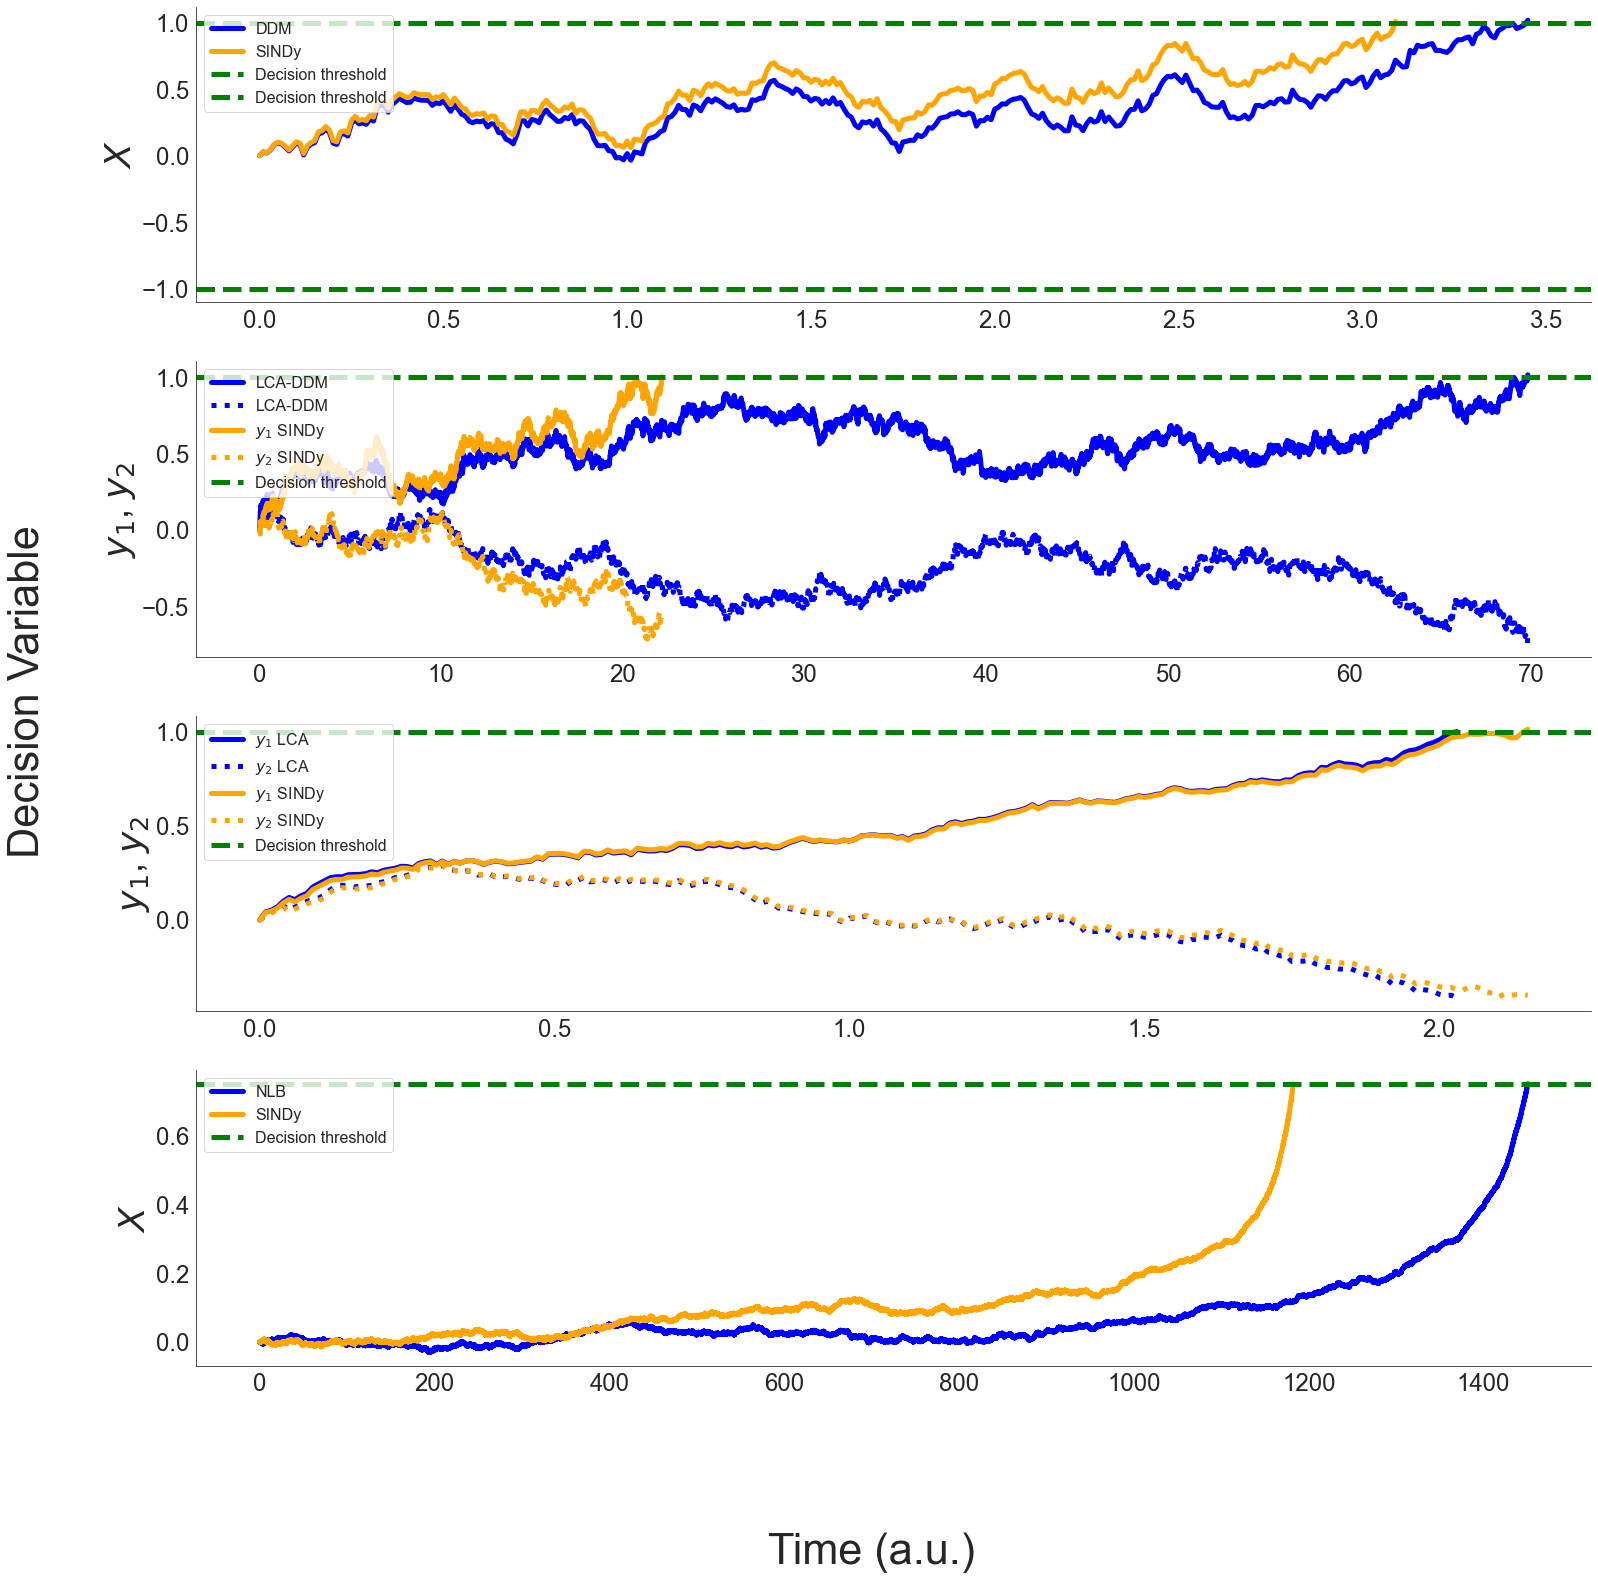

In [844]:
# ddm_i=19
# ddm_i_coh=15

# lcaddm_i=8
# lcaddm_i_coh=4

# lca_i=1
# lca_i_coh=1

# nlb_i=0
# nlb_i_coh=0
# # fig = plt.figure(layout="constrained")
# # fig.set_figwidth(20)
# # fig.set_figheight(15)
# z_ddm_lca=1
# z_spb=0.75
# z=1
# fig,ax=plt.subplots(4, 1, figsize=(25, 25))
# #subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[2, 1.])
# x_ddm=[SnR_ddm_0,SnR_ddm_1,SnR_ddm_2,SnR_ddm_3,SnR_ddm_4,SnR_ddm_5,SnR_ddm_6,SnR_ddm_7,SnR_ddm_8,SnR_ddm_9,SnR_ddm_10,SnR_ddm_11,SnR_ddm_12,SnR_ddm_13,SnR_ddm_14,SnR_ddm_15,SnR_ddm_16,SnR_ddm_17,SnR_ddm_18,SnR_ddm_19,SnR_ddm_20]
# x_lcaddm=[SnR_lcaddm_0,SnR_lcaddm_1,SnR_lcaddm_2,SnR_lcaddm_3,SnR_lcaddm_4,SnR_lcaddm_5,SnR_lcaddm_6,SnR_lcaddm_7,SnR_lcaddm_8,SnR_lcaddm_9,SnR_lcaddm_10]
# x_lca=[SnR_lca_0,SnR_lca_1,SnR_lca_2,SnR_lca_3,SnR_lca_4,SnR_lca_5,SnR_lca_6]
# x_spb=[SnR_SPB_0,SnR_SPB_1,SnR_SPB_2,SnR_SPB_3,SnR_SPB_4,SnR_SPB_5,SnR_SPB_6,SnR_SPB_7,SnR_SPB_8,SnR_SPB_9,SnR_SPB_10,SnR_SPB_11,SnR_SPB_12]

# # ax = subfigs[0].subplots(4,1)
# ax[0].plot(t[0:len(average_ddm[ddm_i_coh][0][ddm_i])],average_ddm[ddm_i_coh][0][ddm_i],"blue",label="DDM",linewidth=5)
# ax[0].plot(t[0:len(average_ddm[ddm_i_coh][1][ddm_i])],average_ddm[ddm_i_coh][1][ddm_i],"orange",label="SINDy",linewidth=5)
# ax[0].axhline(y=1,linestyle="dashed", color="green" ,label='Decision threshold',linewidth=5)
# ax[0].axhline(y=-1,linestyle="dashed", color="green" ,label='Decision threshold',linewidth=5)
# ax[0].spines['right'].set_visible(False)
# ax[0].spines['top'].set_visible(False)
# ax[0].legend(loc="upper left", prop={'size': 16})
# ax[0].set(ylabel="$X$")

# # ax[1].plot(t[0:len(sample_1_lcaddm[0])],sample_1_lcaddm[0],"blue",label="$y_1$ LCA-DDM",linewidth=5)
# # ax[1].plot(t[0:len(sample_1_lcaddm[1])],sample_1_lcaddm[1],"blue",label="$y_2$ LCA-DDM",linestyle=":",linewidth=5)
# # ax[1].plot(t[0:len(sample_1_lcaddm_sindy[0])],sample_1_lcaddm_sindy[0],"orange",label="$y_1$ SINDy",linewidth=5)
# # ax[1].plot(t[0:len(sample_1_lcaddm_sindy[1])],sample_1_lcaddm_sindy[1],"orange",label="$y_2$ SINDy",linestyle=":",linewidth=5)
# ax[1].plot(t[0:len(average_lcaddm[lcaddm_i_coh][0][lcaddm_i][:,0])],average_lcaddm[lcaddm_i_coh][0][lcaddm_i][:,0],"blue",label="LCA-DDM",linewidth=5)
# ax[1].plot(t[0:len(average_lcaddm[lcaddm_i_coh][0][lcaddm_i][:,1])],average_lcaddm[lcaddm_i_coh][0][lcaddm_i][:,1],"blue",label="LCA-DDM",linestyle=":",linewidth=5)
# ax[1].plot(t[0:len(average_lcaddm[lcaddm_i_coh][1][lcaddm_i][:,0])],average_lcaddm[lcaddm_i_coh][1][lcaddm_i][:,0],"orange",label="$y_1$ SINDy",linewidth=5)
# ax[1].plot(t[0:len(average_lcaddm[lcaddm_i_coh][1][lcaddm_i][:,1])],average_lcaddm[lcaddm_i_coh][1][lcaddm_i][:,1],"orange",label="$y_2$ SINDy",linestyle=":",linewidth=5)
# ax[1].axhline(y=z,linestyle="dashed", color="green" ,label='Decision threshold',linewidth=5)
# ax[1].spines['right'].set_visible(False)
# ax[1].spines['top'].set_visible(False)
# ax[1].legend(loc="upper left", prop={'size': 16})
# ax[1].set(ylabel="$y_1$, $y_2$")

# # ax[2].plot(t[0:len(sample_1_lca[0])],sample_1_lca[0],"blue",label="$y_1$ LCA",linewidth=5)
# # ax[2].plot(t[0:len(sample_1_lca[1])],sample_1_lca[1],"blue",label="$y_2$ LCA",linestyle=":",linewidth=5)
# # ax[2].plot(t[0:len(sample_1_lca_sindy[0])],sample_1_lca_sindy[0],"orange",label="$y_1$ SINDy",linewidth=5)
# # ax[2].plot(t[0:len(sample_1_lca_sindy[1])],sample_1_lca_sindy[1],"orange",label="$y_2$ SINDy",linestyle=":",linewidth=5)
# ax[2].plot(t[0:len(average_lca[lca_i_coh][0][lca_i][:,0])],average_lca[lca_i_coh][0][lca_i][:,0],"blue",label="$y_1$ LCA",linewidth=5)
# ax[2].plot(t[0:len(average_lca[lca_i_coh][0][lca_i][:,1])],average_lca[lca_i_coh][0][lca_i][:,1],"blue",label="$y_2$ LCA",linestyle=":",linewidth=5)
# ax[2].plot(t[0:len(average_lca[lca_i_coh][1][lca_i][:,0])],average_lca[lca_i_coh][1][lca_i][:,0],"orange",label="$y_1$ SINDy",linewidth=5)
# ax[2].plot(t[0:len(average_lca[lca_i_coh][1][lca_i][:,1])],average_lca[lca_i_coh][1][lca_i][:,1],"orange",label="$y_2$ SINDy",linestyle=":",linewidth=5)
# ax[2].axhline(y=z,linestyle="dashed", color="green" ,label='Decision threshold',linewidth=5)
# ax[2].spines['right'].set_visible(False)
# ax[2].spines['top'].set_visible(False)
# ax[2].legend(loc="upper left", prop={'size': 16})
# ax[2].set(ylabel="$y_1$, $y_2$")

# ax[3].plot(t[0:len(average_choice_nlb[nlb_i_coh][0][nlb_i])],average_choice_nlb[nlb_i][0][nlb_i_coh],"blue",label="NLB",linewidth=5)
# ax[3].plot(t[0:len(average_choice_nlb[nlb_i_coh][1][nlb_i])],average_choice_nlb[nlb_i][1][nlb_i_coh],"orange",label="SINDy",linewidth=5)
# ax[3].axhline(y=z_spb,linestyle="dashed", color="green" ,label='Decision threshold',linewidth=5)
# ax[3].spines['right'].set_visible(False)
# ax[3].spines['top'].set_visible(False)
# ax[3].legend(loc="upper left", prop={'size': 16})
# ax[3].set(ylabel="$X$")
# fig.supylabel('Decision Variable')
# fig.supxlabel('Time (a.u.)')
# #plt.savefig("fig_average_trajectory_16_08.svg", dpi=300)